In [2]:
import matplotlib.pyplot as plt
from pylab import *
params = {'backend': 'pdf',
            'figure.figsize': [4.3, 3.0],
            'font.family':'serif',
            'font.size':12,
            'font.serif': 'Times Roman',
            'axes.titlesize': 'medium',
            'axes.labelsize': 'medium',
            'text.usetex': True,
            'legend.fontsize': 8,
            'legend.frameon' : False,
            'figure.dpi': 600,
            'lines.markersize': 2,
            'lines.linewidth': 2,
            'lines.antialiased': False,
            'path.simplify': False,
            'legend.handlelength':3,
            'figure.subplot.bottom':0.15,
            'figure.subplot.top':0.9,
            'figure.subplot.left':0.15,
            'figure.subplot.right':0.92}

mpl.rcParams.update(params)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


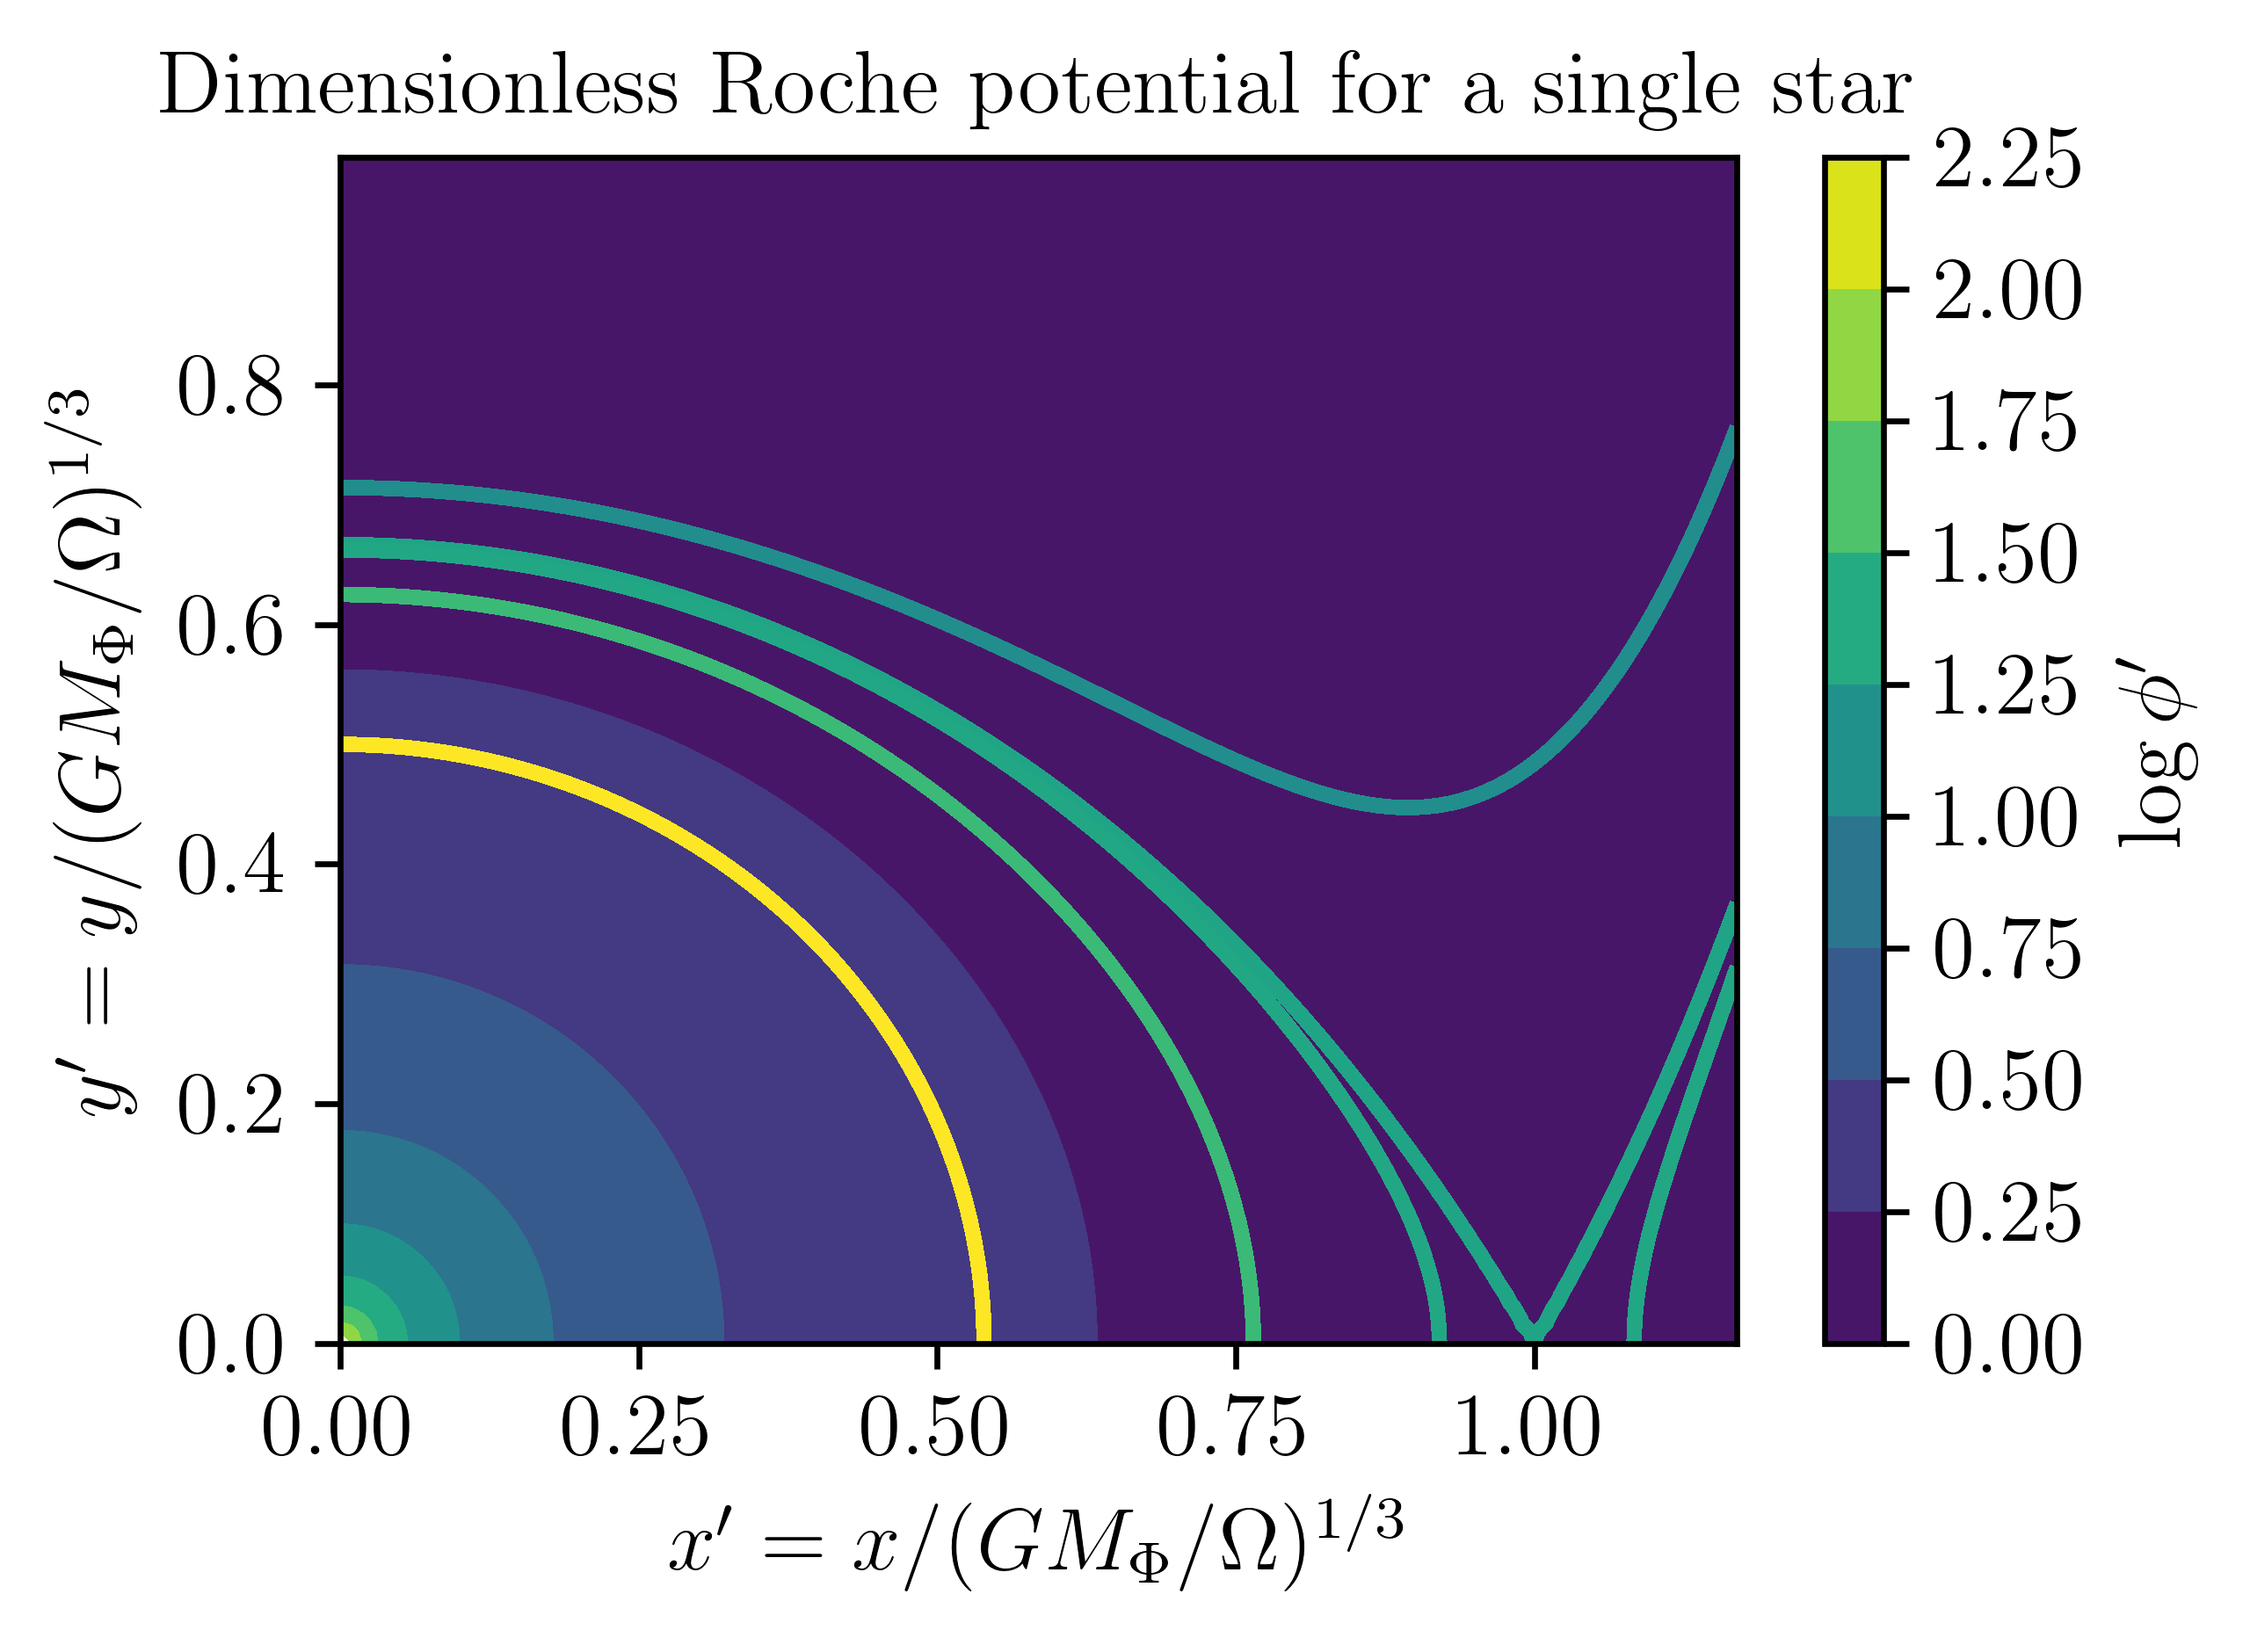

/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide


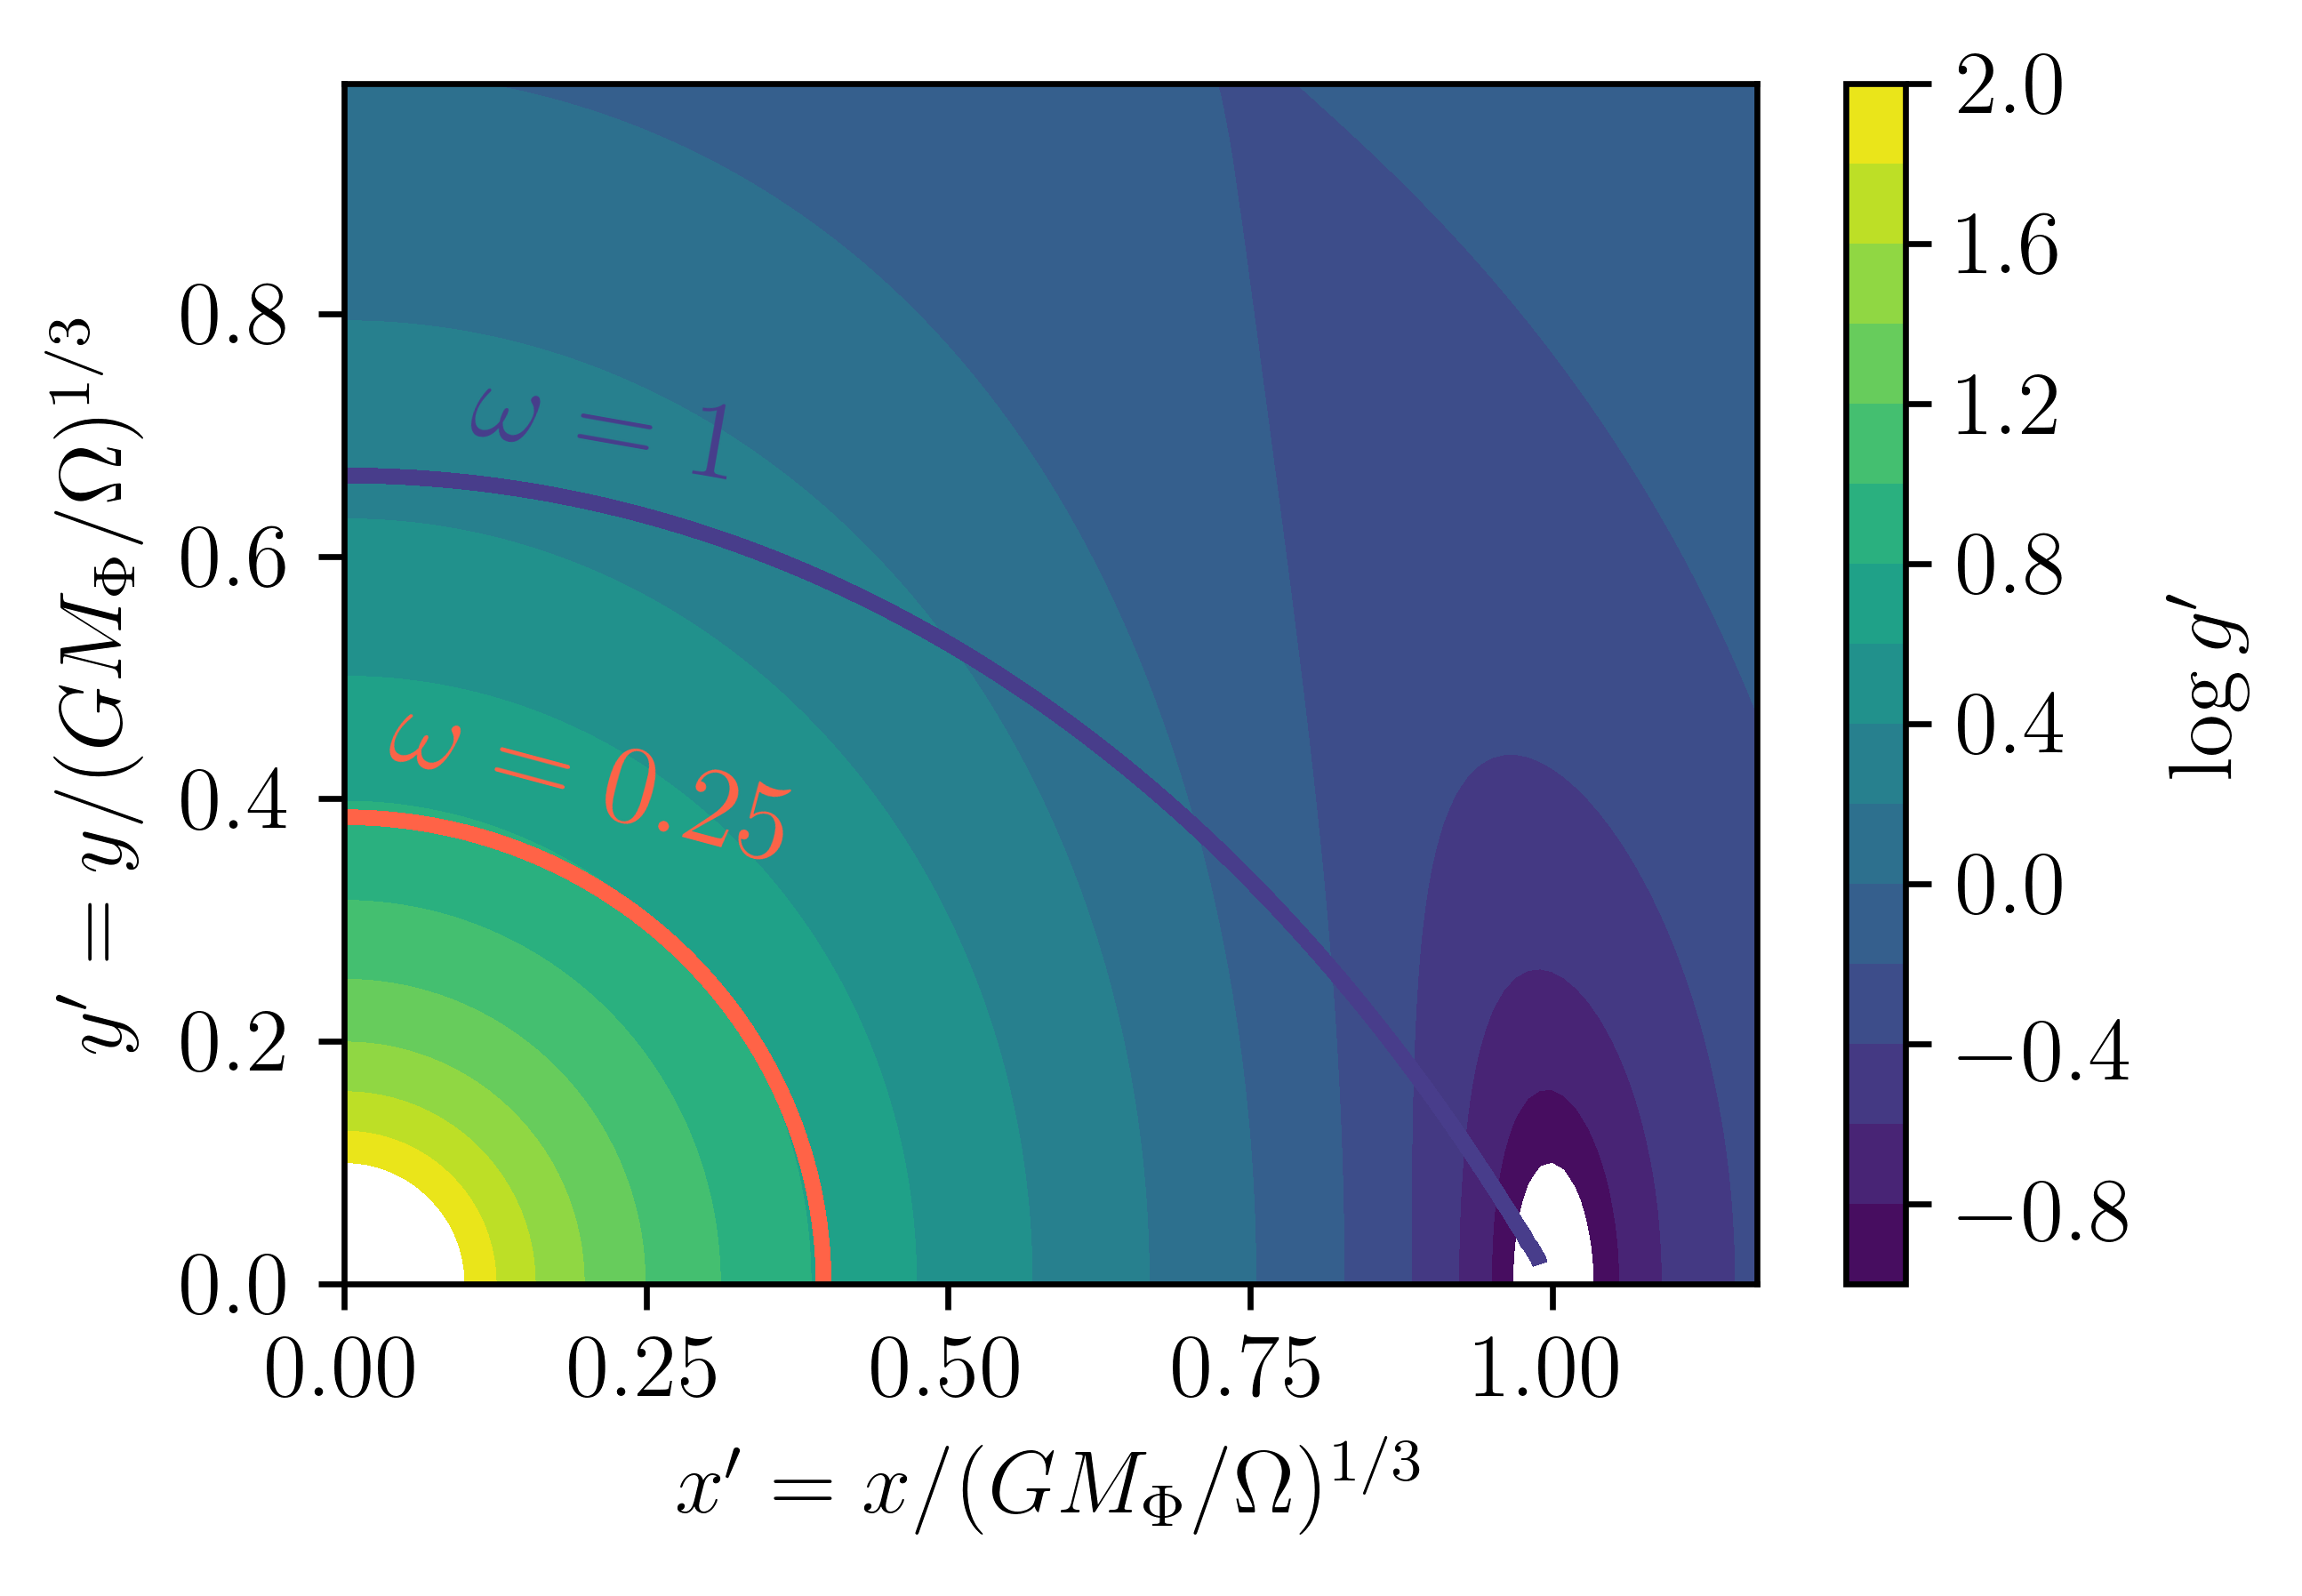

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#The full Roche potential for a point mass in a rotating
#frame of reference is given by
#   phi = -GM/r-0.5*omega**2*r**2*sin(theta)**2
#For simplicity its best to use a dimensionless form of this equation
#where all quantities are replaced by a combination of G, M and omega,
#   phi' = phi/(GMw)**2/3
#   r' = r/(GM/w**2)**(1/3)
#Such that the potential is simply (ommiting the minus sign as well)
#   phi = 1/r'+0.5*r'**2*sin(theta)**2
#The effective gravity is simply given by |grad(phi)|, which results in
#   g' = sqrt((r'*sin(theta)**2-1/r'**2)**2+(r'*cos(theta)*sin(theta))**2)
#to which the actual gravity is related via
#   g' = g/(G*M*omega**4)**(1/3)


# Plot the Roche potential
#x = np.arange(0.1, 2.0, 0.01)
#y = np.arange(-0.81, 0.81, 0.01)
x = np.arange(0, 1.18, 0.01)
y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
#ST = sin(theta), where theta is the polar angle (theta=pi/2 is the equator)
ST = X/R
Z = np.log10(1/R+0.5*R**2*ST**2)

plt.figure()
CS2 = plt.contourf(X, Y, Z)
CS1 = plt.contour(X,Y,Z,levels = np.log10([1,1.4,1.5,1.51,1.6,2]))
plt.gca().set_xlabel("$x'=x/(GM_{\\Phi}/\\Omega)^{1/3}$")
plt.gca().set_ylabel("$y'=y/(GM_{\\Phi}/\\Omega)^{1/3}$")
plt.gca().axis("equal")
cbar = plt.colorbar(CS2, label="$\\log \\phi'$")
plt.title('Dimensionless Roche potential for a single star')
plt.show()

#Plot the effective gravity
#x = np.arange(0.1, 2.0, 0.01)
#y = np.arange(-0.81, 0.81, 0.01)
x = np.arange(0, 1.18, 0.01)
y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
ST = X/R
CT = Y/R
Z = np.log10(np.sqrt((R*ST**2-1/R**2)**2+(R*CT*ST)**2))

plt.figure()
CS2 = plt.contourf(X, Y, Z, levels=np.arange(-1,2.01,0.2))
cbar = plt.colorbar(CS2, label="$\\log g'$")

wcrits = np.array([1,0.25])
l2 = np.array([1./(w_div_wc)**(2./3.)+0.5*w_div_wc**(4./3.) for w_div_wc in wcrits])
levels = np.log10(l2)

x = np.arange(0, 1.0, 0.01)
y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
ST = X/R
CT = Y/R
Z = np.log10(1/R+0.5*R**2*ST**2)
CS1 = plt.contour(X,Y,Z,levels = levels,colors=("darkslateblue","tomato"))

plt.gca().text(0.1,0.7,"$\omega=1$",fontsize=15,color="darkslateblue",rotation=-10)
plt.gca().text(0.03,0.43,"$\omega=0.25$",fontsize=15,color="tomato",rotation=-15)

plt.gca().set_xlabel("$x'=x/(GM_{\\Phi}/\\Omega)^{1/3}$")
plt.gca().set_ylabel("$y'=y/(GM_{\\Phi}/\\Omega)^{1/3}$")
plt.gca().axis("equal")
#plt.title('Dimensionless g for a single star')
plt.savefig("dimless_g.pdf")
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


[ 0.09691001  0.17609126  0.19092637  0.25183919  0.41473729]
[ 0.66666667  0.7804878   0.88888889  0.96969697]


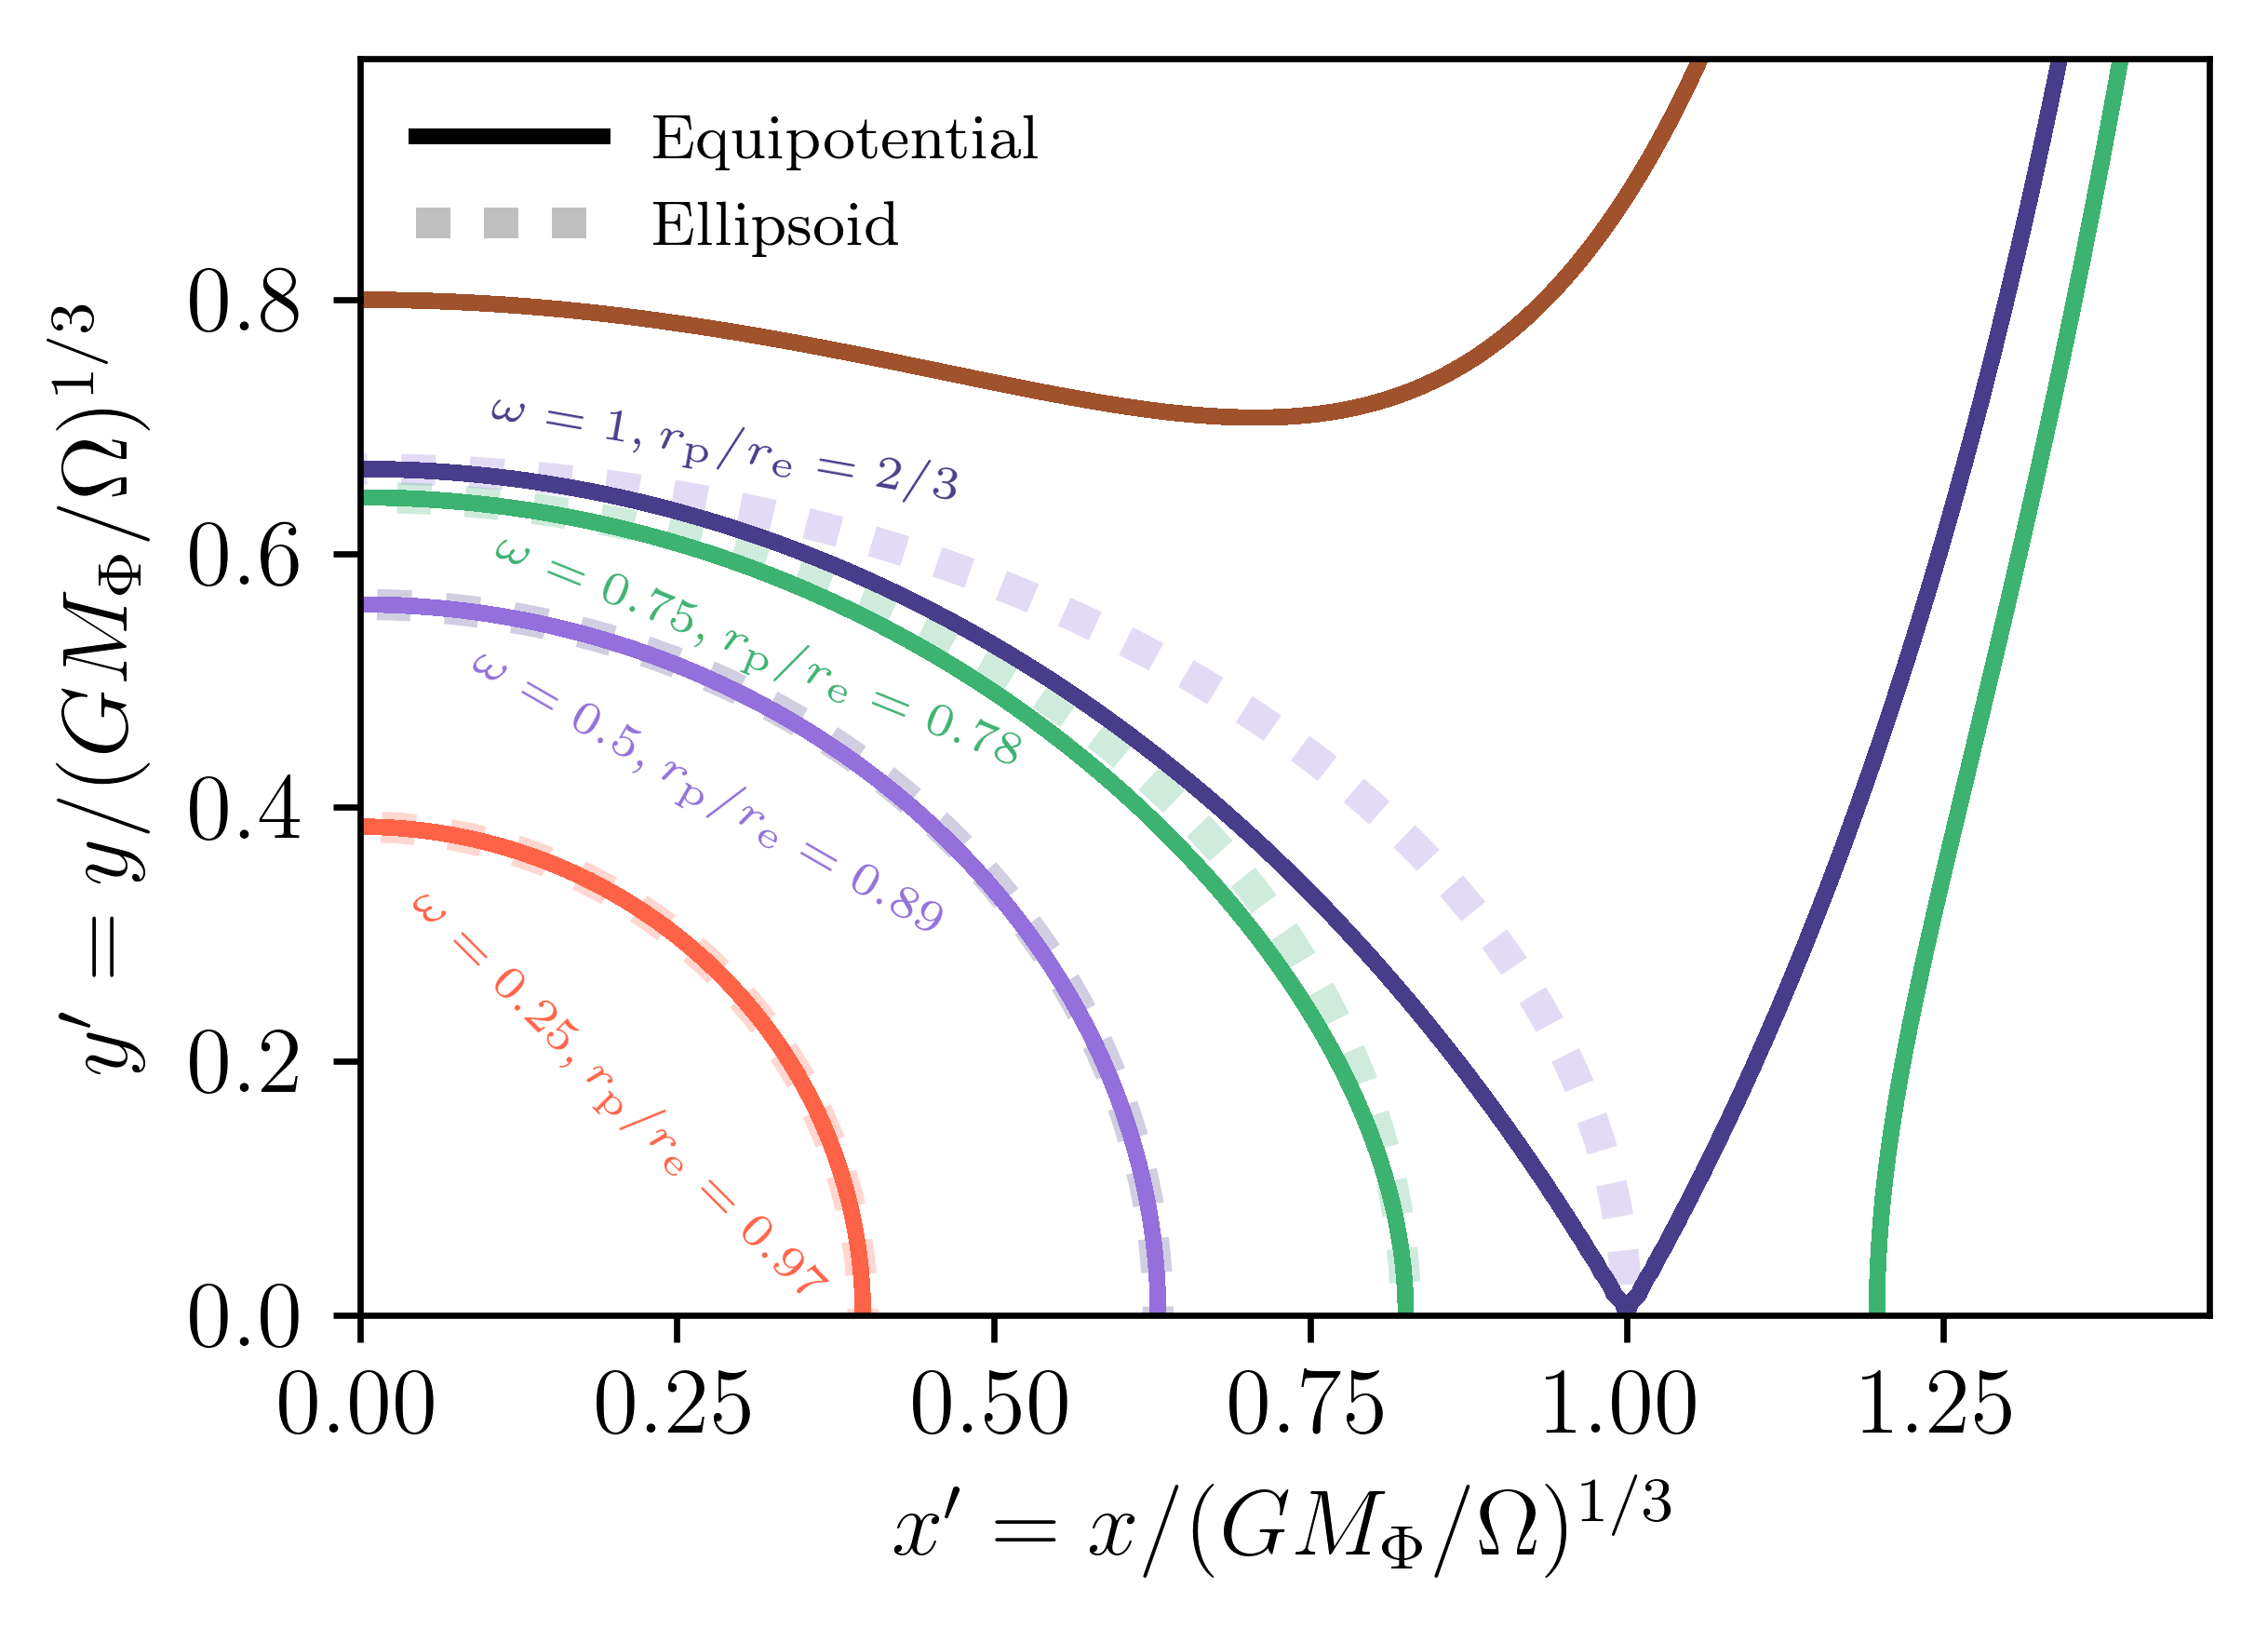

In [4]:
from matplotlib.patches import Ellipse
#Contour plot for equipotentials

# Plot the Roche potential
x = np.arange(0, 1.47, 0.01)
y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
#ST = sin(theta), where theta is the polar angle (theta=pi/2 is the equator)
ST = X/R
Z = np.log10(1/R+0.5*R**2*ST**2)

l1 = np.array([1/0.8])
wcrits = np.array([1,0.75,0.5,0.25])
l2 = np.array([1./(w_div_wc)**(2./3.)+0.5*w_div_wc**(4./3.) for w_div_wc in wcrits])
levels = np.log10(np.append(l1,l2))
print(levels)

plt.figure()

colors = ["mediumpurple","mediumseagreen","darkslateblue","tomato"]
eq_r = wcrits**(2./3.)
polar_r = eq_r/(1+wcrits**2/2)

print(polar_r/eq_r)

for i in range(len(eq_r)):
    ellipse1 = Ellipse((0, 0), 2*eq_r[i], 2*polar_r[i],facecolor='none', edgecolor=colors[i],lw=4,alpha=0.25,linestyle=":")
    plt.gca().add_artist(ellipse1)
CS1 = plt.contour(X,Y,Z,levels = levels,colors=("sienna", "darkslateblue","mediumseagreen","mediumpurple","tomato"))

plt.plot([],[],"-",color="k",label="Equipotential")
plt.plot([],[],":",color="k",label="Ellipsoid",lw=4,alpha=0.25)
plt.gca().text(0.1,0.7,"$\omega=1,r_{\\rm p}/r_{\\rm e}=2/3$",fontsize=6,color="darkslateblue",rotation=-10)
plt.gca().text(0.1,0.59,"$\omega=0.75,r_{\\rm p}/r_{\\rm e}=0.78$",fontsize=6,color="mediumseagreen",rotation=-22)
plt.gca().text(0.08,0.5,"$\omega=0.5,r_{\\rm p}/r_{\\rm e}=0.89$",fontsize=6,color="mediumpurple",rotation=-30)
plt.gca().text(0.03,0.31,"$\omega=0.25,r_{\\rm p}/r_{\\rm e}=0.97$",fontsize=6,color="tomato",rotation=-45)
plt.gca().set_xlabel("$x'=x/(GM_{\\Phi}/\\Omega)^{1/3}$")
plt.gca().set_ylabel("$y'=y/(GM_{\\Phi}/\\Omega)^{1/3}$")
#plt.gca().set_xlim([0,1])
#plt.gca().set_ylim([0,0.7])
plt.gca().axis("equal")
plt.legend(loc=2)
#cbar = plt.colorbar(CS2, label="$\\log \\phi'$")
#plt.title('Dimensionless Roche potential for a single star')
plt.savefig("roche_equipotentials.pdf")
plt.show()

In [5]:
import scipy.integrate as integrate

#FIRST: Compute Vphi', the dimensionless volume of the equipotential
#       then use that to get rphi, the volume equivalent radius

#REMEMBER:
#dimensionless potential is PHI=1/R+0.5*R**2*sin(theta)**2
#for a given phi, the poloidal radius Rp satisfies PHI=1/Rp
#and the equatorial radius satisfies PHI=1/Re+0.5*Re**2

#res are the equatorial radii for which we will perform the integrations
#note that re=0.9994 corresponds to omega_div_omega_crit=0.999
#wcs are w/wcrit at the equator
wcs = np.linspace(0.9999,0.02,1000)
#wcs = 1-10**(np.linspace(-7,-4,100))
res = wcs**(2./3.)
#compute the value of the equipotential for each re
phis = 1/res+0.5*res**2
log_phis = np.log10(phis)
#rps contains the poloidal radii at each phi
rps = 1/phis

#rphis contains the volume equivalent radius at each phi, see
#Endal & Sofia 1976, eq (1).
#Integration is done by computing the volume of revolution
#corresponding to a region in the x-y plane inside the equipotential

#Eq. 4 in Marchant (2018)
def dVphi_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    return 2*np.pi*x*y

Vphis = np.zeros(len(log_phis))
rphis = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: dVphi_dx(x,wc), 0, res[k])

    #just integrated one hemisphere, multiply by two
    Vphis[k] = result[0]*2
    rphi = np.power(3./4.*Vphis[k]/np.pi,1./3.)
    rphis[k] = rphi

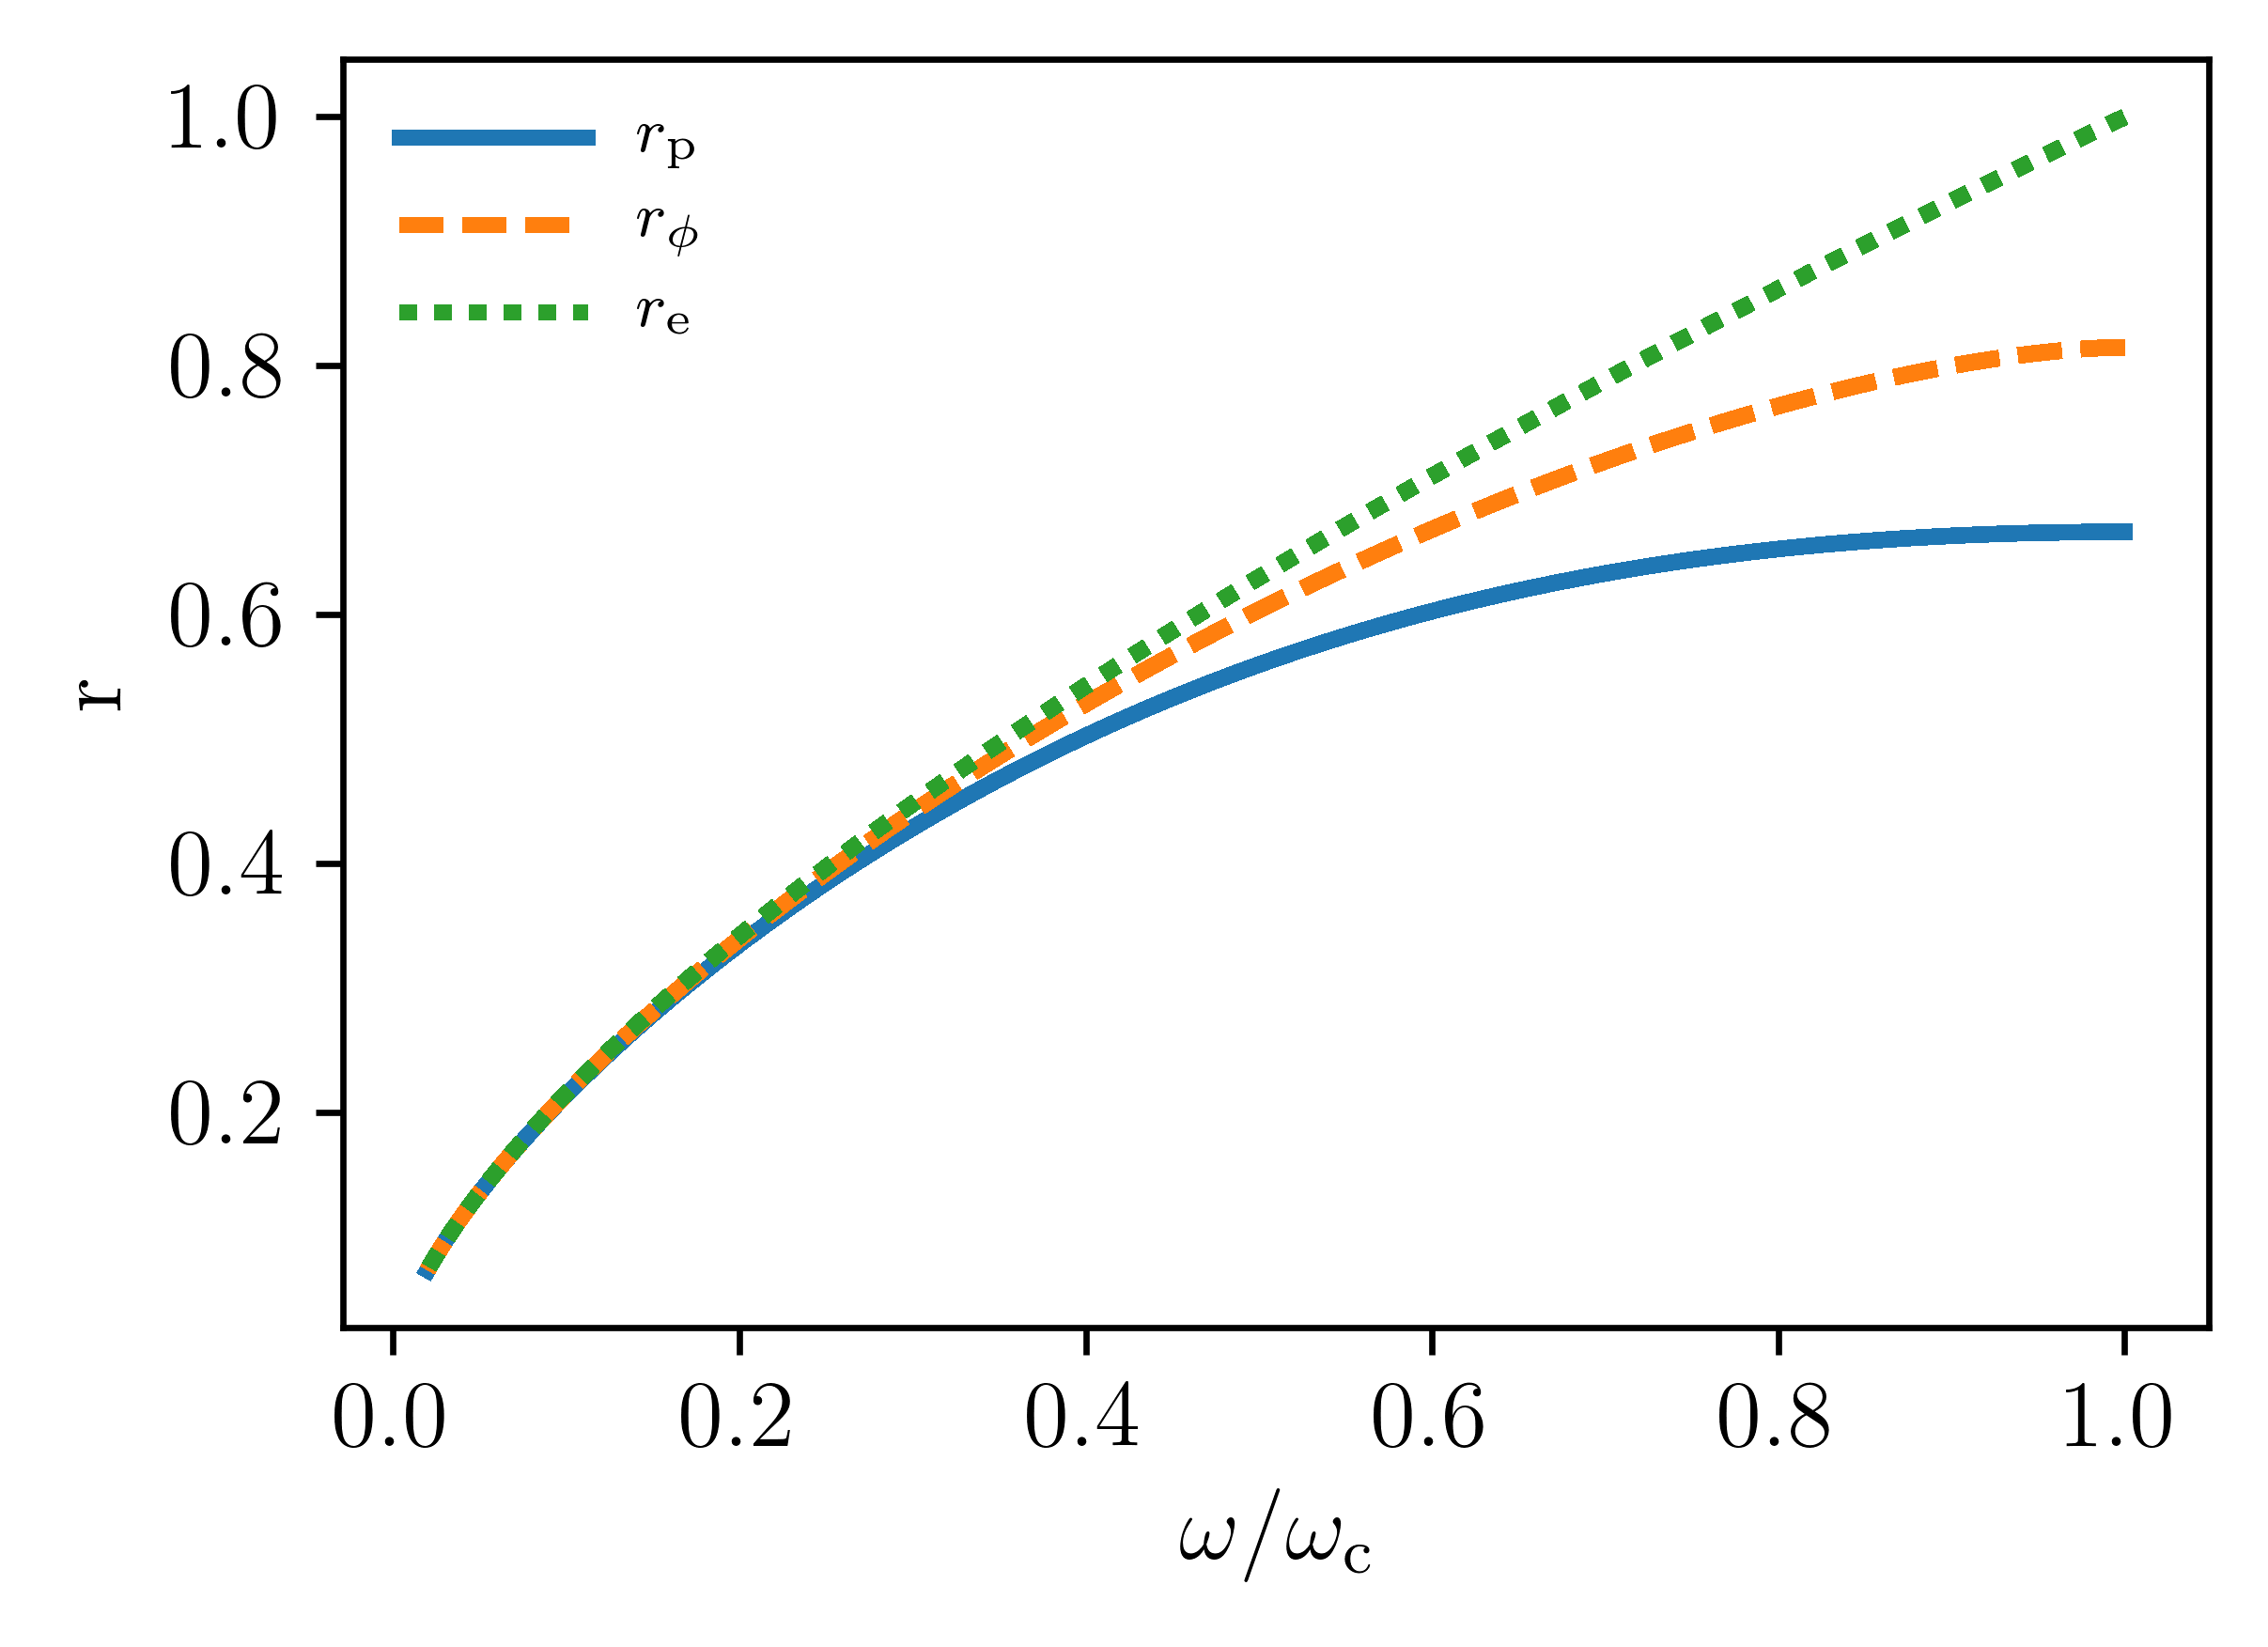

In [6]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
plt.plot(wcs,rps,"-", label = "$r_{\\rm p}$")
plt.plot(wcs,rphis,"--",label = "$r_{\\phi}$")
plt.plot(wcs,res,":", label = "$r_{\\rm e}$")
plt.gca().set_xlabel("$\omega/\omega_{\\rm c}$")
plt.gca().set_ylabel("r")
plt.legend(loc=2)
plt.show()

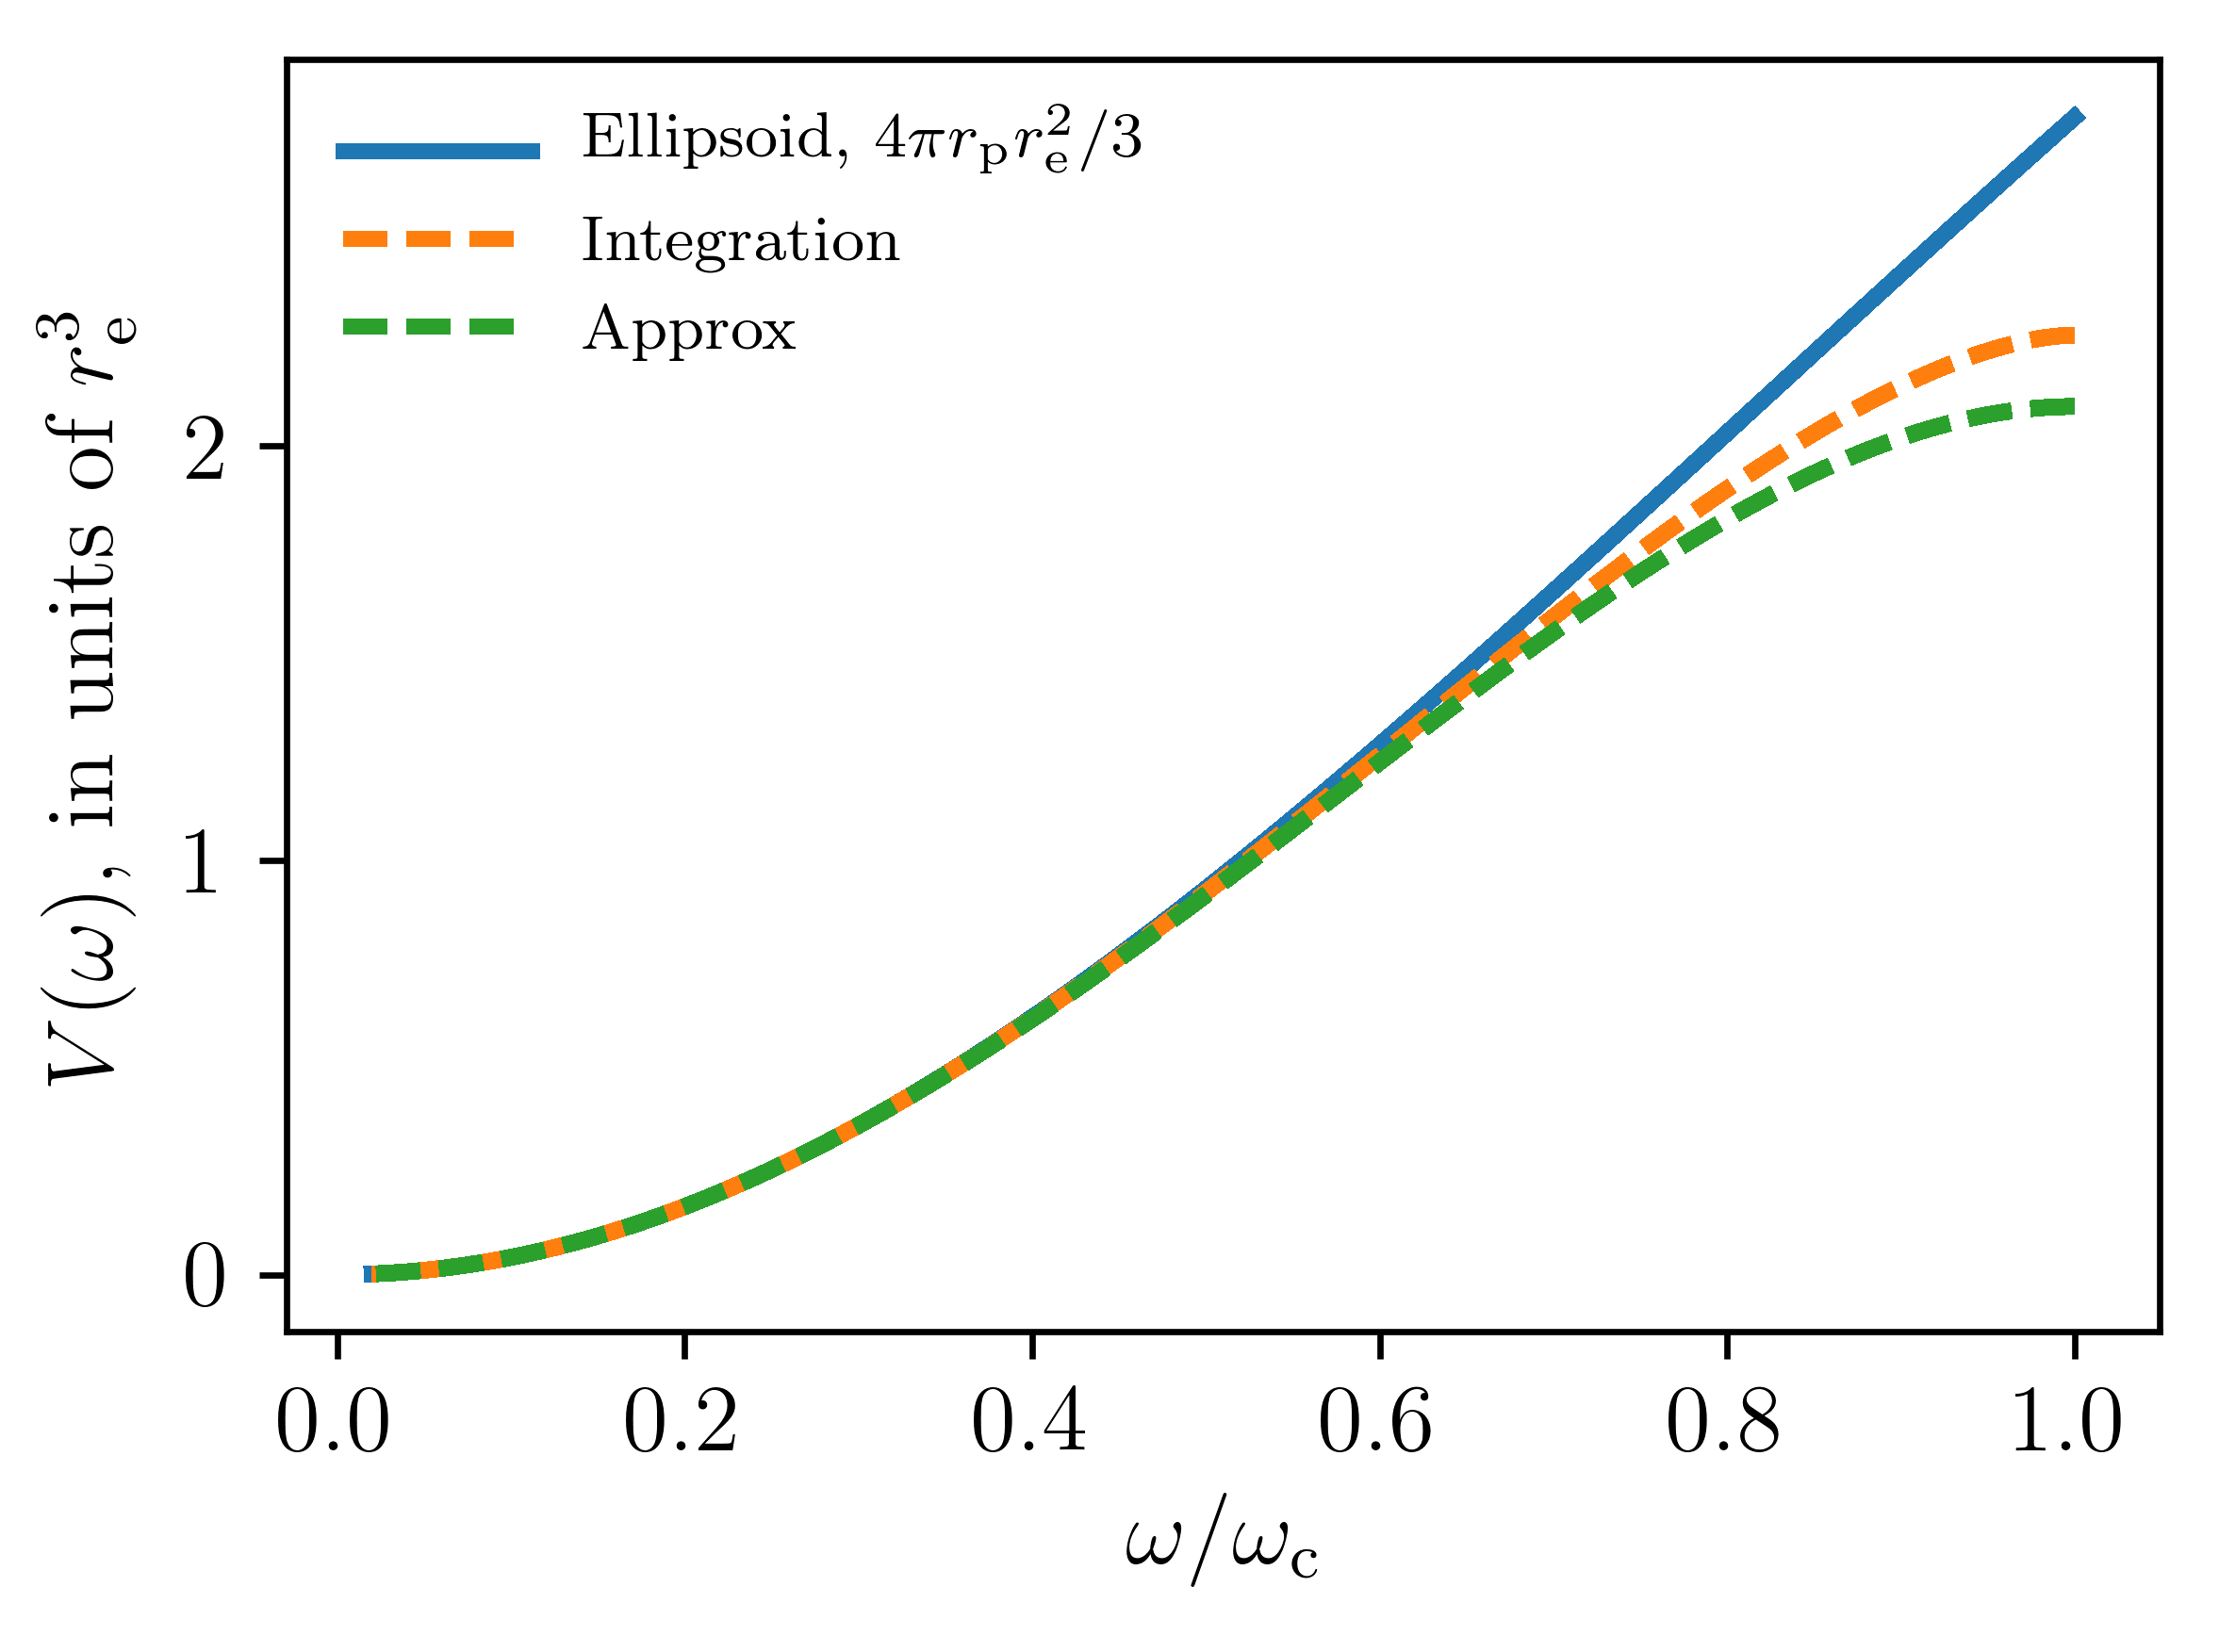

In [7]:
import matplotlib.pyplot as plt
#Check how results differ from an ellipsoid
plt.plot(wcs,4./3.*np.pi*rps*res*res,"-", label = "Ellipsoid, $4\pi r_{\\rm p}r_{\\rm e}^2/3$")
plt.plot(wcs,Vphis,"--",label = "Integration")
plt.plot(wcs,4./3.*np.pi*(wcs)**2*(1-(wcs)**2/2),"--",label = "Approx")
plt.gca().set_xlabel("$\omega/\omega_{\\rm c}$")
plt.gca().set_ylabel("$V(\omega)$, in units of $r_{\\rm e}^3$")
plt.legend(loc=2)
plt.savefig("Roche_volume.pdf")
plt.show()

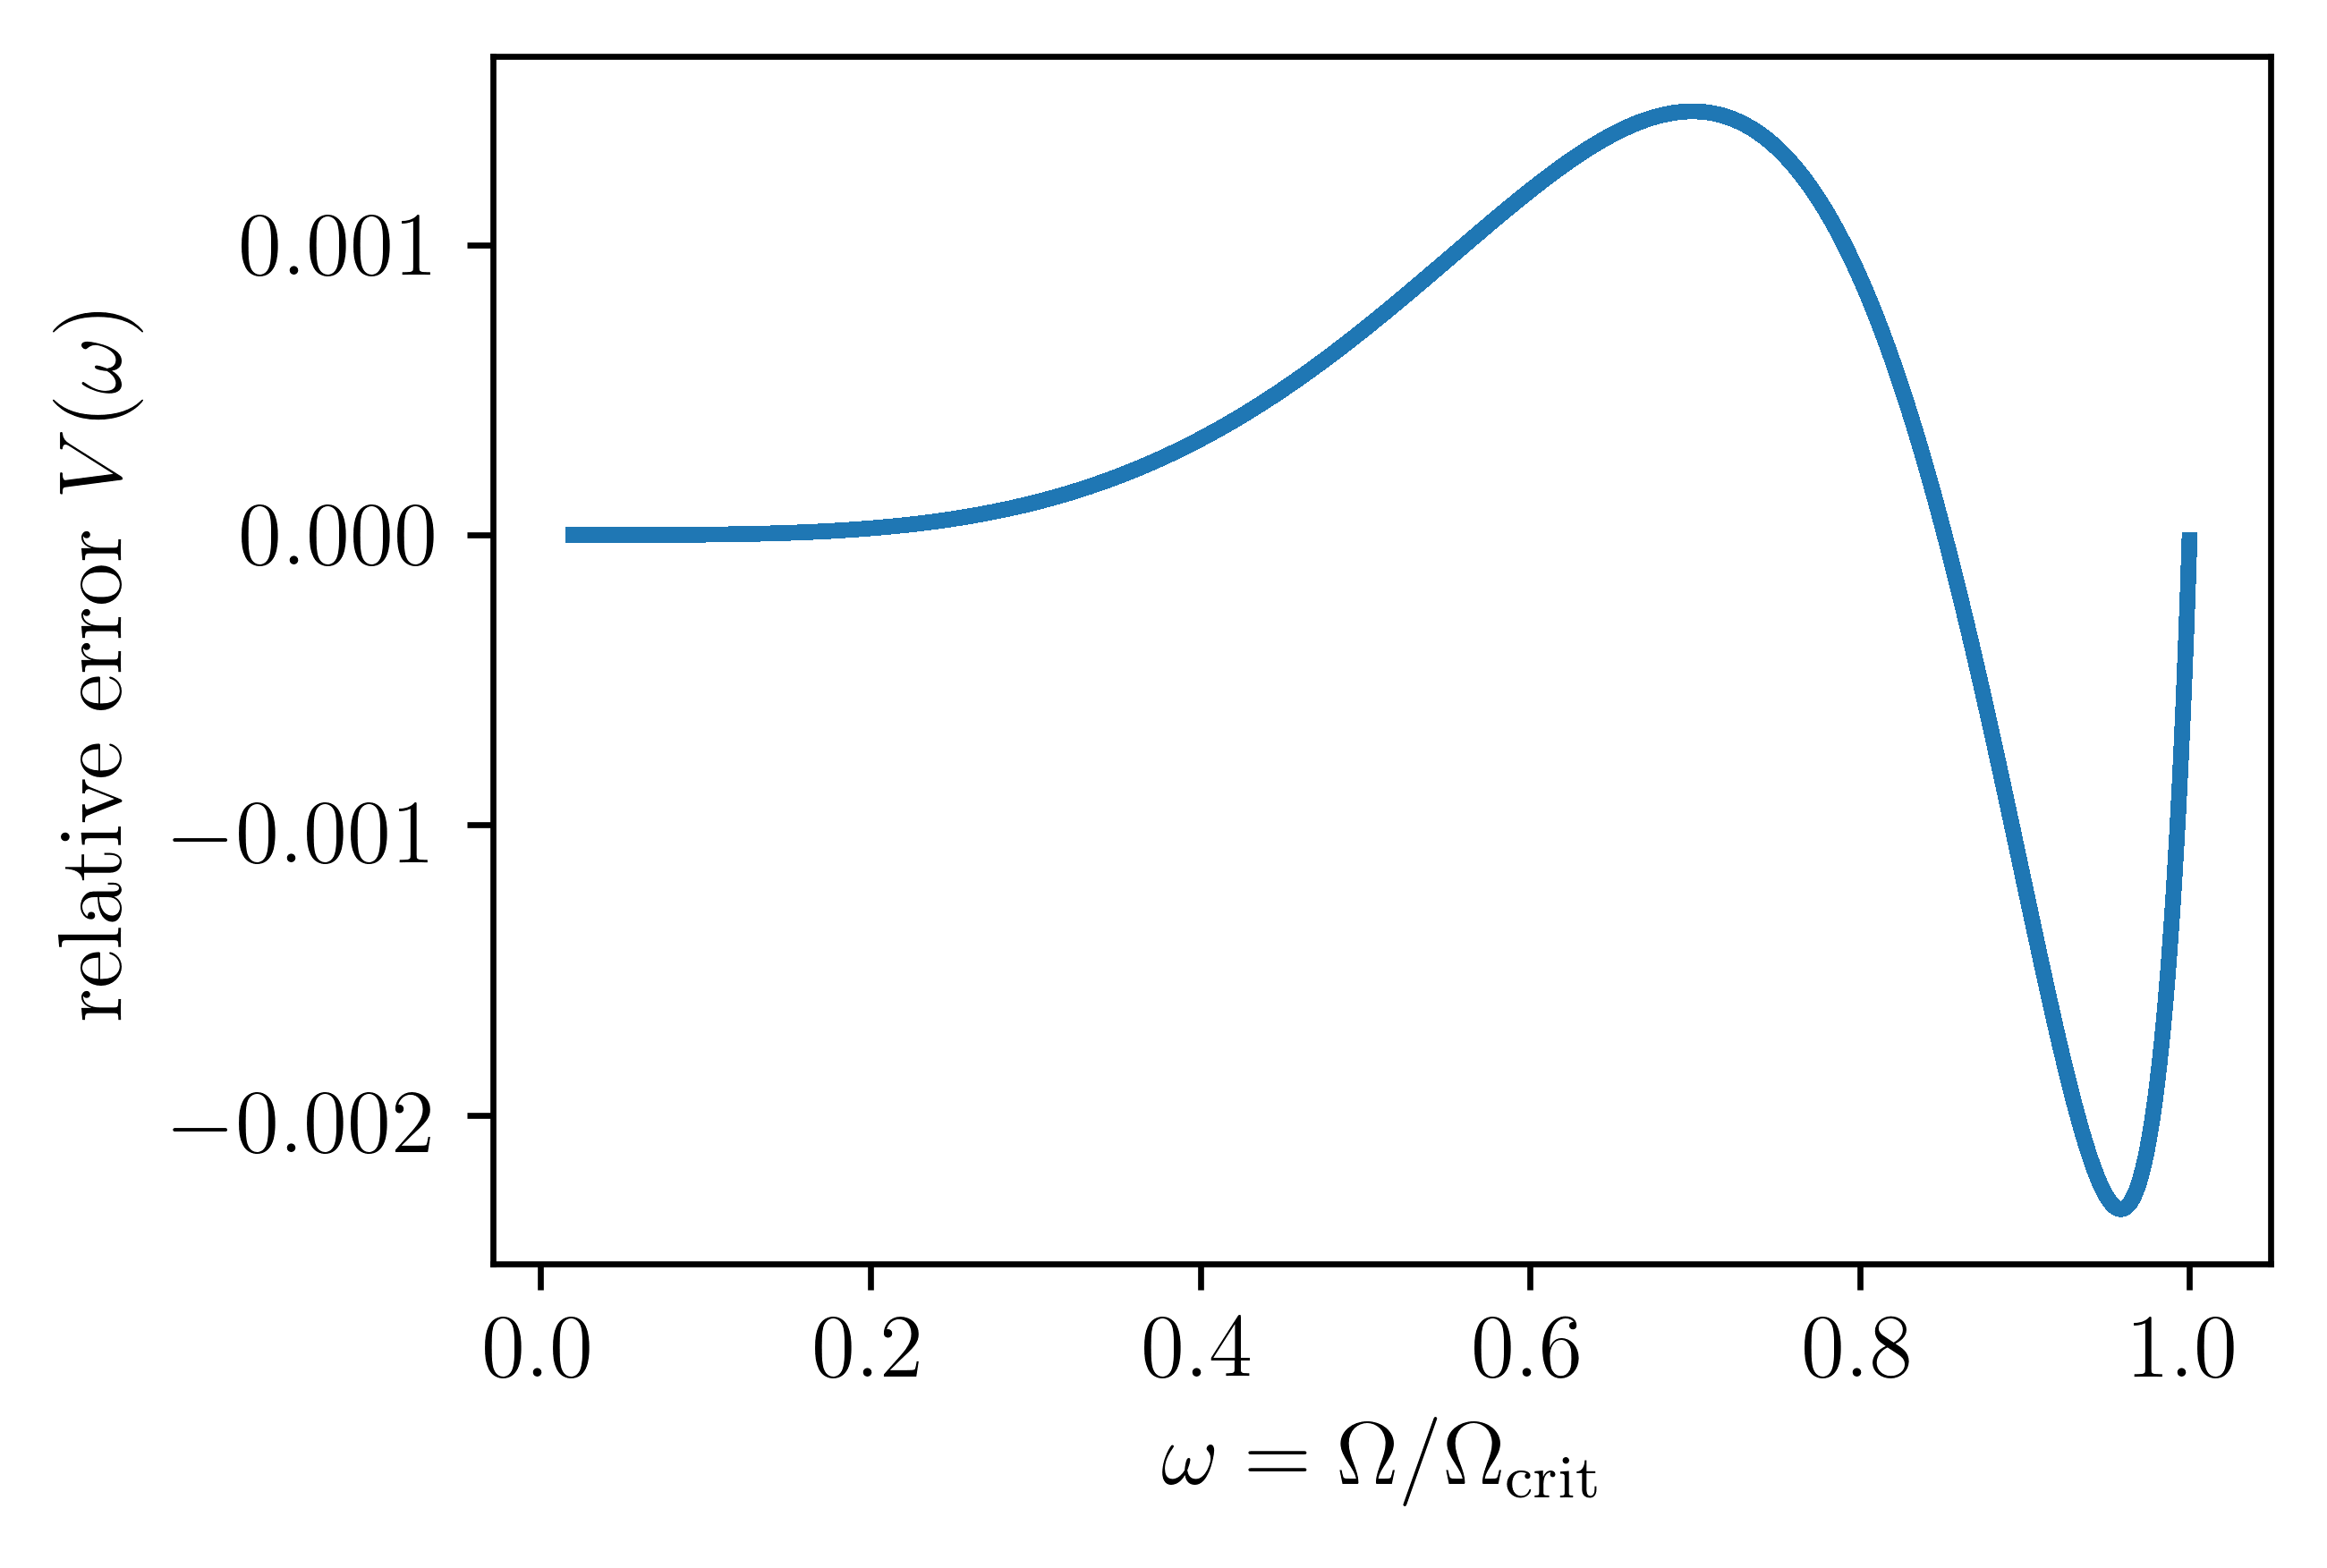

[ 0.11488049] -0.0737648940648


In [8]:
#Fit V(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = Vphis

V_crit = 3*sqrt(3)-4+3*np.log((3*(sqrt(3)-1))/(sqrt(3)+1))

crit_val = V_crit #This multiplies 4pi/3re to get V at critical (eq. (5) in Marchant 2018)

def func(x, a):
    b=crit_val-0.5-a
    return 4.*np.pi/3.*x**2*(1-x**2/2+a*x**4+b*x**6)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#check the fit I get directly, just to verify there are no typos in the manuscript
#plt.plot(x0, 4.*np.pi/3.*x0**2*(1-x0**2/2+0.1149*x0**4-0.07376*x0**6),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
#plt.gca().set_ylim([-0.05,0.05])
#plt.gca().set_ylim([-0.05,0.05])
plt.gca().set_ylabel("relative error $V(\omega)$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt,crit_val-0.5-popt[0])

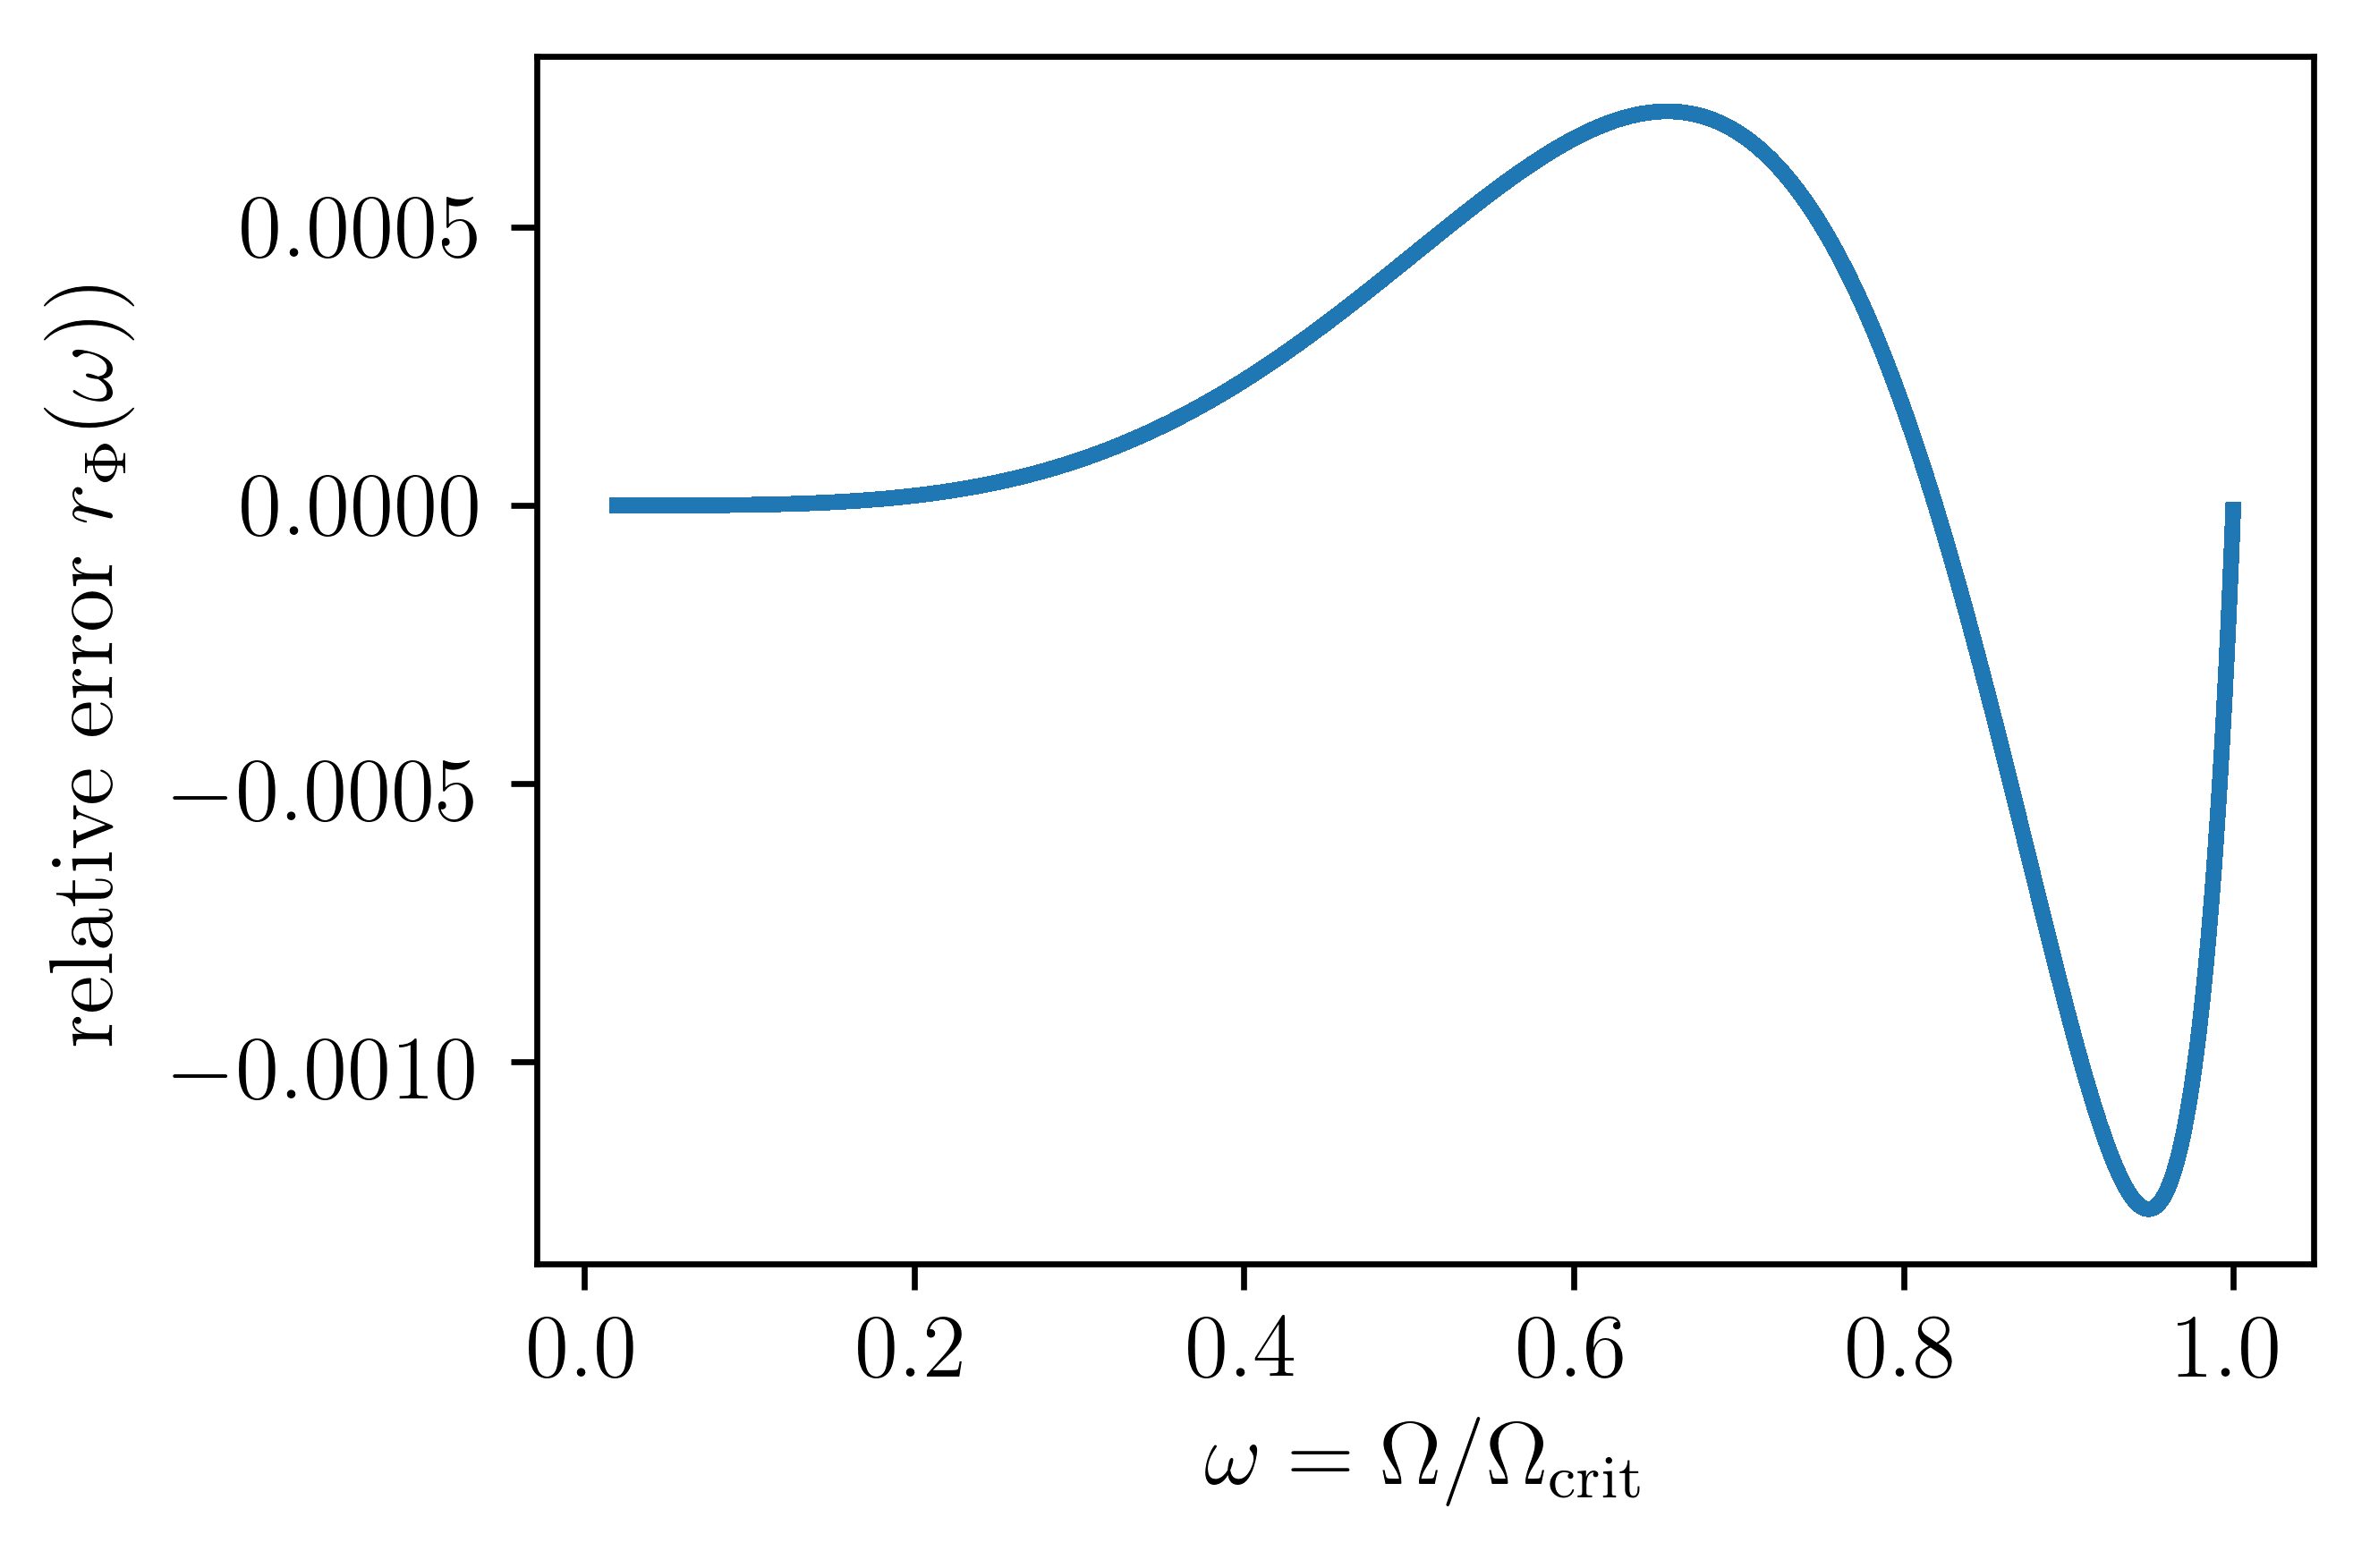

[ 0.01729312] -0.0357407762019


In [9]:
#Fit rphi(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = rphis

rphi_crit = np.power(3*sqrt(3)-4+3*np.log((3*(sqrt(3)-1))/(sqrt(3)+1)),1./3.)

crit_val = rphi_crit #This rphi at critical (eq. (5) in Marchant 2018)

def func(x, a):
    b=crit_val-5./6.-a
    return x**(2./3.)*(1-x**2/6+a*x**4+b*x**6)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#check the fit I get directly, just to verify there are no typos in the manuscript
#plt.plot(x0, x0**(2./3.)*(1-x0**2/6+0.01726*x0**4-0.03569*x0**6),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
#plt.gca().set_ylim([-0.05,0.05])
#plt.gca().set_ylim([-0.05,0.05])
plt.gca().set_ylabel("relative error $r_\Phi(\omega))$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt,crit_val-5./6.-popt[0])

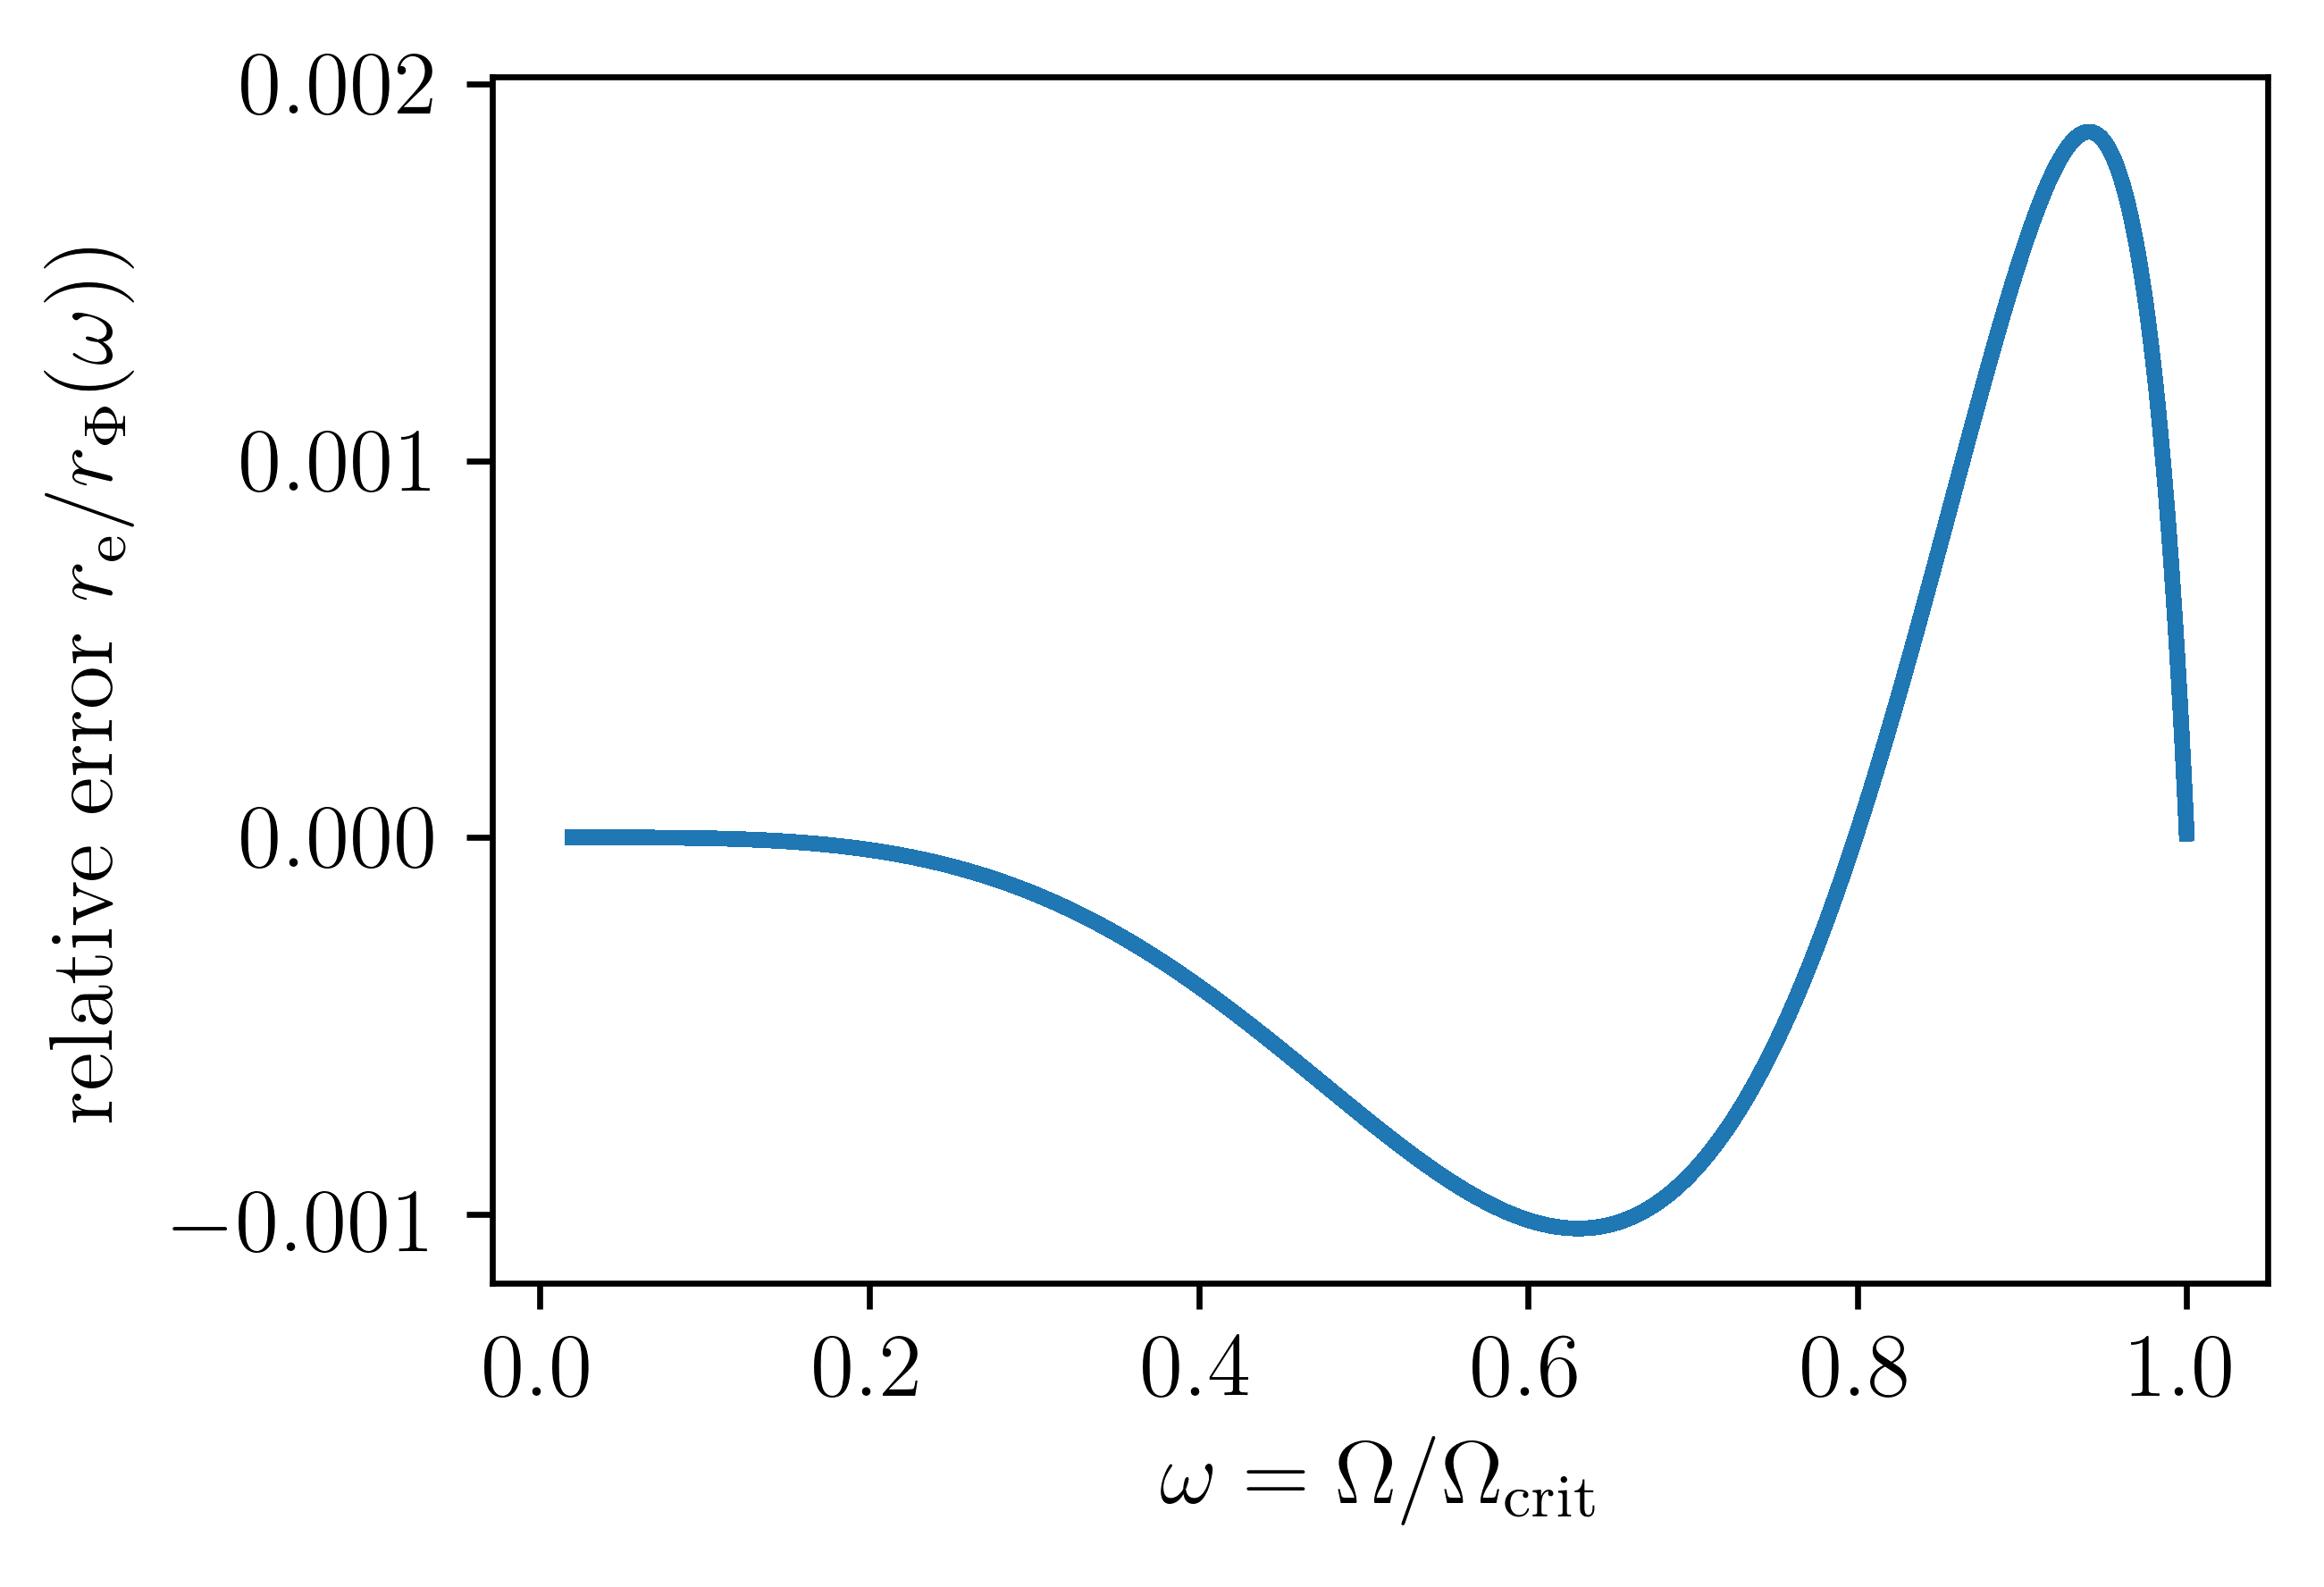

[-0.00025067] 0.0607500113065


In [140]:
#Fit rphi(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = res/rphis

rphi_crit = np.power(3*sqrt(3)-4+3*np.log((3*(sqrt(3)-1))/(sqrt(3)+1)),1./3.)

crit_val = 1/rphi_crit #This rphi at critical (eq. (5) in Marchant 2018)

def func(x, a):
    b=crit_val-7./6.-a
    return (1+x**2/6+a*x**4+b*x**6)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#check the fit I get directly, just to verify there are no typos in the manuscript
#plt.plot(x0, x0**(2./3.)*(1-x0**2/6+0.01726*x0**4-0.03569*x0**6),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
#plt.gca().set_ylim([-0.05,0.05])
#plt.gca().set_ylim([-0.05,0.05])
plt.gca().set_ylabel("relative error $r_{\\rm e}/r_\Phi(\omega))$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt,crit_val-7./6.-popt[0])

In [10]:
#Next, compute the dimensionless area of the equipotentials.
#This is related to the actual physical are via
#    Sphi' = Sphi/(G*M/omega**2)**(2/3)

#Eq. (6) in Marchant (2018)
def dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    return 2*np.pi*x*np.sqrt(dydx**2+1)

Sphis = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: dA_dx(x,wc), 0, res[k])
    Sphis[k] = result[0]*2

#For reference, compute the value for the critically rotating surface as well
Sphi_crit = 2*integrate.quad(lambda x: dA_dx(x,1),0,1)[0]

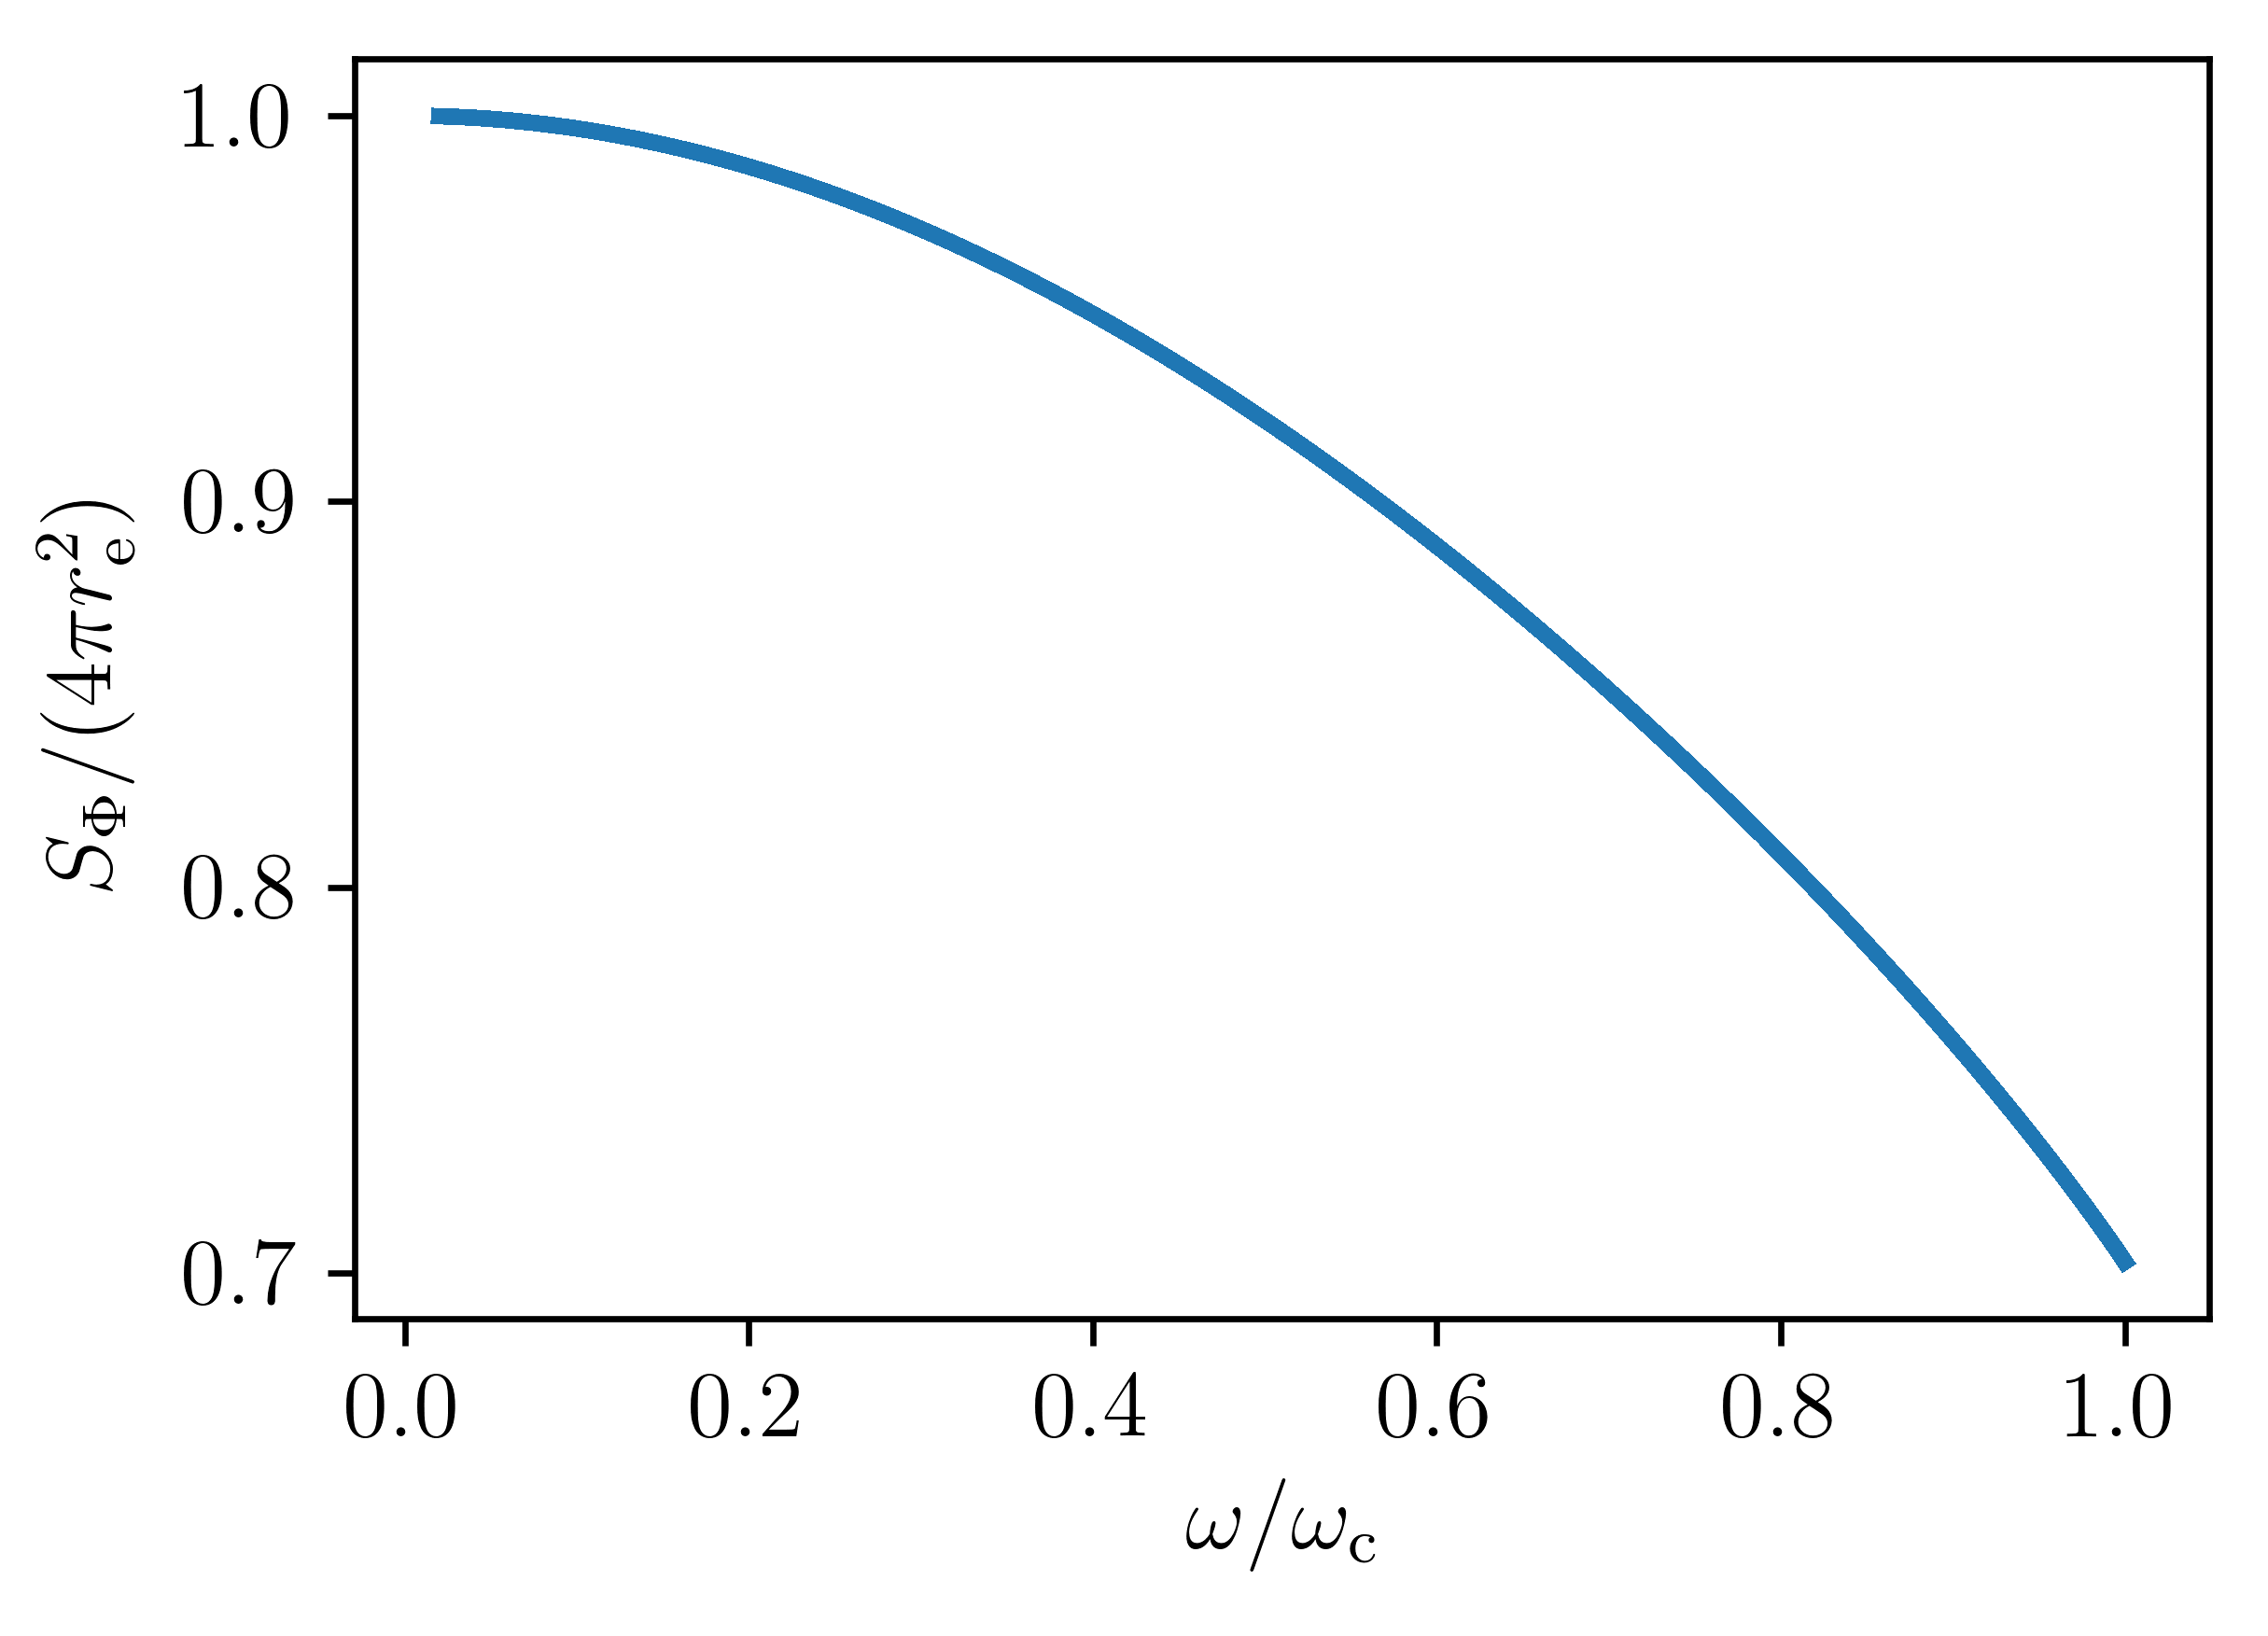

In [11]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
plt.plot(wcs,Sphis/(4*np.pi*res**2),"-")#, label = "$S/Se$")
plt.gca().set_xlabel("$\omega/\omega_{\\rm c}$")
plt.gca().set_ylabel("$S_{\\rm \\Phi}/(4\\pi r_{\\rm e}^2)$")
#plt.legend(loc=1)
plt.show()

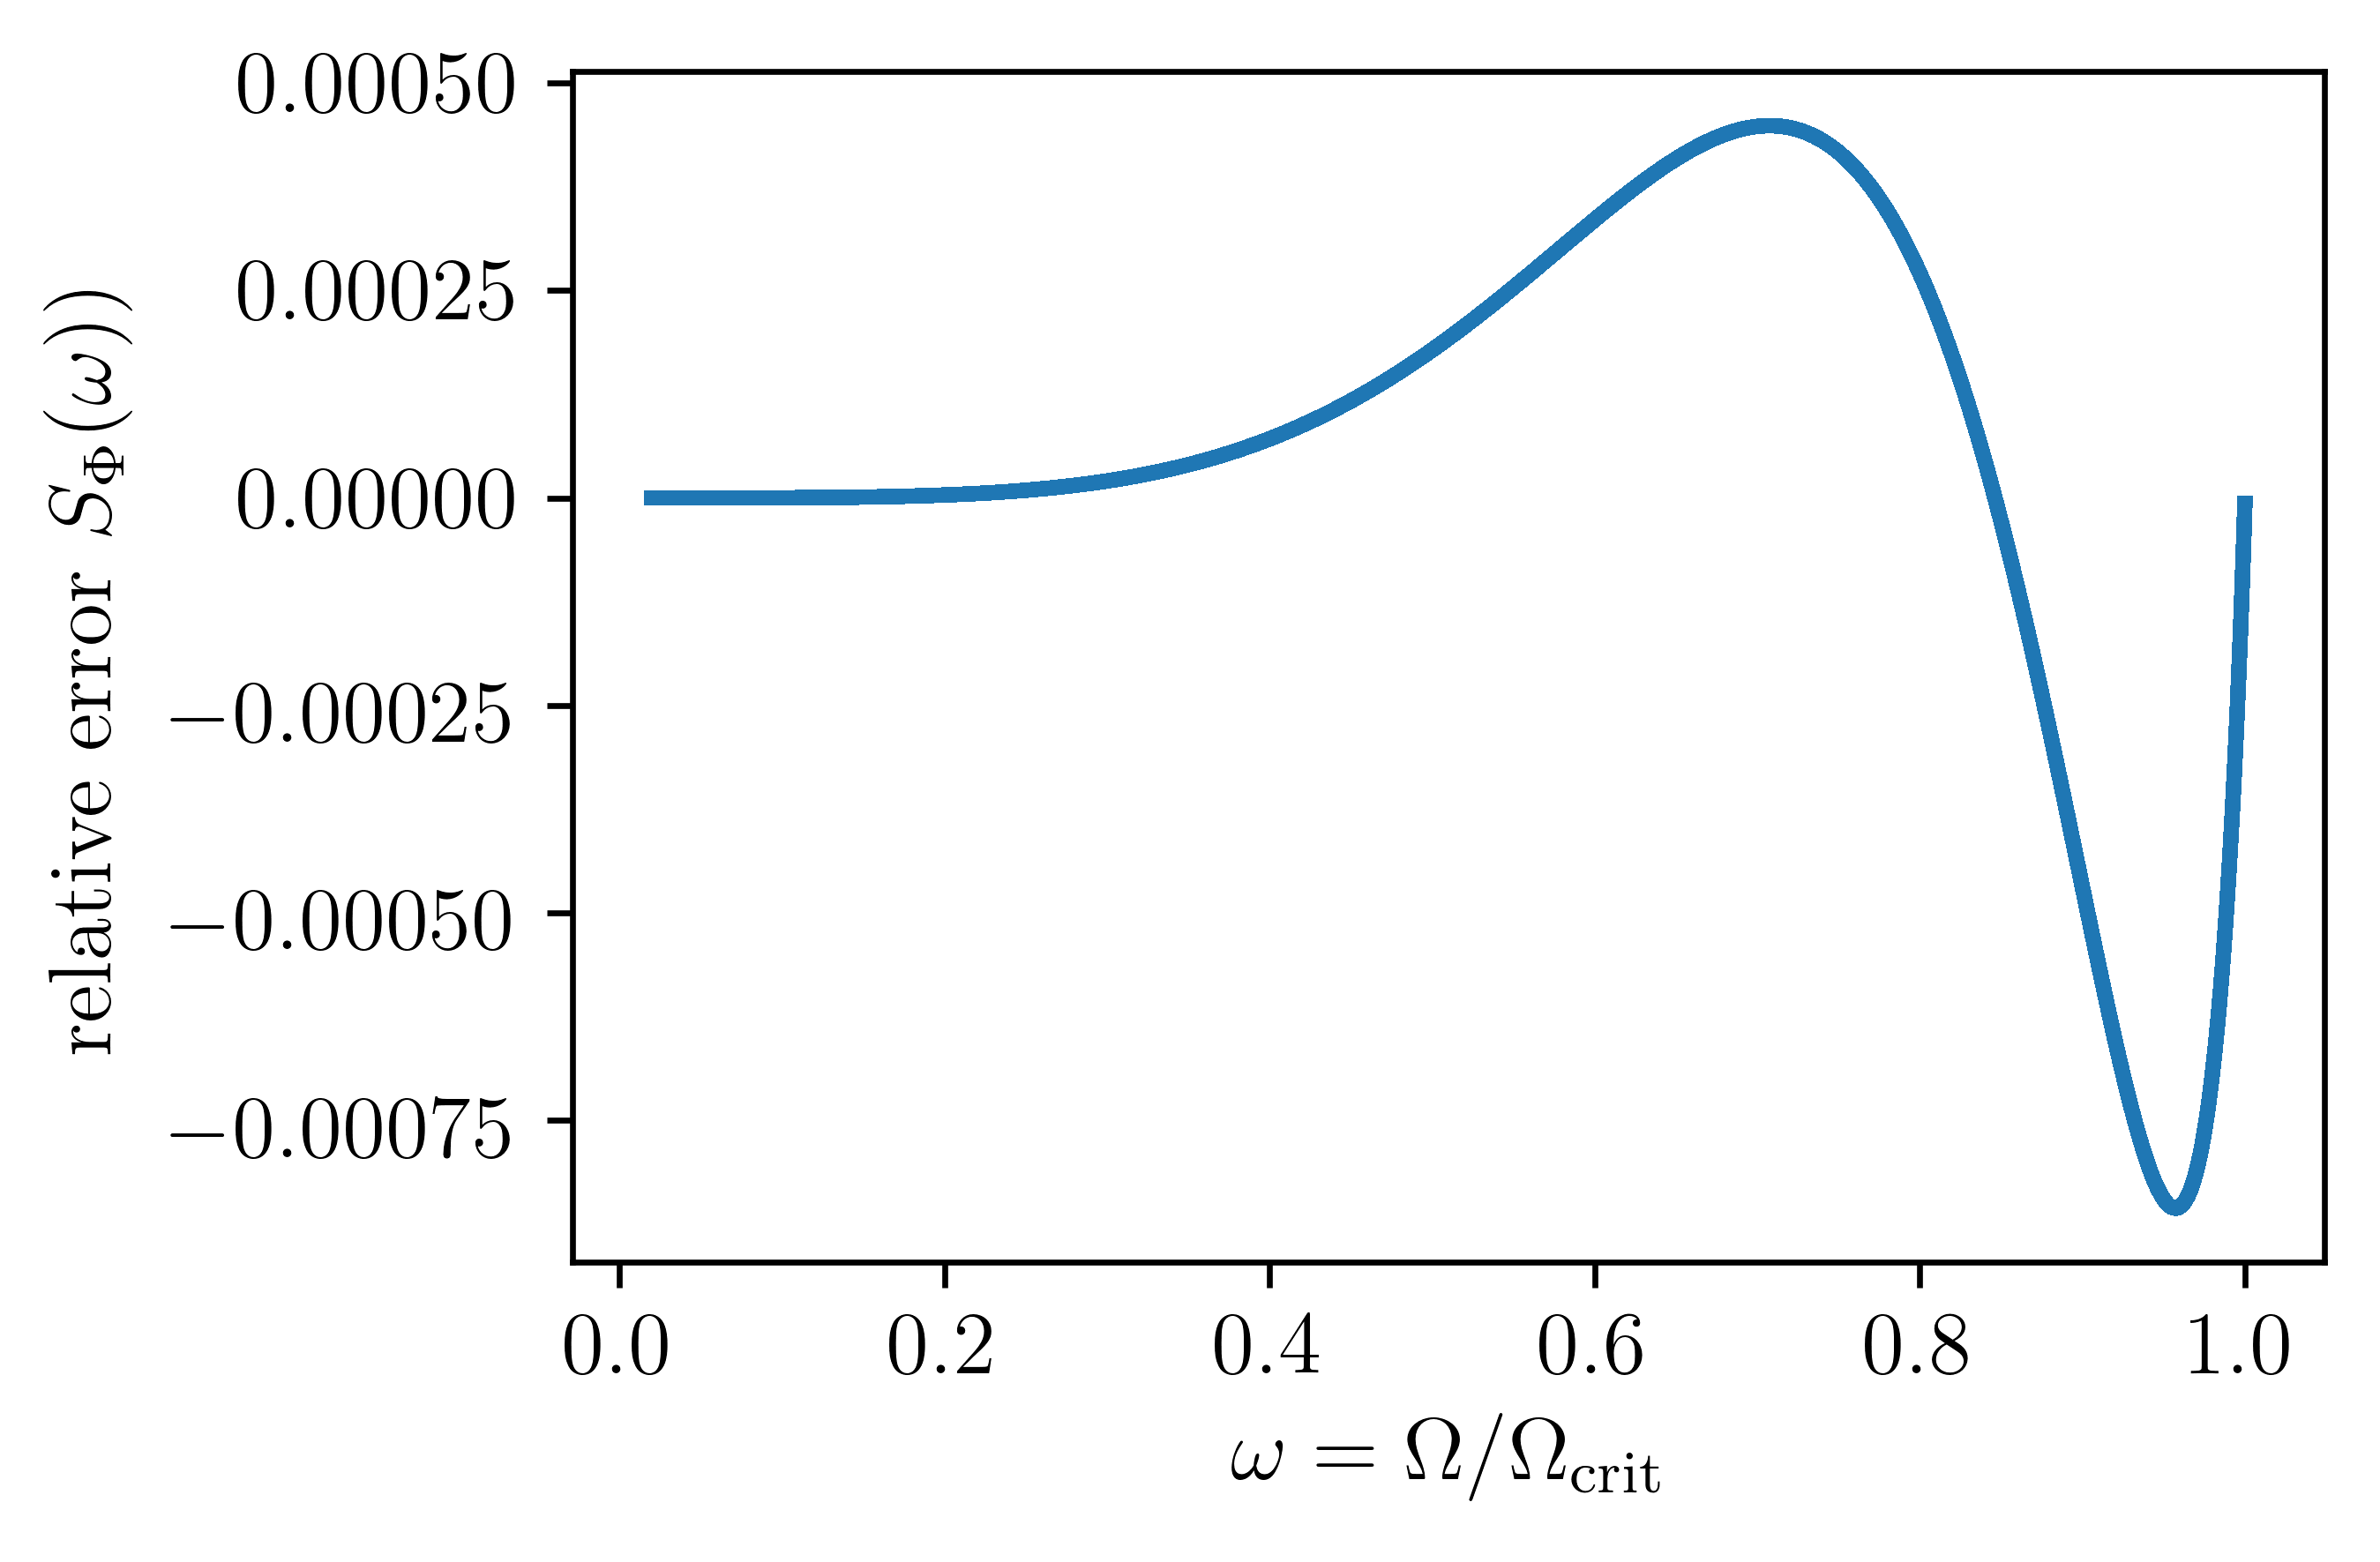

[ 0.08524846] -0.04907933388


In [12]:
#Fit Sphi(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = Sphis

crit_val = Sphi_crit/(4*np.pi) #This is Sphi at critical (computed above numerically)

def func(x, a):
    b=crit_val-2./3.-a
    return 4*np.pi*x**(4./3.)*(1-x**2/3+a*x**4+b*x**6)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#check the fit I get directly, just to verify there are no typos in the manuscript
#plt.plot(x0, 4*np.pi*x0**(4./3.)*(1-x0**2/3+0.08525*x0**4-0.04908*x0**6),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
#plt.gca().set_xlim([0,8])
#plt.gca().set_ylim([0,8])
plt.gca().set_ylabel("relative error $S_\Phi(\omega))$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.show()
#print(popt,crit_val-0.5-popt[0]-popt[1]-popt[2])
print(popt,crit_val-2./3.-popt[0])

In [13]:
#Almost the same as the previous one, Eq. (7) in Marchant (2018) but with g^{-1}
#Compute Fp from this one
def invg_times_dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    g = np.sqrt((-x/np.power(x**2+y**2,1.5)+x)**2
                +(y/np.power(x**2+y**2,1.5))**2)
    return 2*np.pi*x*np.sqrt(dydx**2+1)/g

fps = np.zeros(len(log_phis))
inv_g_avg = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: invg_times_dA_dx(x,wc), 0, res[k])
    inv_g_avg[k] = result[0]*2/Sphis[k]
    fps[k] = 4*np.pi*rphis[k]**4/Sphis[k]/inv_g_avg[k]
    

/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


In [14]:
#Eq. (7) in Marchant (2018)
#Compute Ft from this one
def g_times_dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    g = np.sqrt((-x/np.power(x**2+y**2,1.5)+x)**2
                +(y/np.power(x**2+y**2,1.5))**2)
    return 2*np.pi*x*np.sqrt(dydx**2+1)*g

fts = np.zeros(len(log_phis))
g_avg = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: g_times_dA_dx(x,wc), 0, res[k])
    g_avg[k] = result[0]*2/Sphis[k]
    fts[k] = (4*np.pi*rphis[k]**2/Sphis[k])**2/(g_avg[k]*inv_g_avg[k])
    
g_avg_crit = 2*integrate.quad(lambda x: g_times_dA_dx(x,1), 0, 1)[0]/Sphi_crit


In [15]:
#Eq. (7) in Marchant (2018)
#Compute irot from this one
def x2_times_invg_times_dA_dx(x,wc):
    y = np.sqrt((1/np.power(wc,2./3.)+np.power(wc,4./3.)/2-x**2/2)**(-2)-x**2)
    dydx = ((2.*x)/(-x**2/2+wc**(4./3.)/2.+1./wc**(2./3.))**3-2.*x) \
       /(2.*np.sqrt(1./(-x**2/2.+wc**(4./3.)/2.+1./wc**(2./3.))**2-x**2))
    g = np.sqrt((-x/np.power(x**2+y**2,1.5)+x)**2
                +(y/np.power(x**2+y**2,1.5))**2)
    return 2*np.pi*x**3*np.sqrt(dydx**2+1)/g

irots = np.zeros(len(log_phis))
for k, wc in enumerate(wcs):
    #xrange for the integration goes from zero to the equatorial radius
    result = integrate.quad(lambda x: x2_times_invg_times_dA_dx(x,wc), 0, res[k])
    irots[k] = result[0]*2/(inv_g_avg[k]*Sphis[k])


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


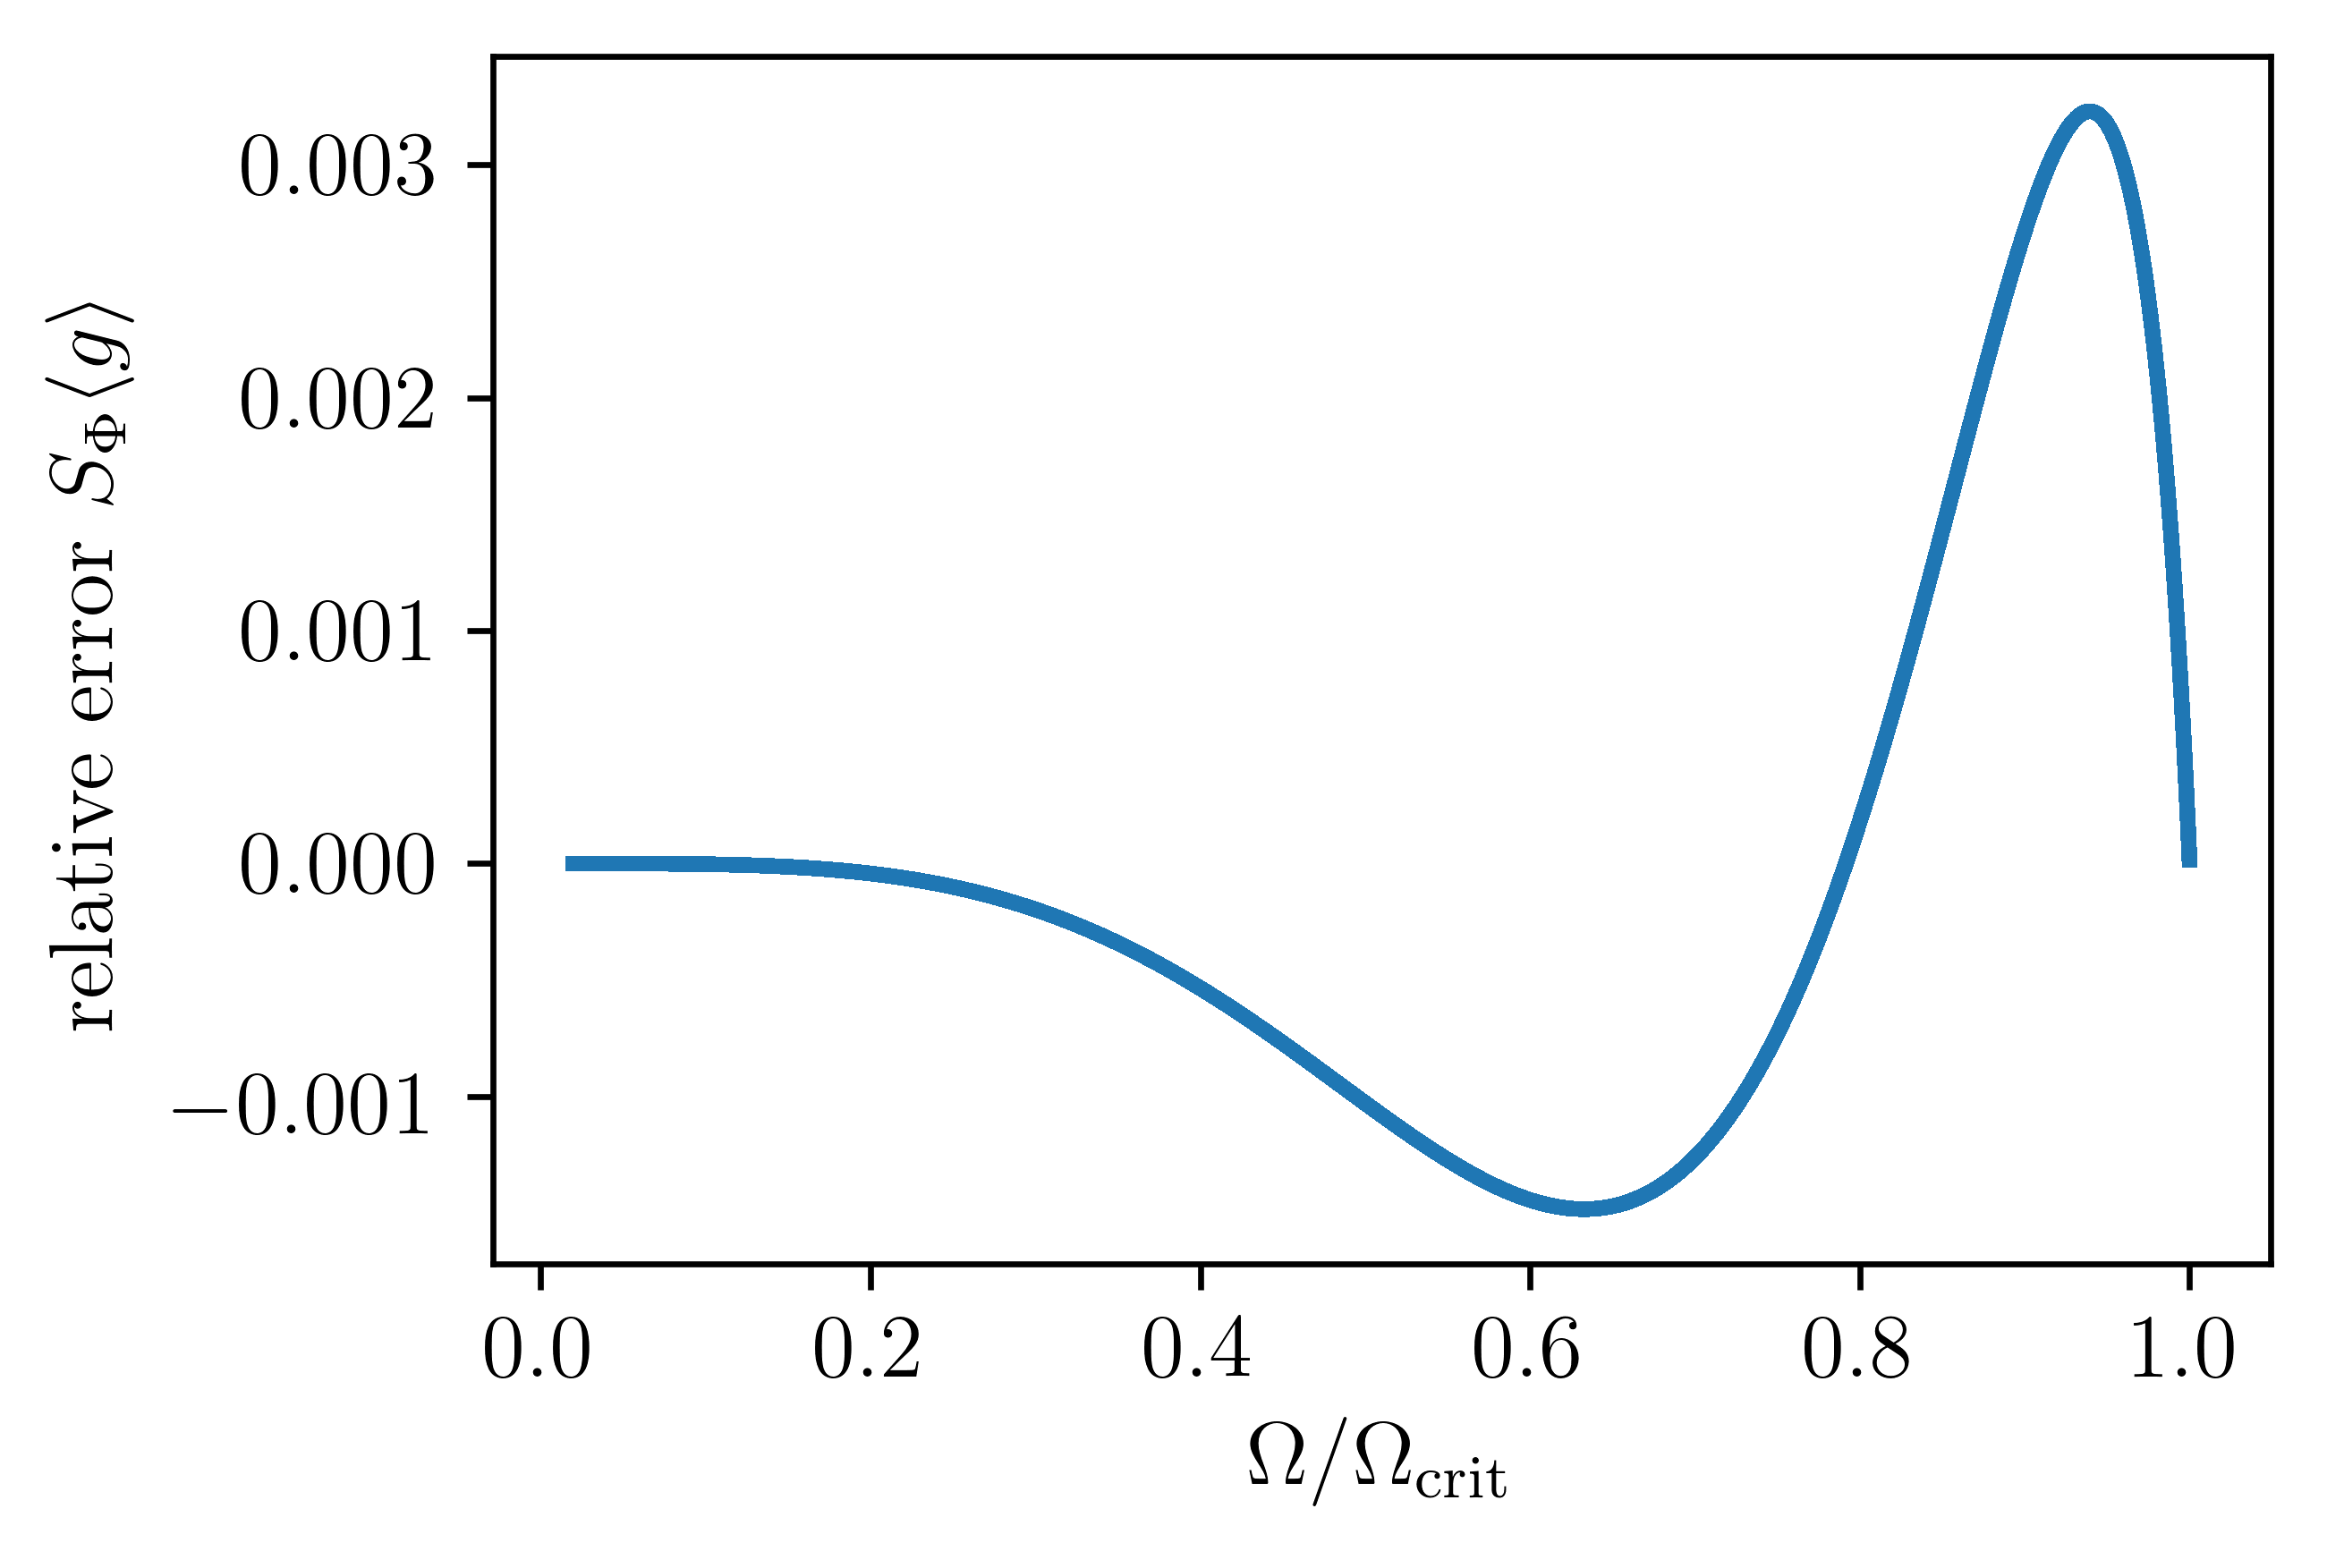

[ 0.30454087] 0.00138206147709


In [141]:
#Fit omega(rphi'), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = Sphis*g_avg

crit_val = g_avg_crit*Sphi_crit/(4*np.pi) #value of the surface

def func(x, a):
    b = crit_val-1./3.-a
    return 4*np.pi*(1-2.*x**2/3.+a*x**4+b*x**6)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#Manually check fit in paper to prevent typos
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $S_{\Phi}\\langle g \\rangle$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt,crit_val-1./3.-popt[0])

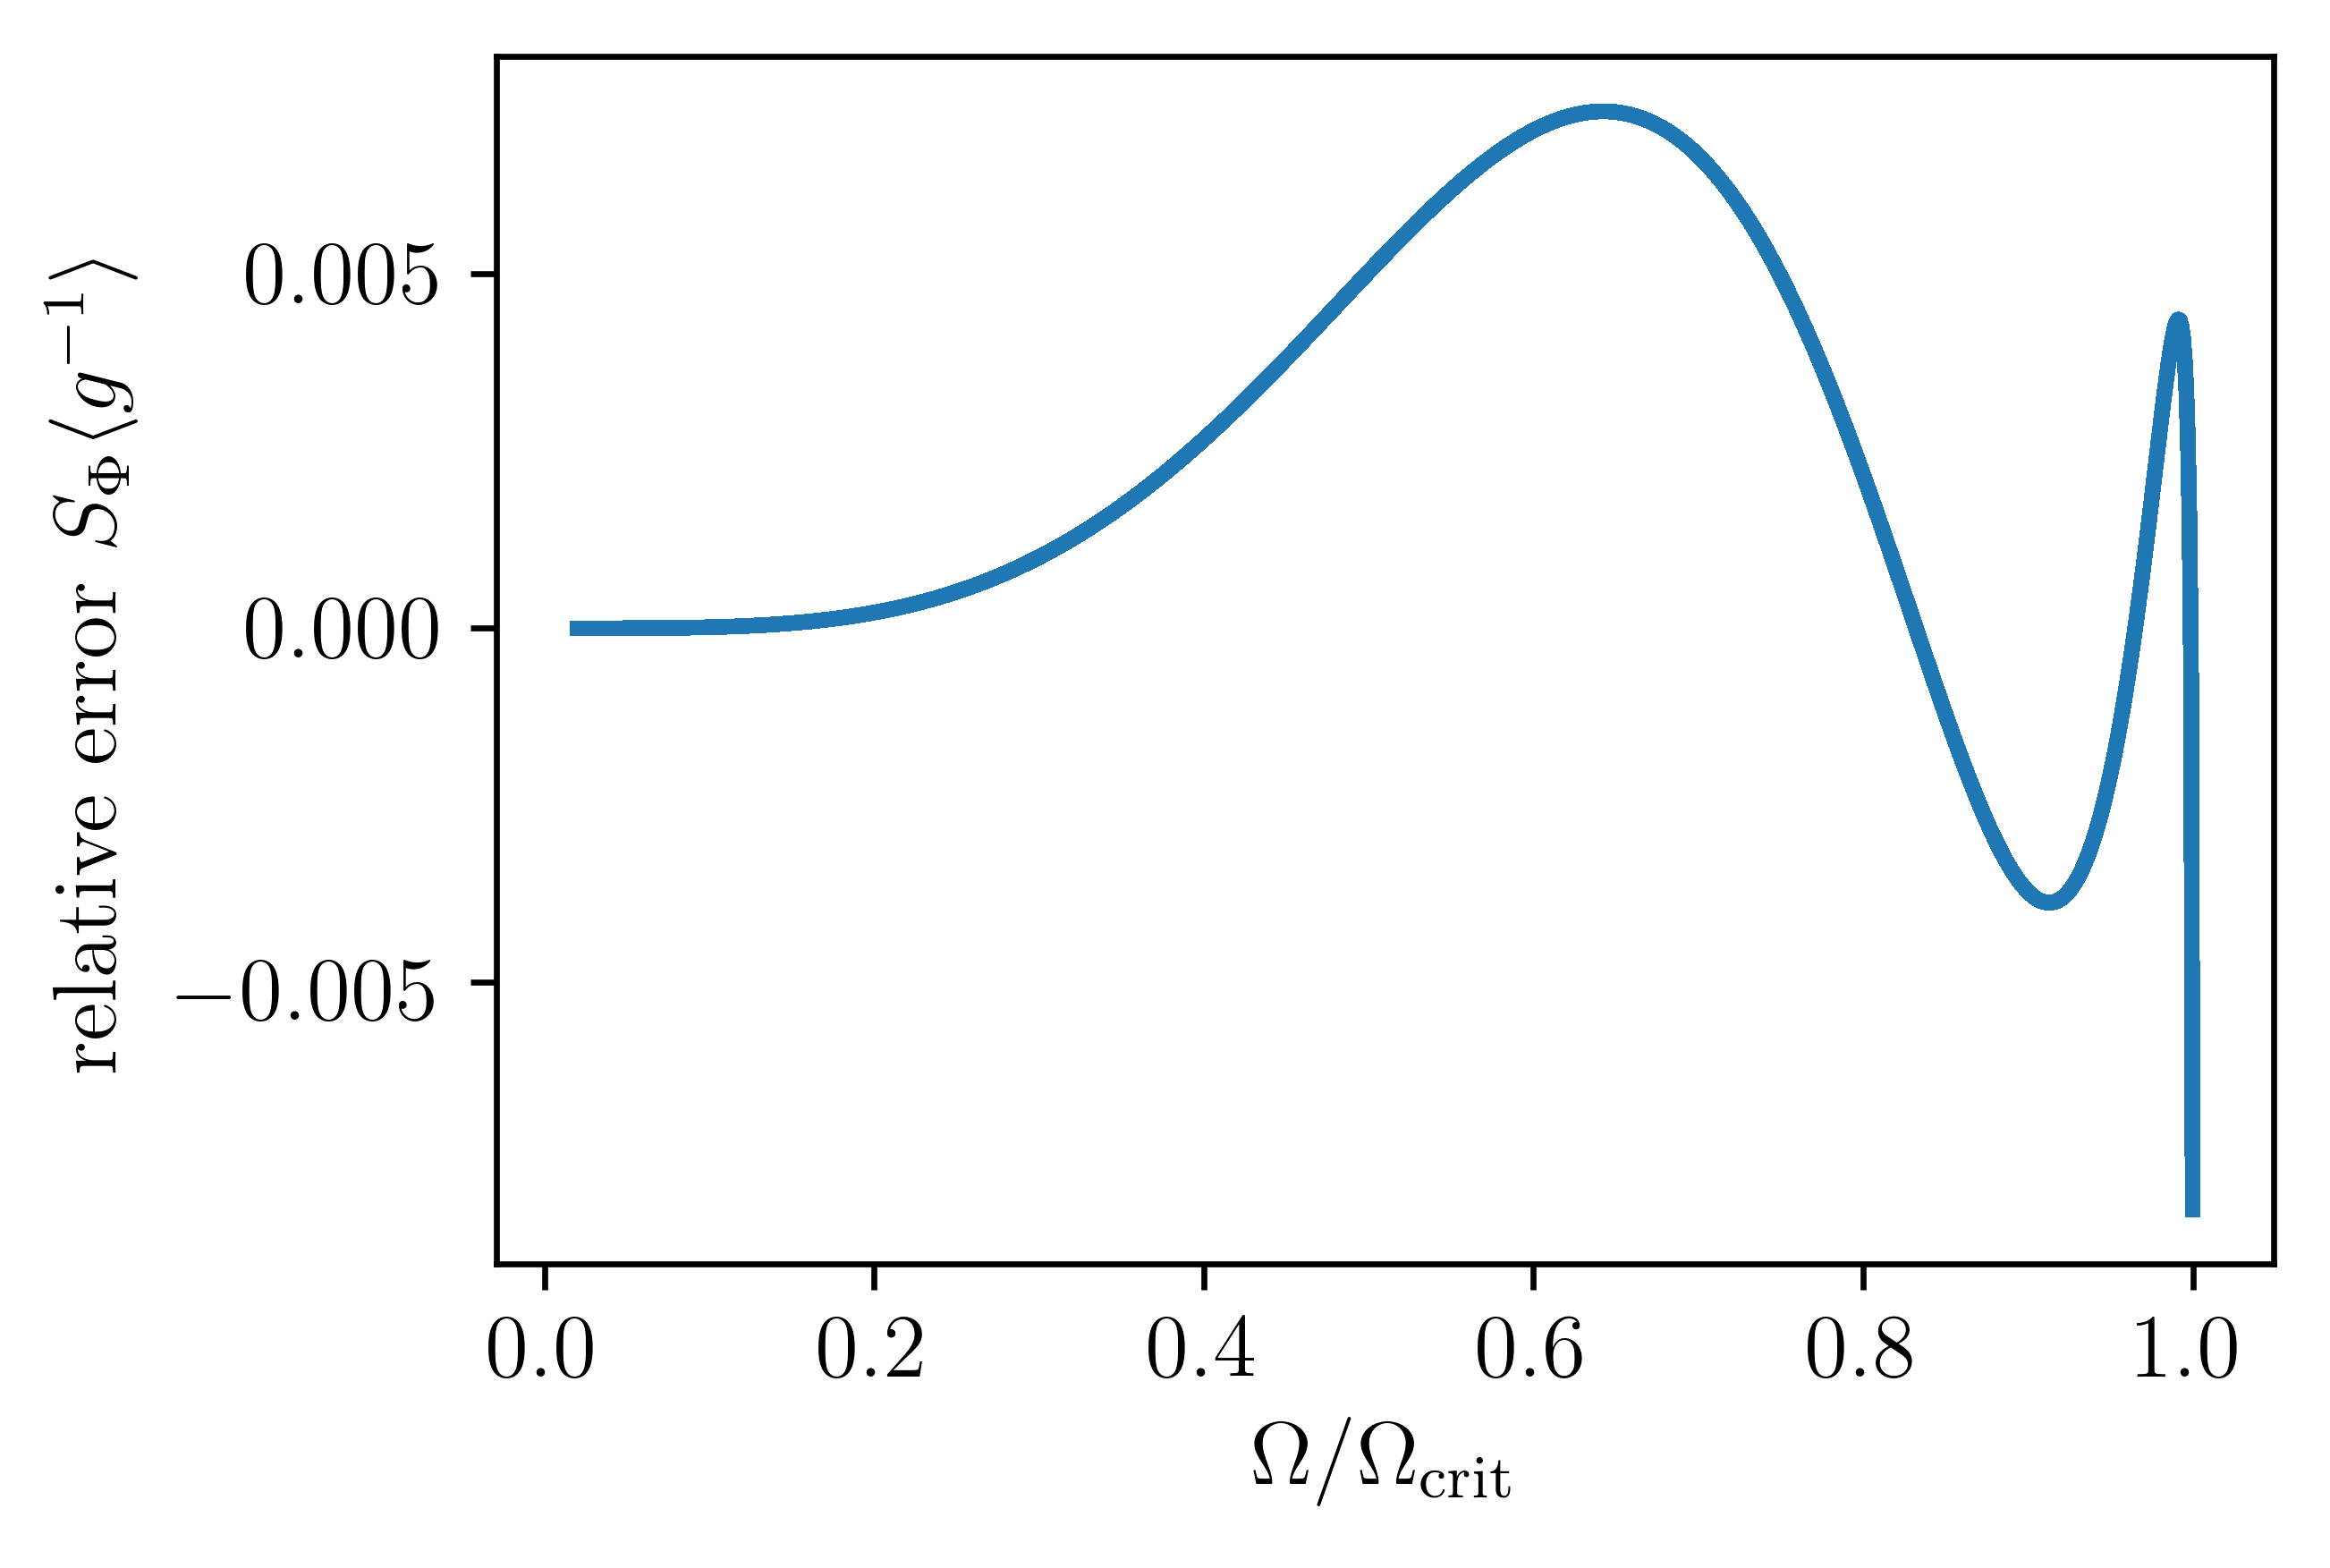

-0.0082001858814
[-0.10771743 -0.23341578 -0.55822455]


In [17]:
#Fit omega(rphi'), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = Sphis*inv_g_avg

def func(x, a,b,c):
    return 4*np.pi*res**4*(1+a*x**4+b*x**6+c*np.log(1-x**4))
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $S_{\Phi}\\langle g^{-1} \\rangle$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(((func(x0, *popt)-y0)/y0)[0])
print(popt)

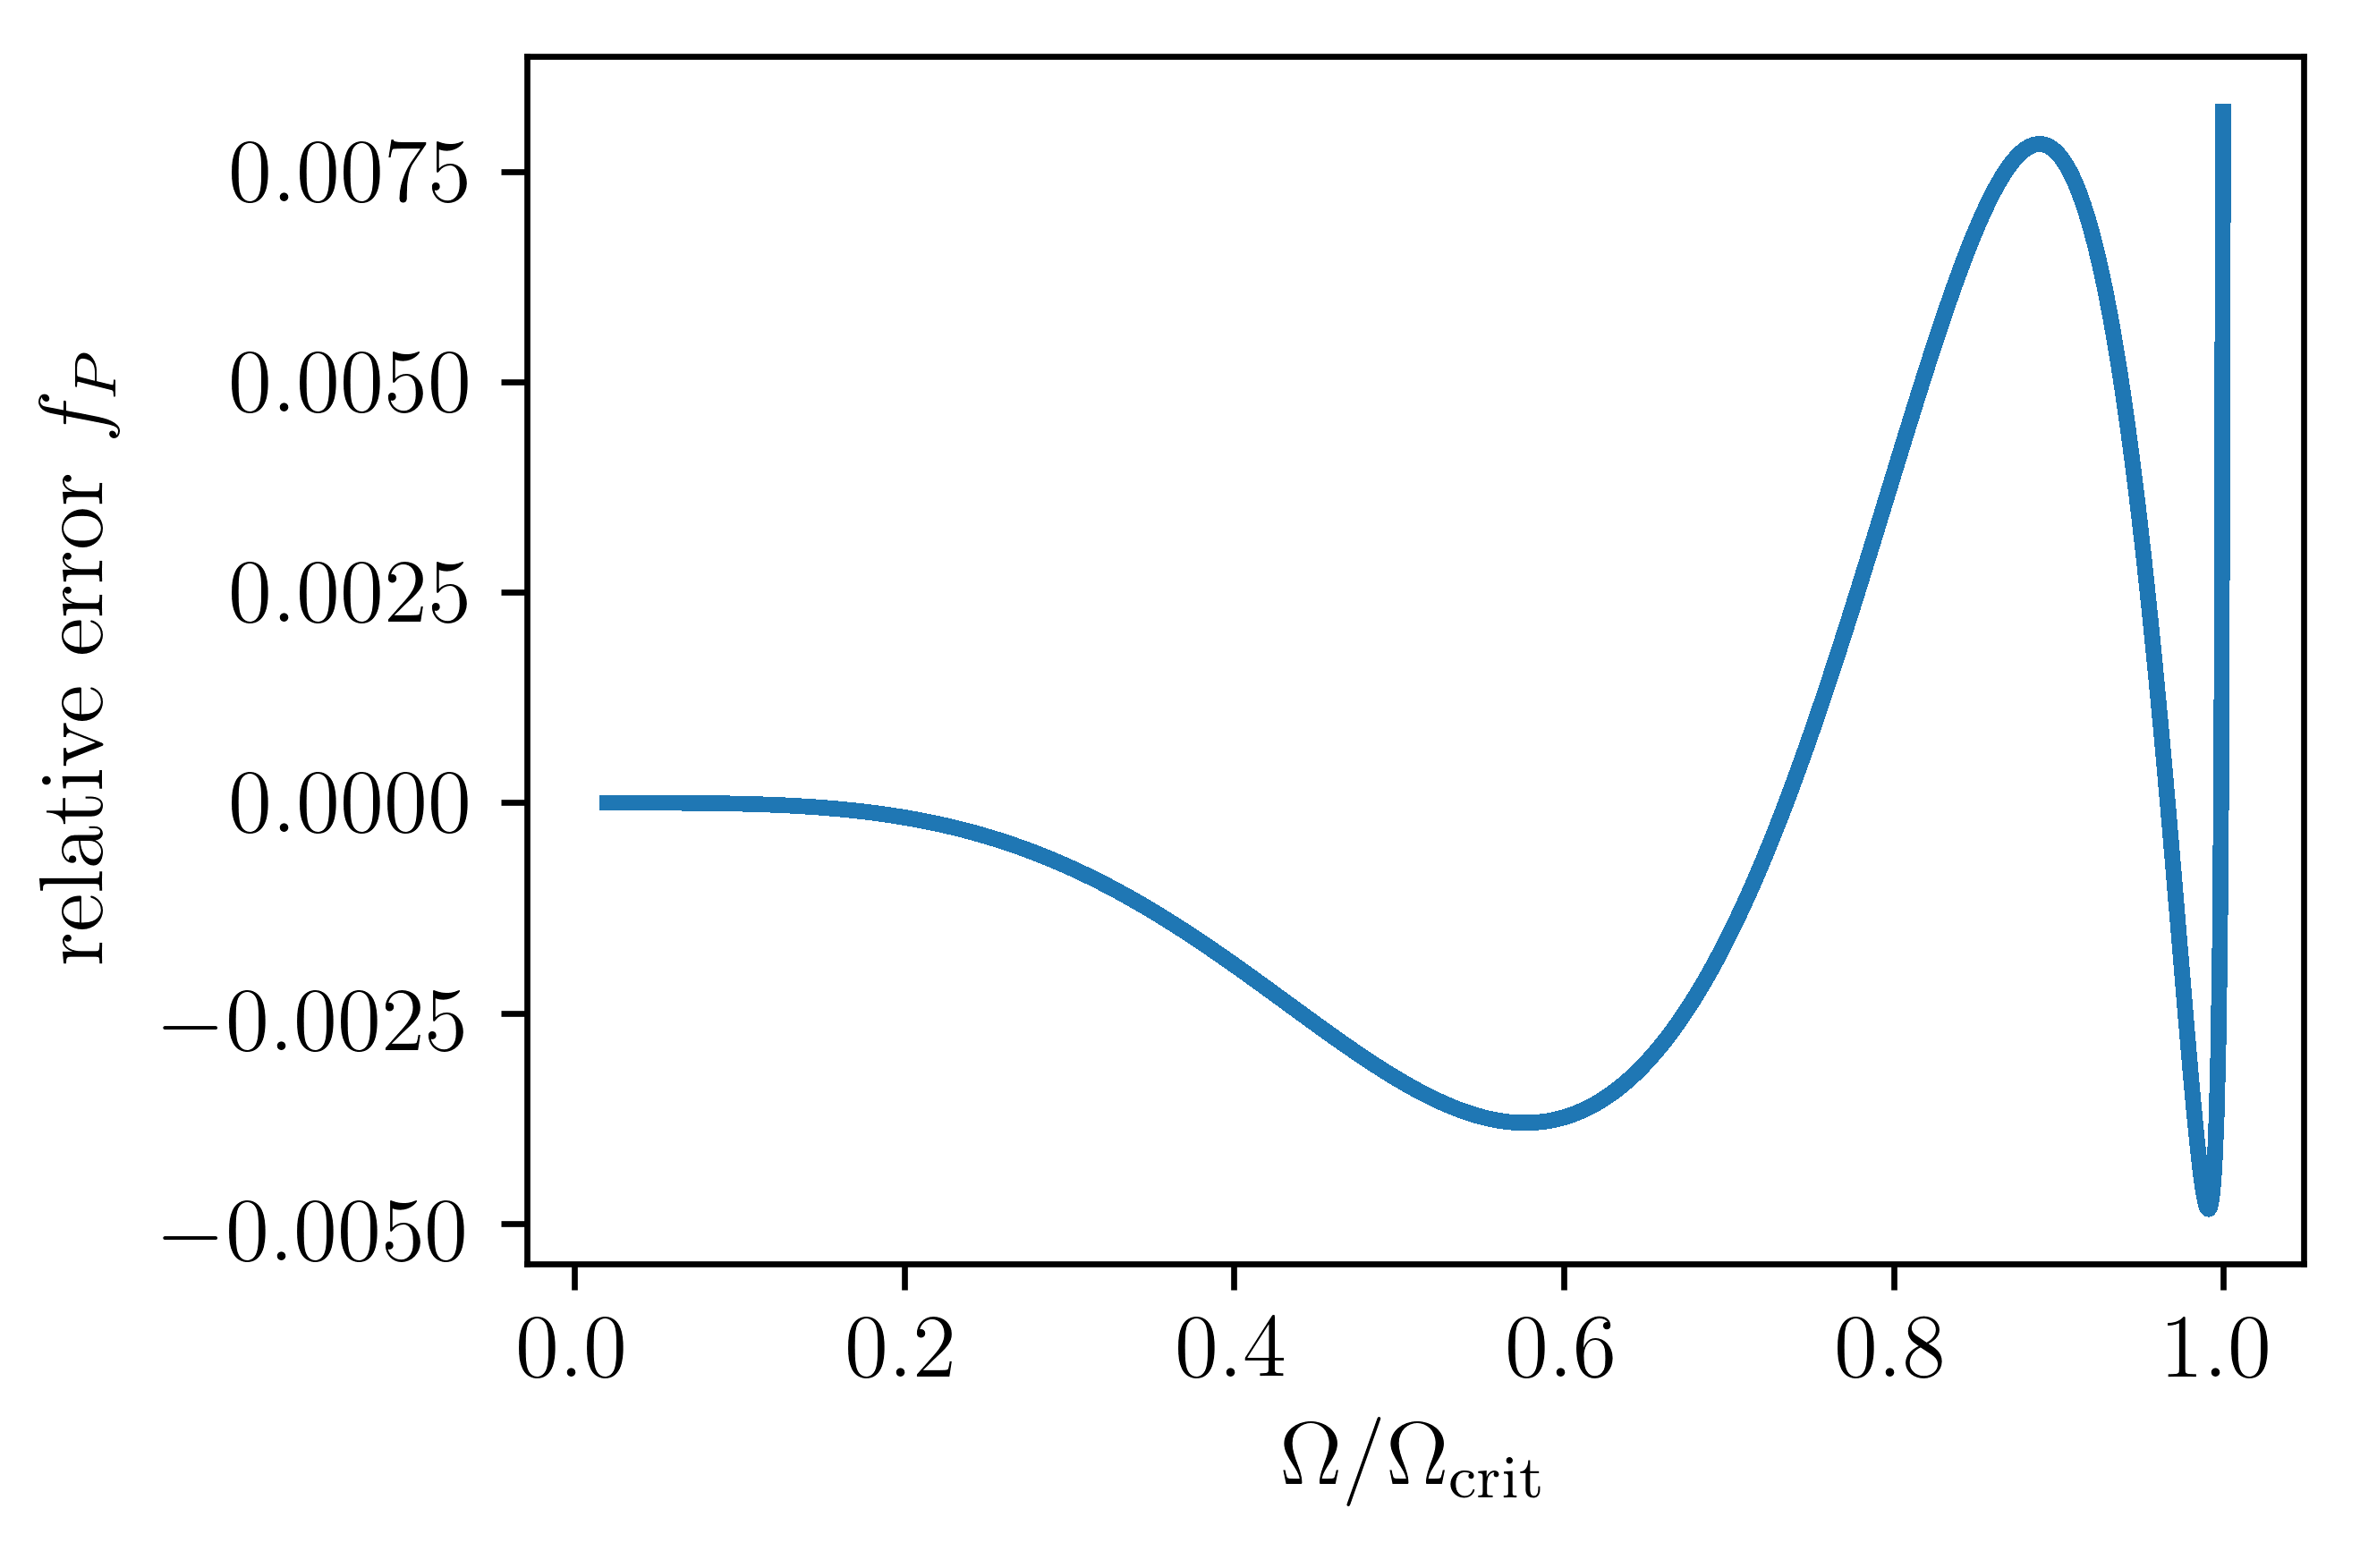

[ 0.21853531] -0.110921297506


In [18]:
#Fit omega(rphi'), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = fps

crit_val = rphi_crit**4

def func_fp(x, a):
    b = crit_val-1./3.-a
    return (1-2./3.*x**2+a*x**4+b*x**6)/(1-0.10760471*x**4-0.23364815*x**6-0.55826461*np.log(1-x**4))
    #return (1-2./3.*x**2+a*x**4+b*x**6)/(1+c*x**4+d*x**6+e*np.log(1-x**4))
popt_fp, pcov = curve_fit(func_fp, x0, y0)#, maxfev=10000)
plt.plot(x0, ((func_fp(x0, *popt_fp)-y0)/y0),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $f_P$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt_fp, crit_val-1./3.-popt_fp[0])

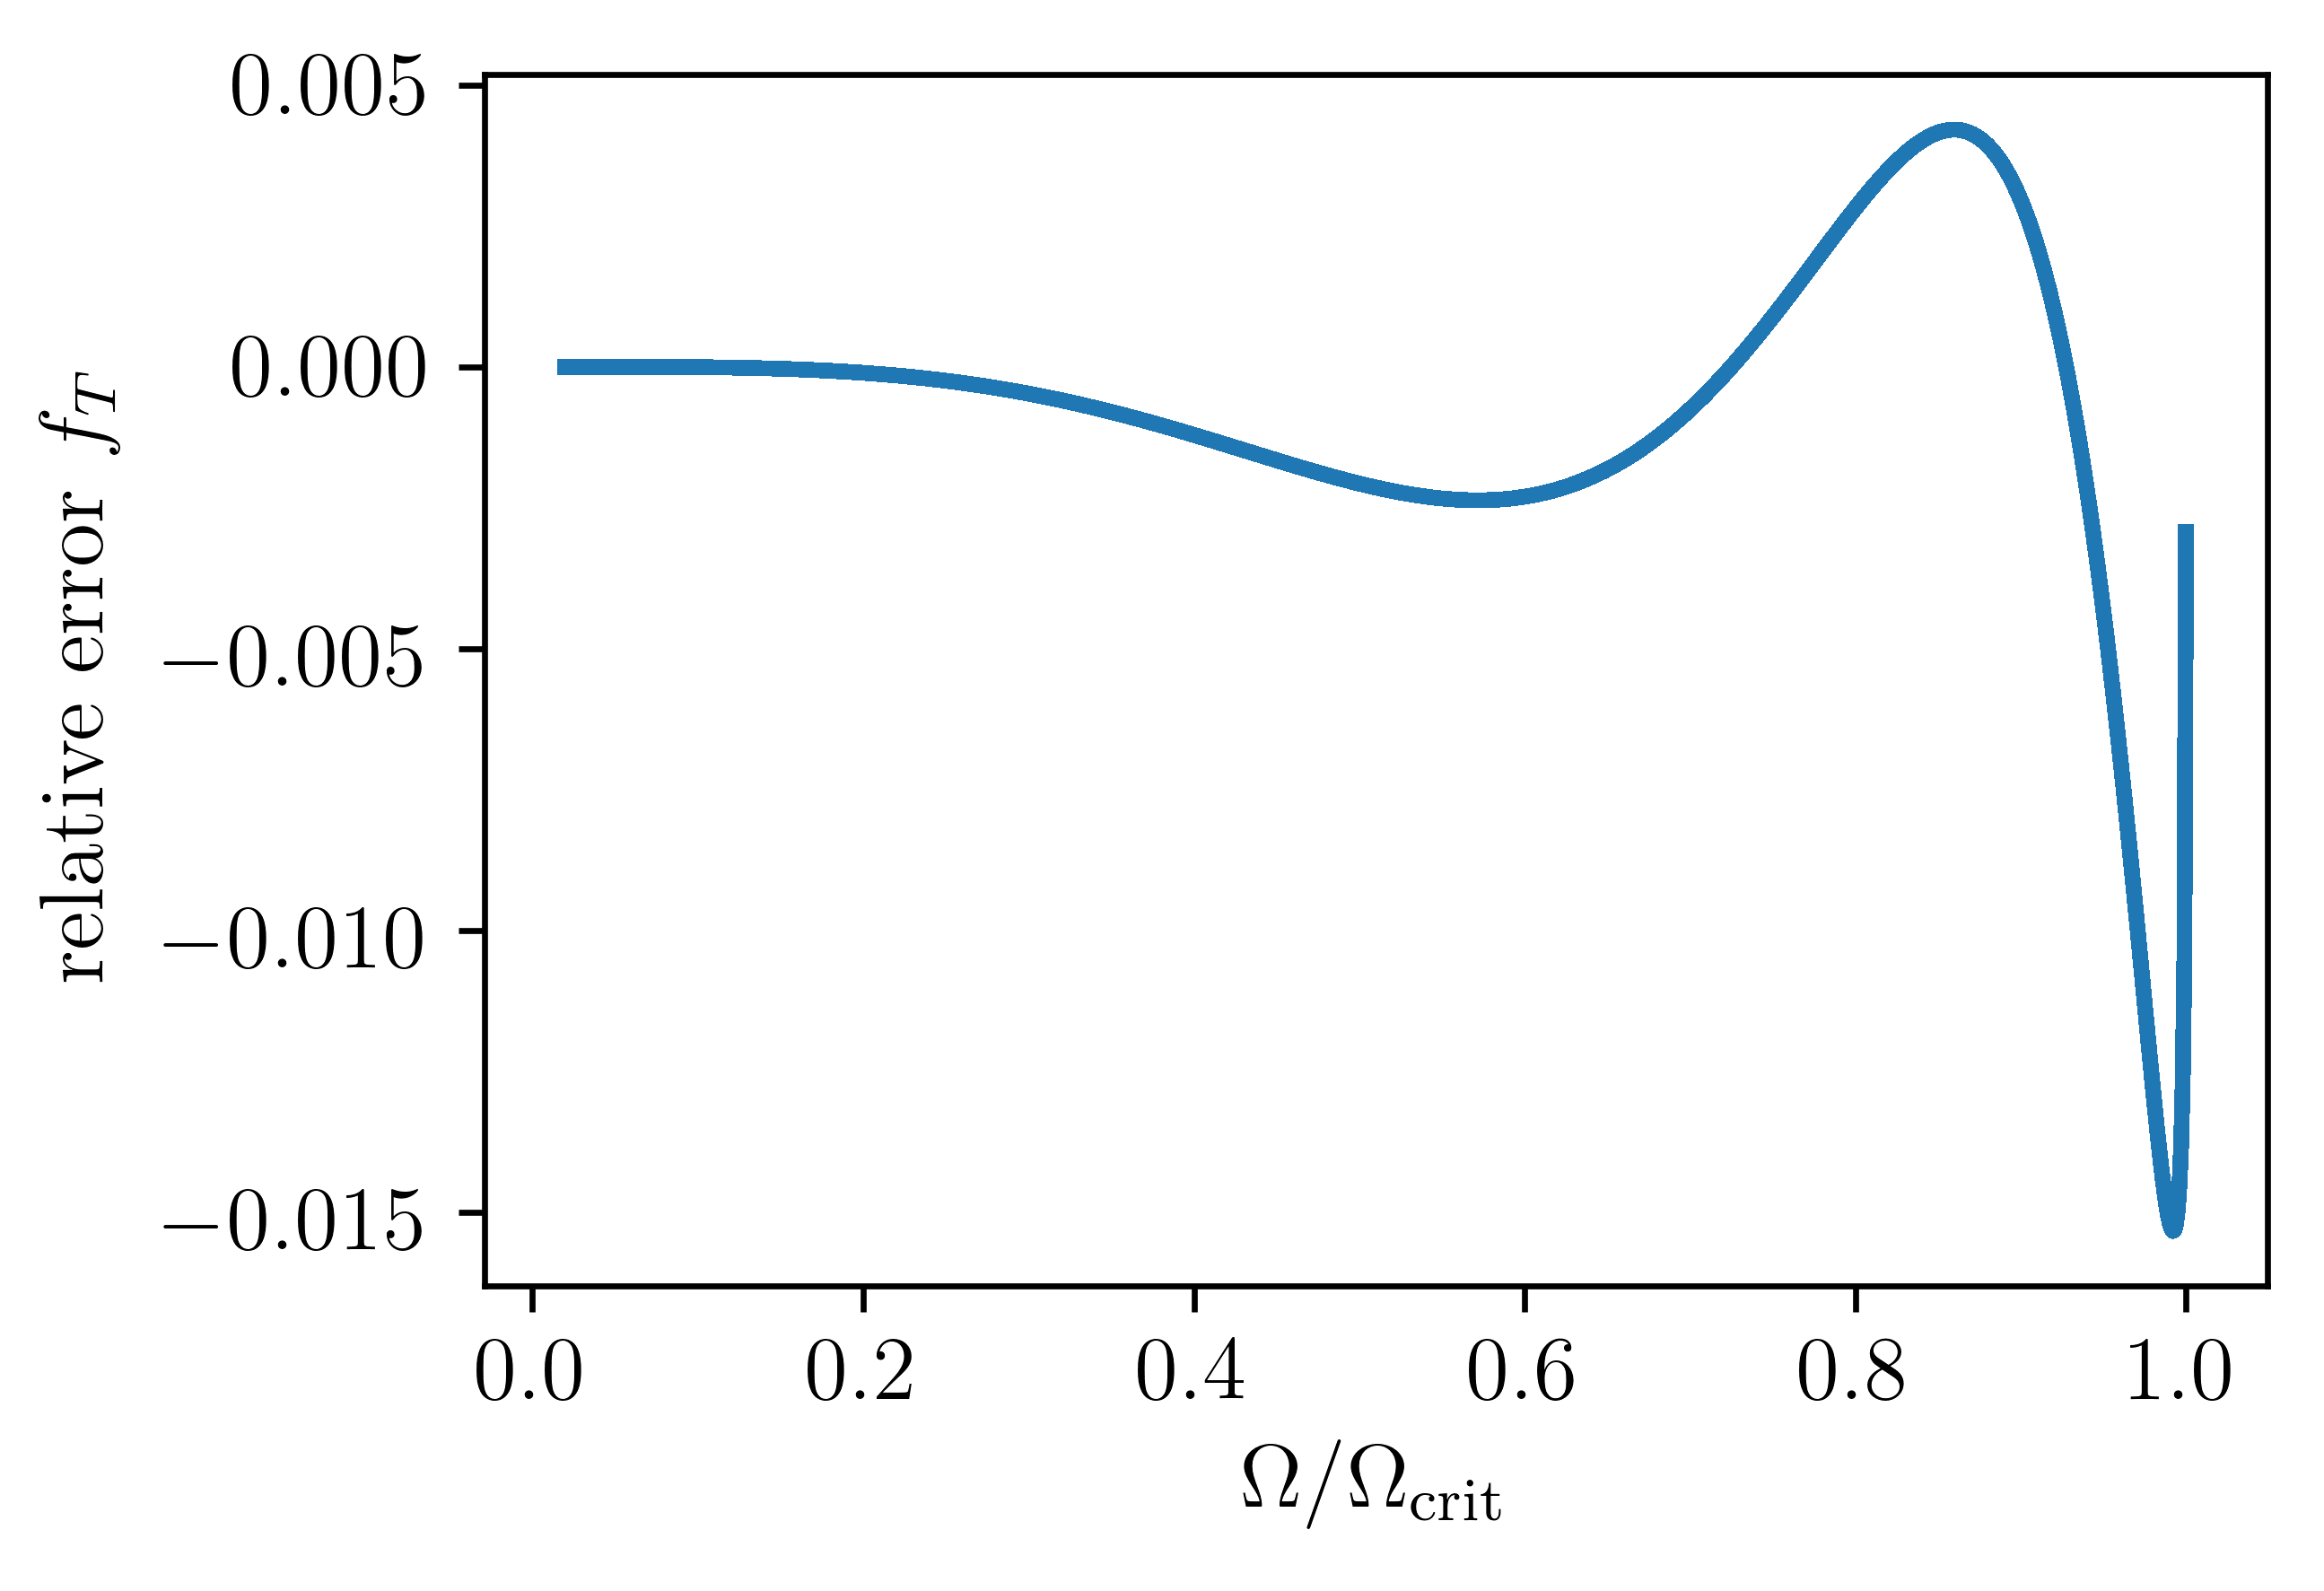

[-0.06836553 -0.24948545]


In [19]:
#Fit omega(rphi'), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = fts

def func_ft(x, a,b):
    return (1+a*x**4+b*x**6)/(1-0.10760471*x**4-0.23364815*x**6-0.55826461*np.log(1-x**4))
popt_ft, pcov = curve_fit(func_ft, x0, y0)
plt.plot(x0, ((func_ft(x0, *popt_ft)-y0)/y0),'-', label='fit')
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $f_T$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt_ft)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


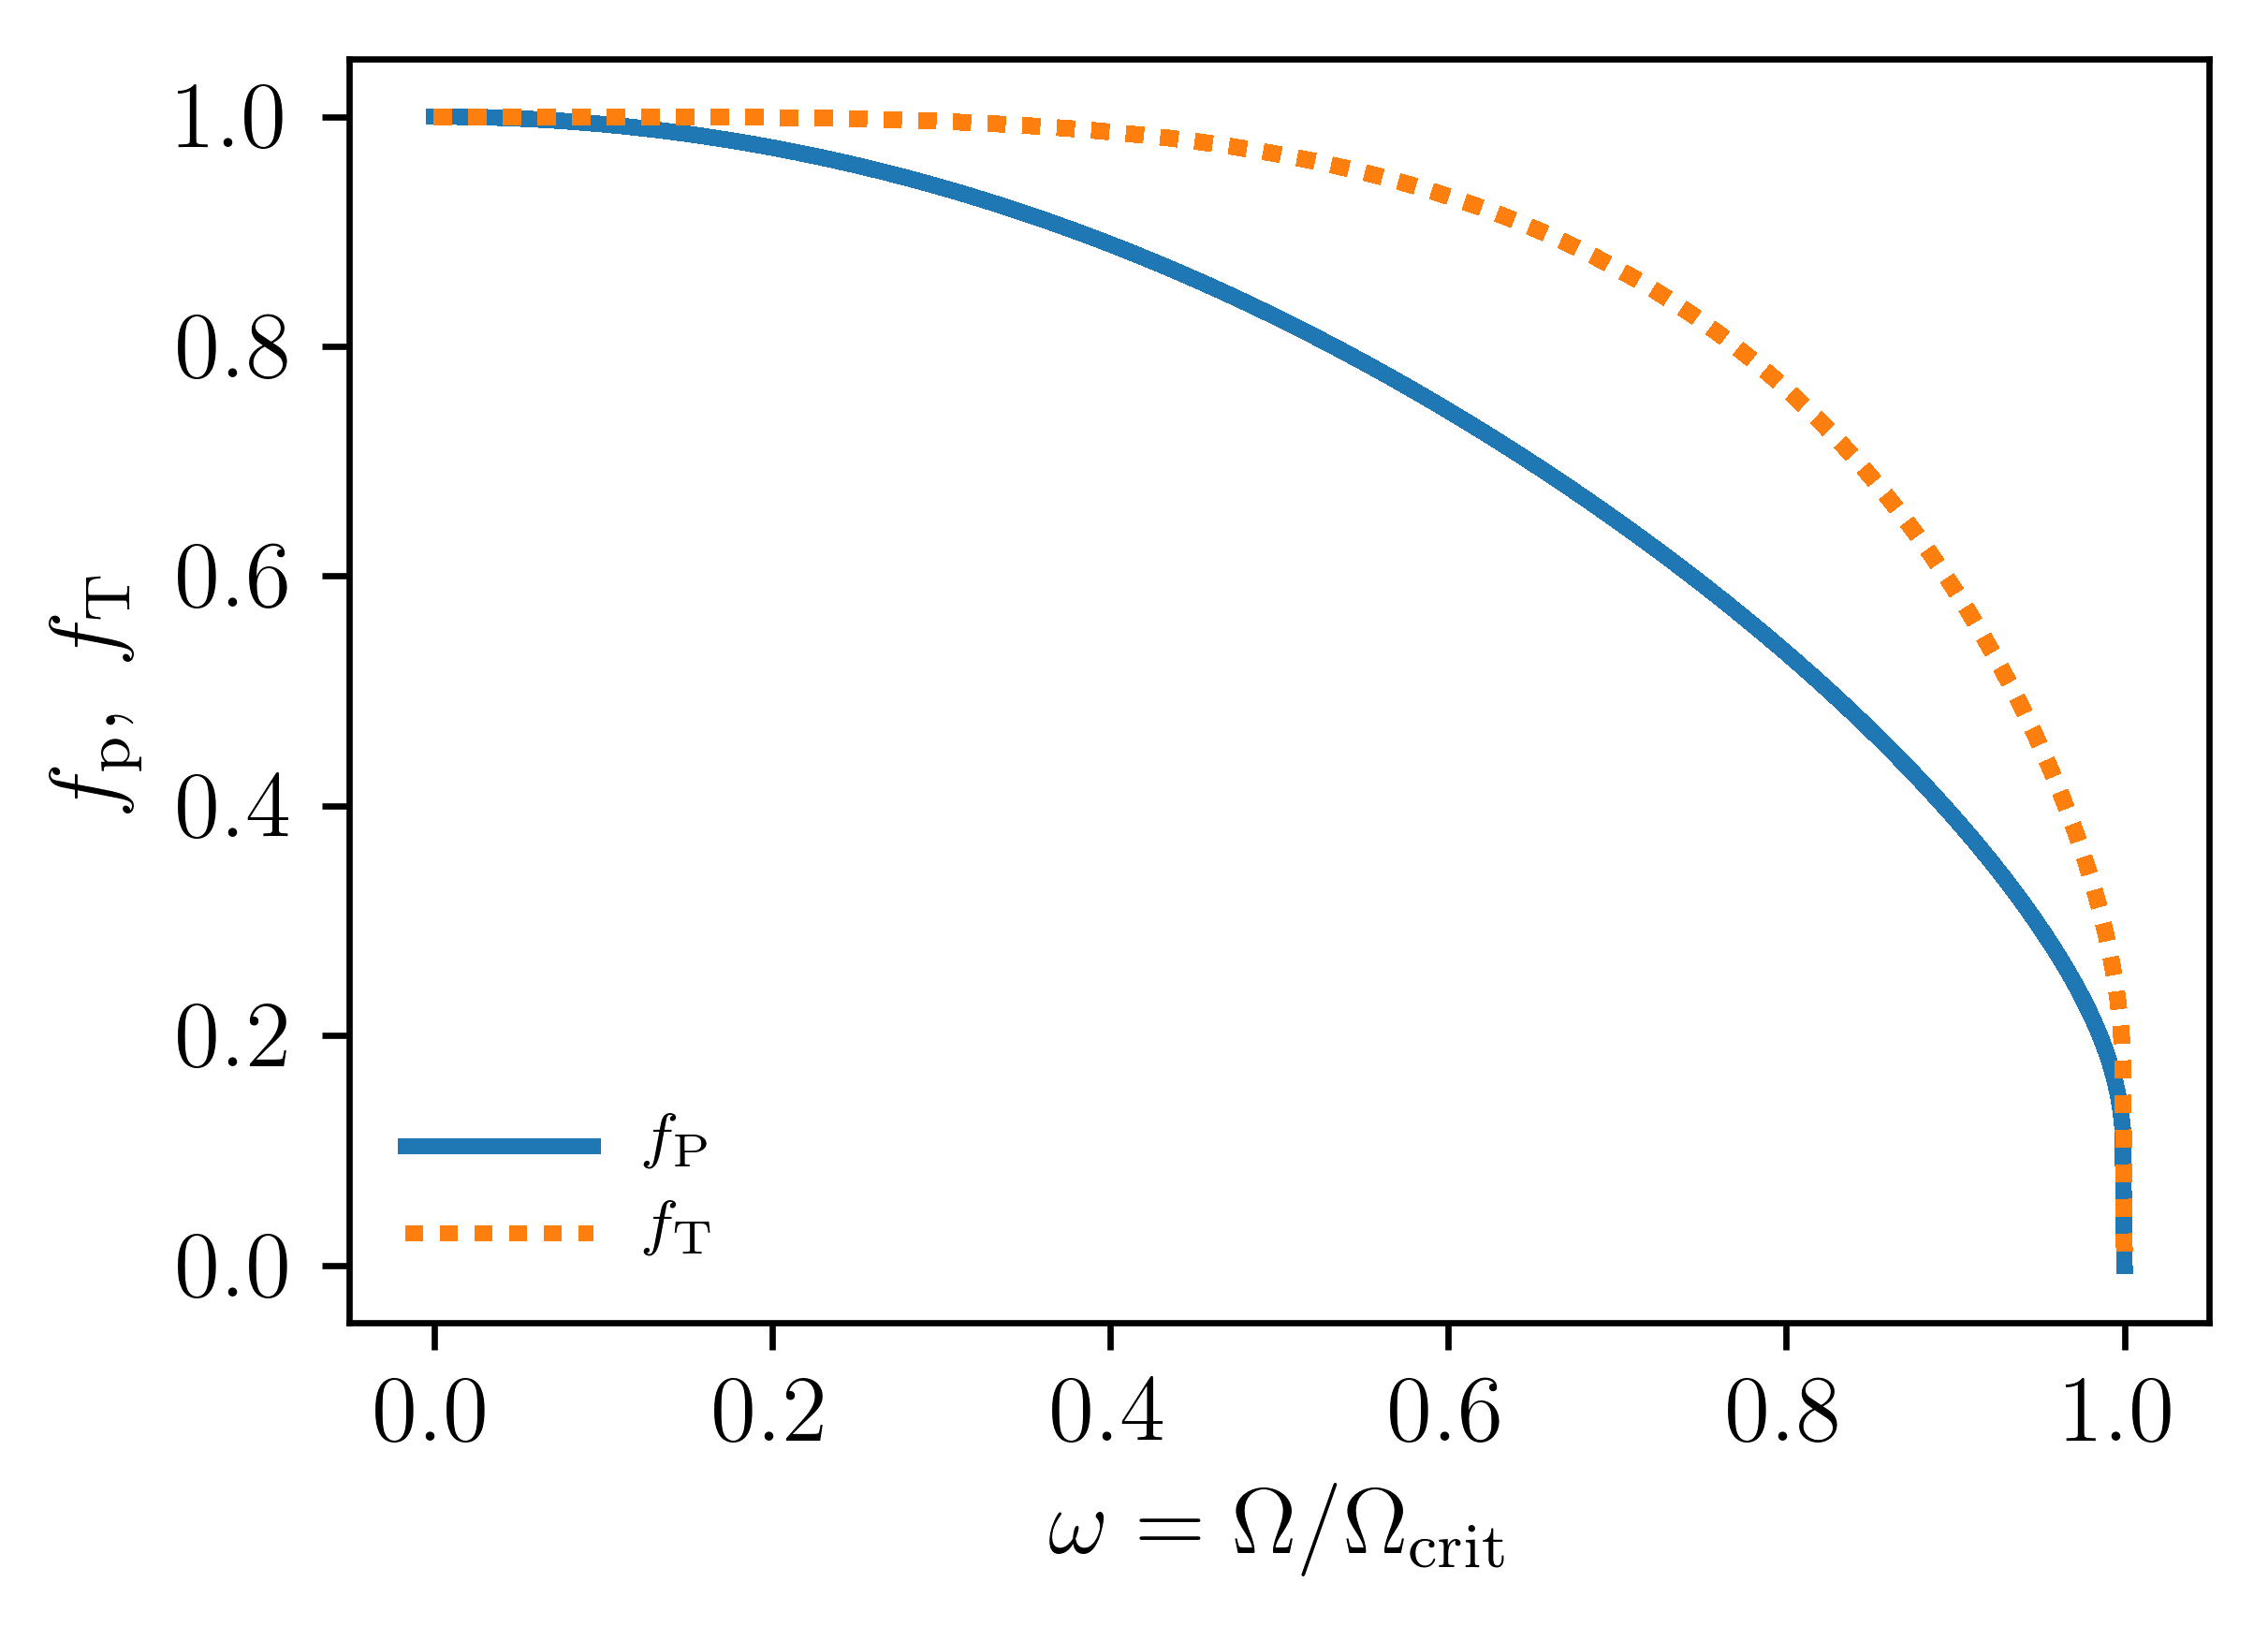

In [20]:
import matplotlib.pyplot as plt
xvals = np.linspace(0,1,1000)
#plt.plot(np.insert(wcs,0,1),np.insert(fps,0,0),"-", label = "$F_{\\rm p}$")
#plt.plot(np.insert(wcs,0,1),np.insert(fts,0,0),":", label = "$F_{\\rm t}$")
plt.plot(xvals,func_fp(xvals, *popt_fp),"-", label = "$f_{\\rm P}$")
plt.plot(xvals,func_ft(xvals, *popt_ft),":", label = "$f_{\\rm T}$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.gca().set_ylabel("$f_{\\rm p},\\; f_{\\rm T}$")
plt.legend(loc=3)
plt.savefig("ftfp_vs_omegac.pdf")
plt.show()

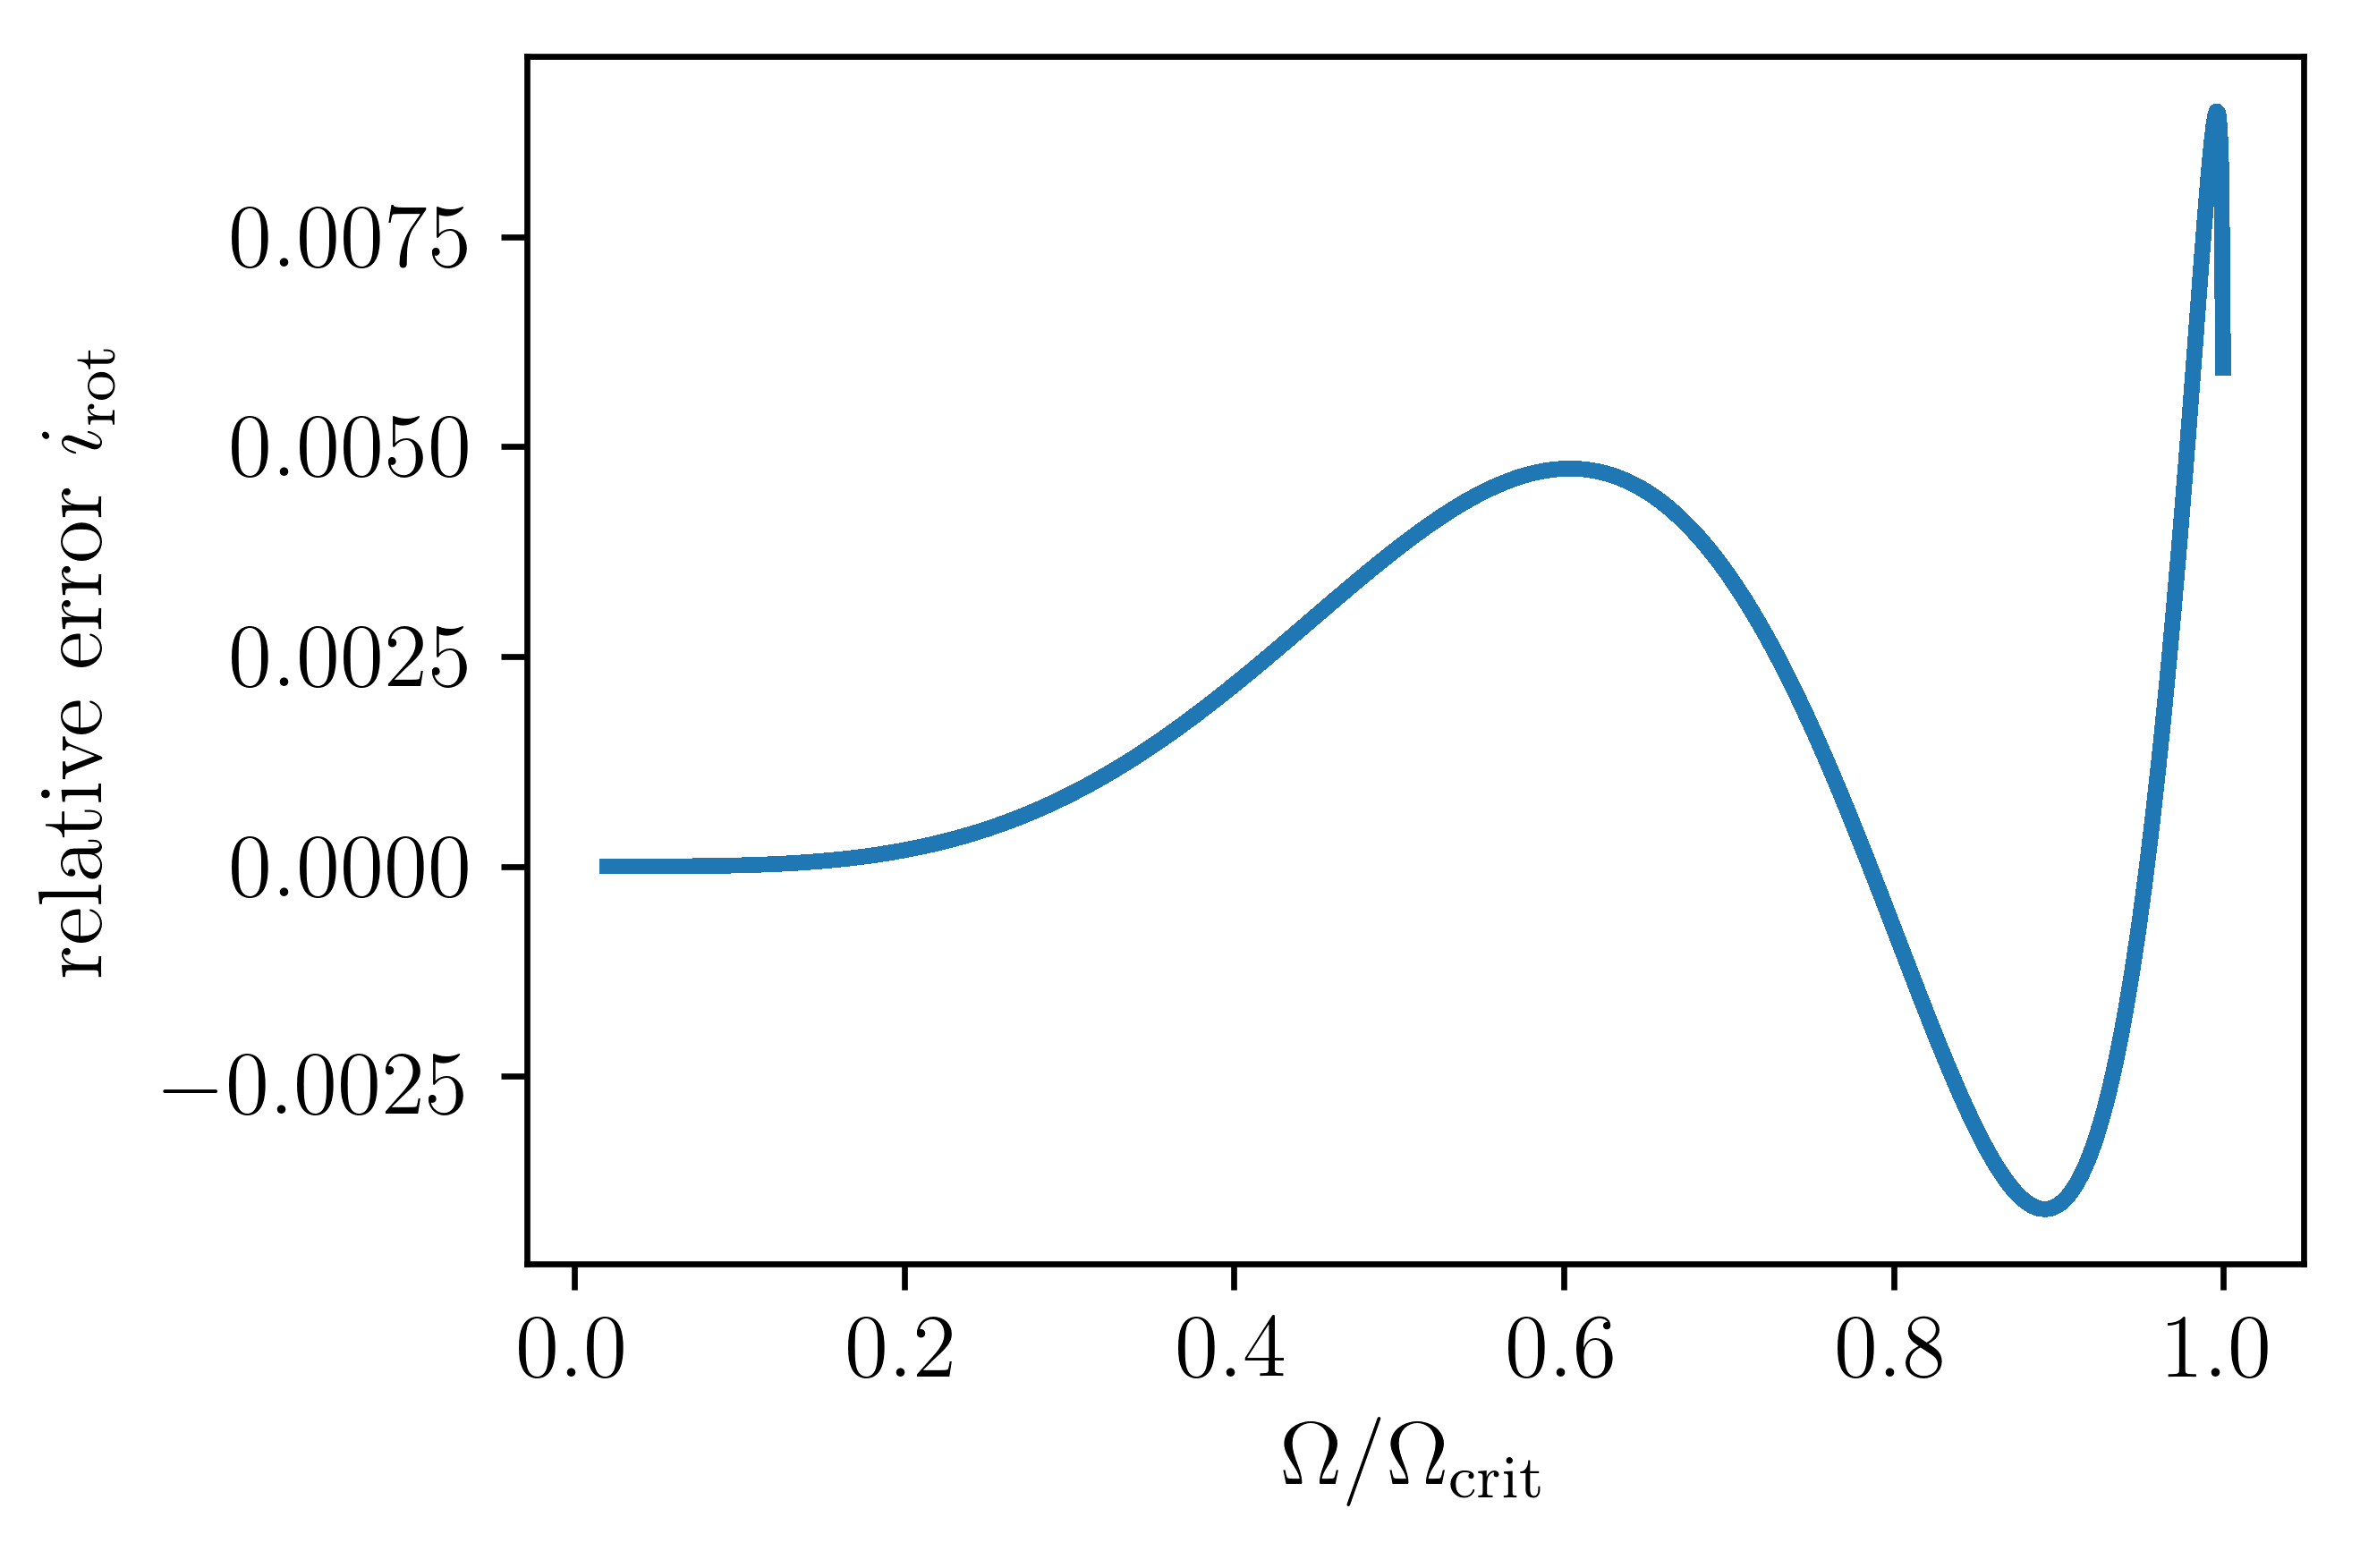

[-0.27349542 -0.43270456] 0.00899226131862


In [131]:
#Fit irot(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = irots

def func_irot(x, a,b):
    return 2./3.*x**(4./3.)*(1+x**2./5+a*x**4+b*x**6-3./2.*0.5583*np.log(1-x**4))/(1-0.1076*x**4-0.2336*x**6-0.5583*np.log(1-x**4))
popt_irot, pcov = curve_fit(func_irot, x0, y0)
plt.plot(x0, ((func_irot(x0, *popt_irot)-y0)/y0),'-', label='fit')
#Manually check fit in paper to prevent typos
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $i_{\\rm rot}$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt_irot,max(abs(((func_irot(x0, *popt_irot)-y0)/y0))))

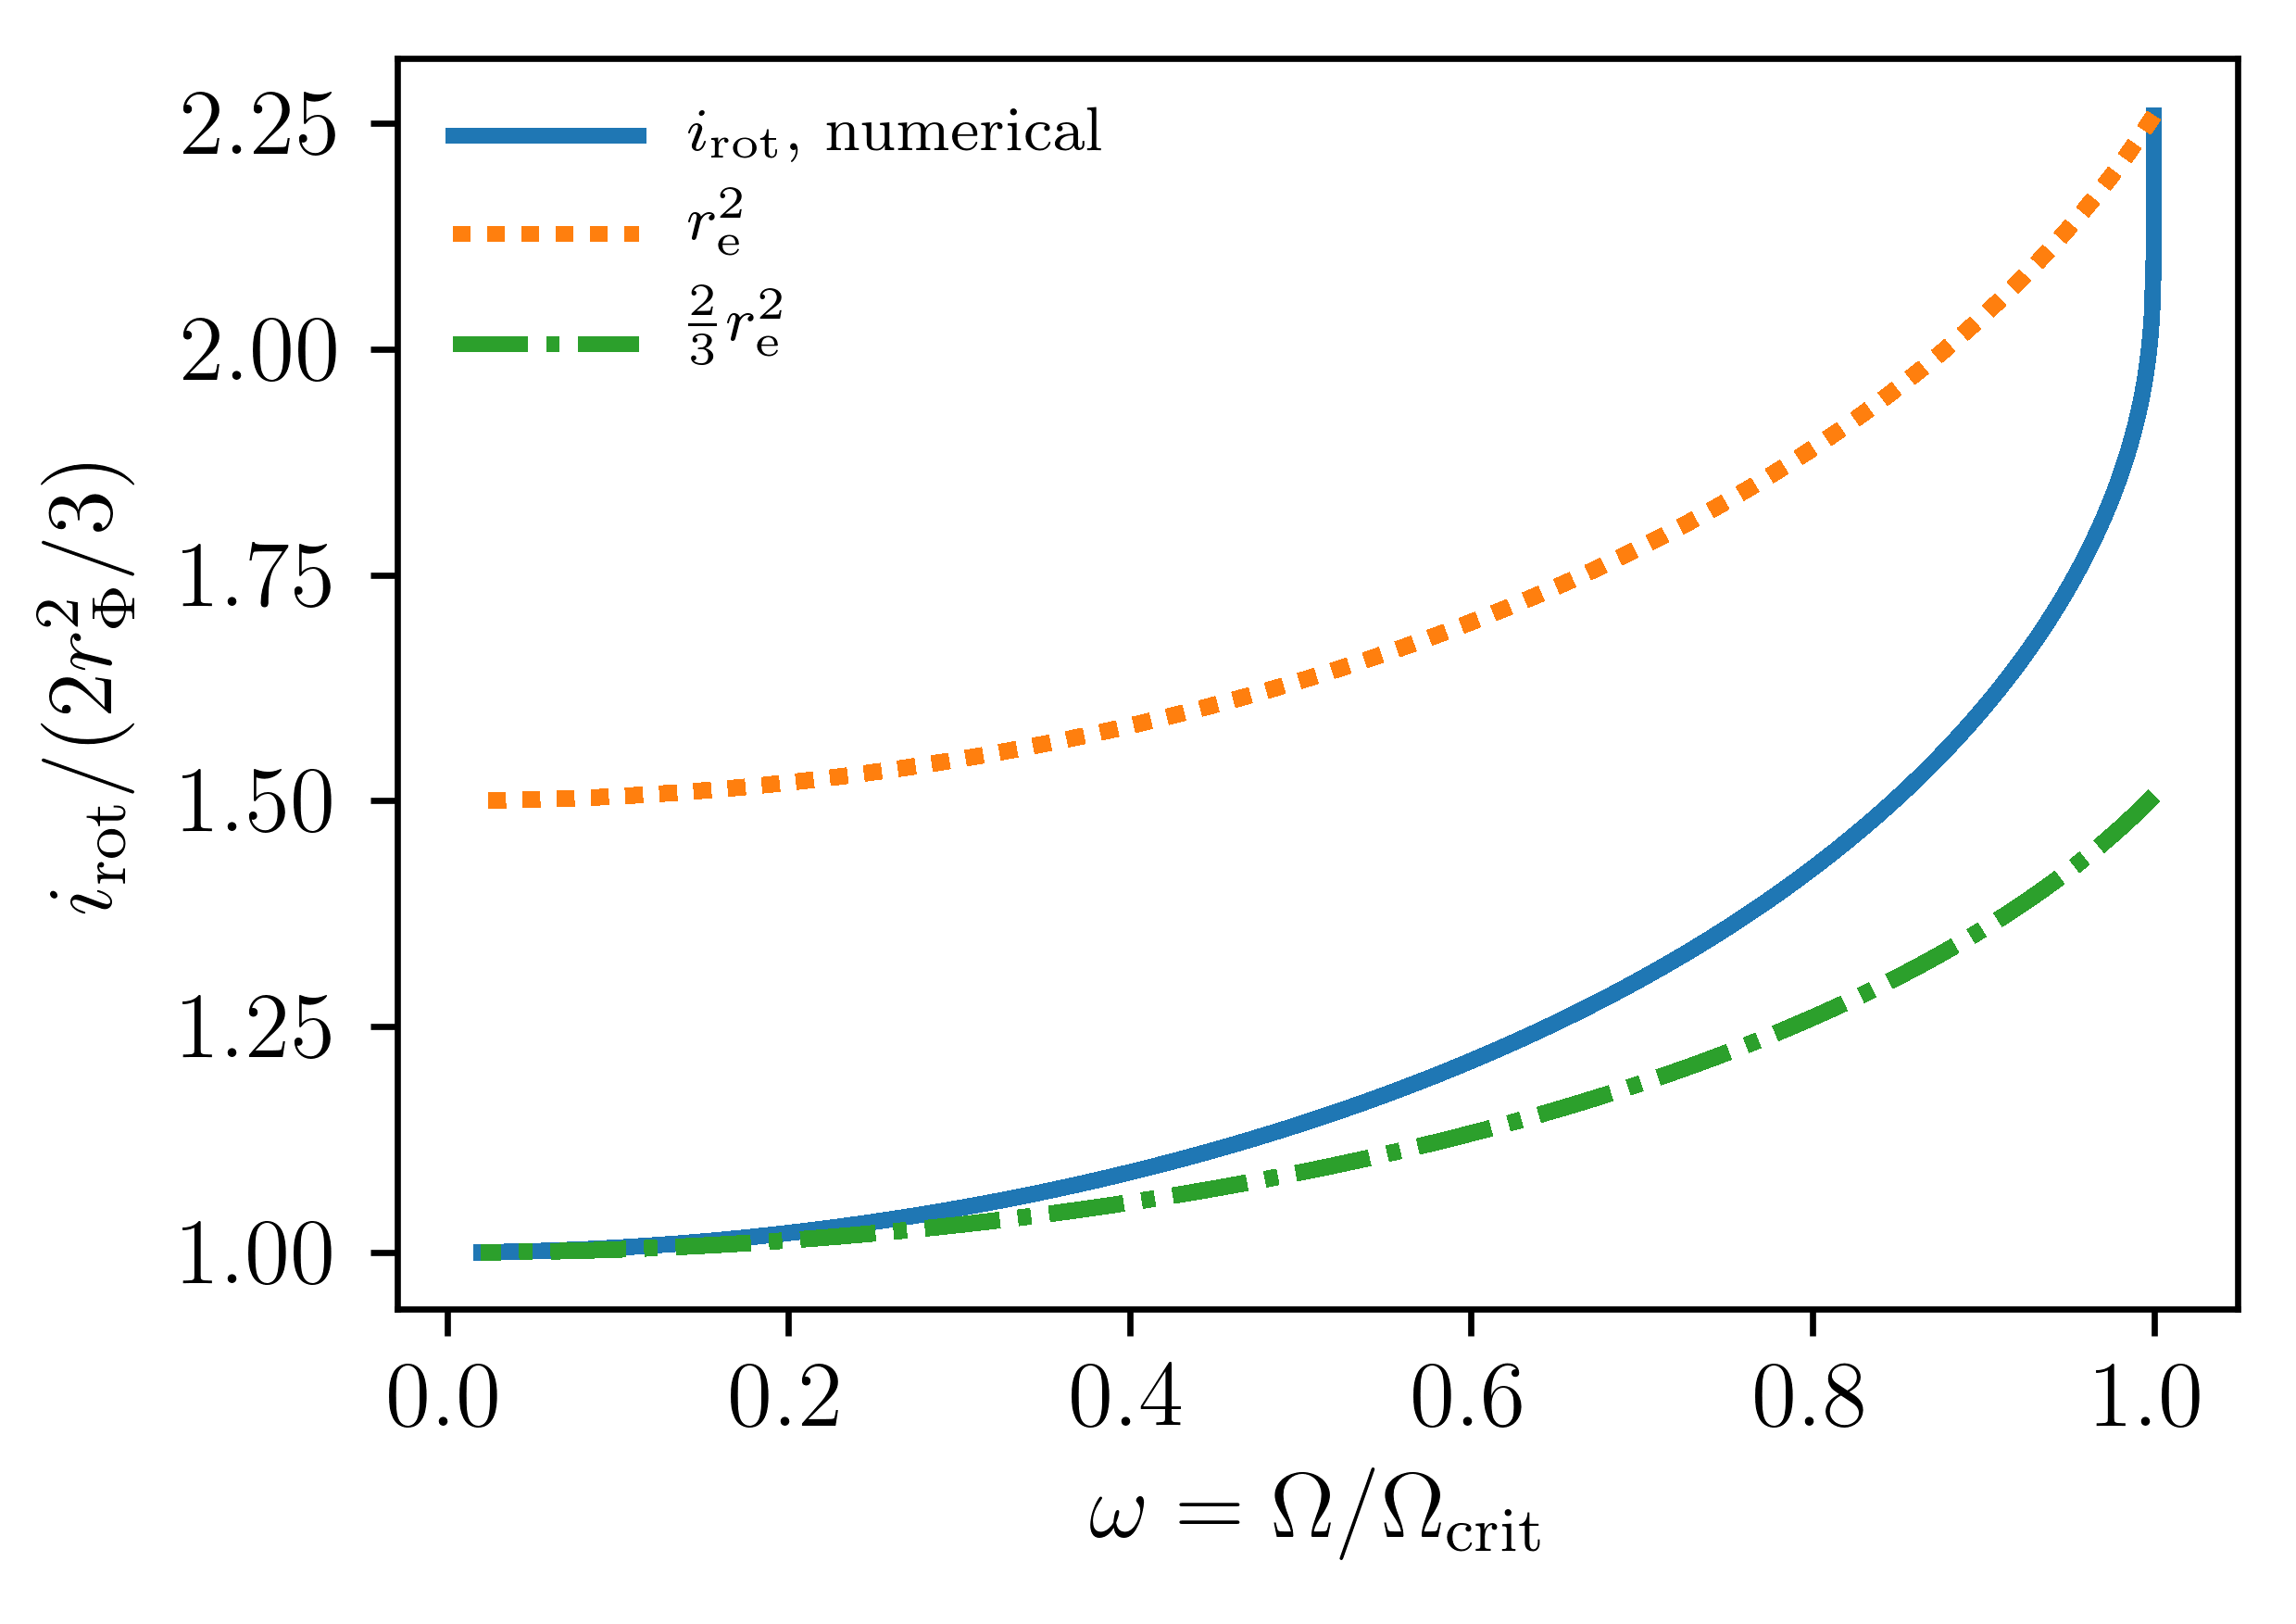

In [55]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
plt.plot(np.append(1,wcs),np.append((1/(2./3.*0.8149**2)),(irots/(2./3.*rphis**2))), label = "$i_{\\rm rot}$, numerical")
plt.plot(wcs,res**2/(2./3.*rphis**2),":", label = "$r_{\\rm e}^2$")
#plt.plot(wcs,2./3.*rps**2/(2./3.*rphis**2),"--", label = "$\\frac{2}{3}r_{\\rm p}^2$")
plt.plot(wcs,2./3.*res**2/(2./3.*rphis**2),"-.", label = "$\\frac{2}{3}r_{\\rm e}^2$")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.gca().set_ylabel("$i_{\\rm rot}/(2 r_{\Phi}^2/3)$")
plt.legend(loc=2)
#plt.gca().set_ylim([1.13,1.15])
#plt.gca().set_xlim([0.48,0.52])
plt.savefig("irot.pdf")
plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


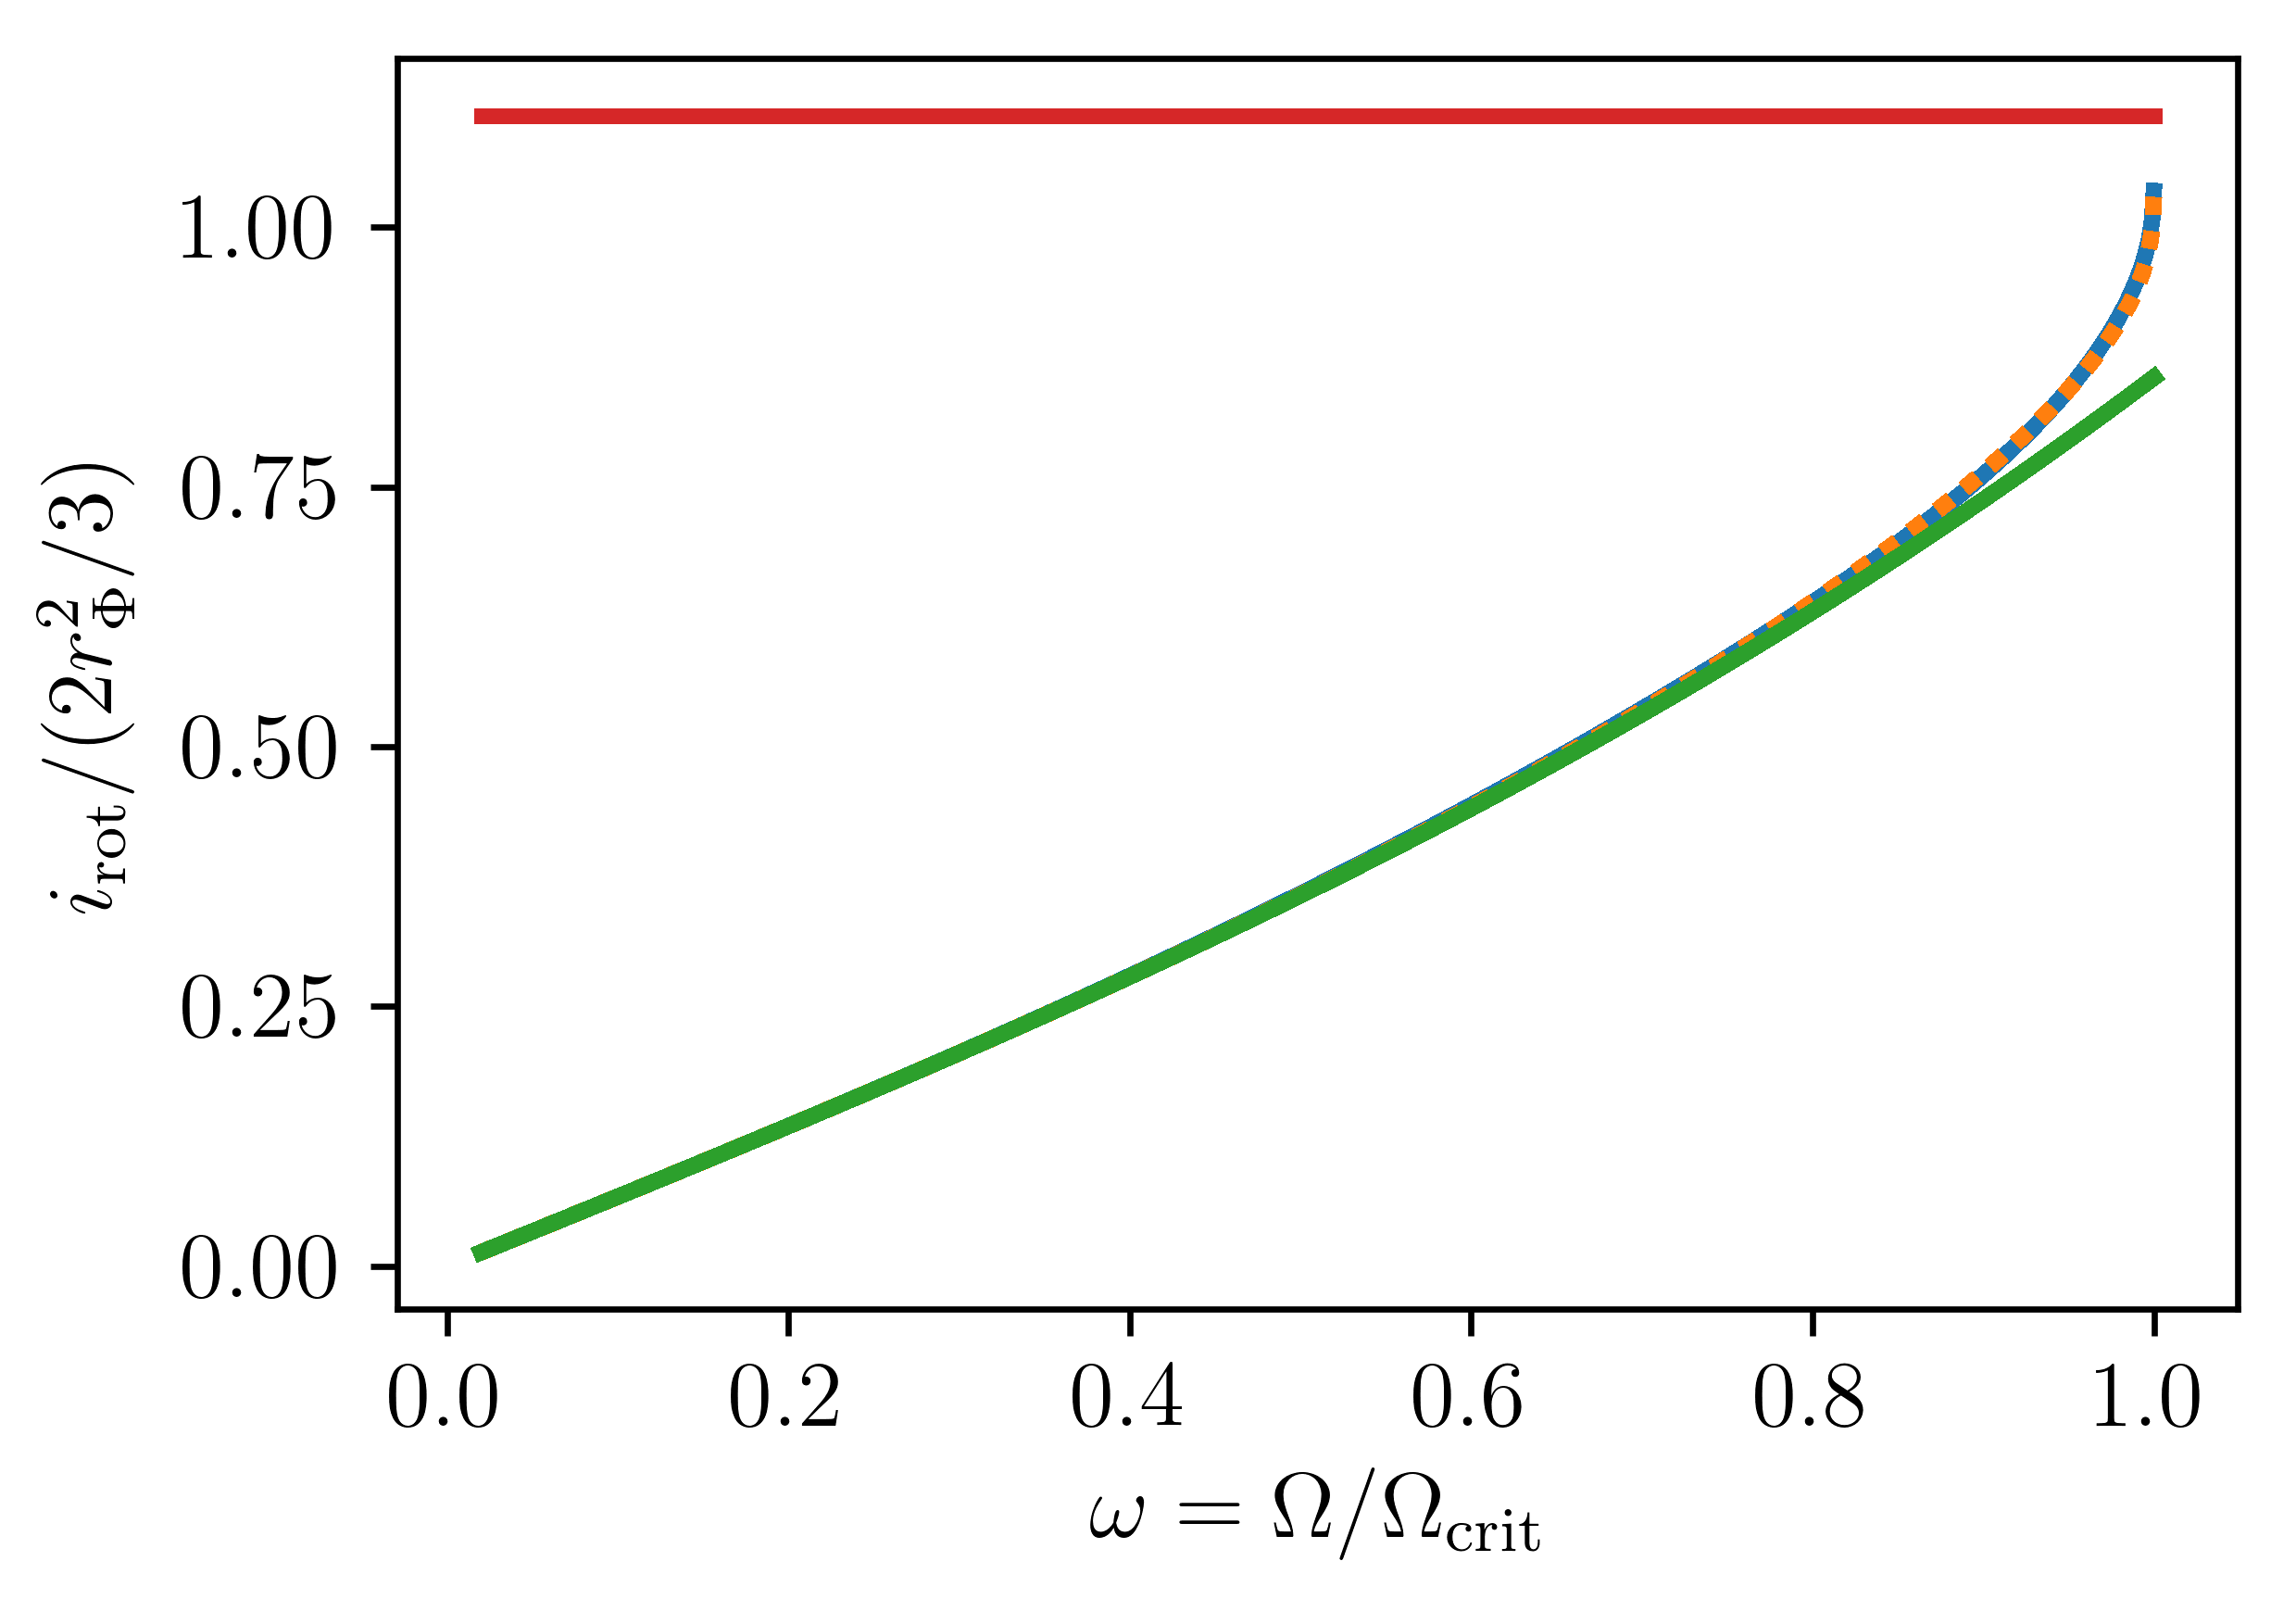

1.10498924022


In [128]:
import matplotlib.pyplot as plt
#results can be nicely plotted in terms of omega/omega_crit
#at the equator by simply taking a power of the equatorial
#radii we have stored in res[:]. At the equator, this is given by
#    omega/omegac = omega/sqrt(G*M/re**3)
#which in dimensionless units is simply
#    omega/omegac = r**(3/2)
def funcB(w):
    return 1+w**2./5-0.2735*w**4-0.4327*w**6-3./2.*0.5583*np.log(1-w**4)
def funcC(w):
    return 1+w**2/12-0.001815*w**4+0.02626*w**6
plt.plot(wcs,2./3.*wcs*funcC(wcs)*funcB(wcs)/funcA(wcs))
plt.plot(wcs,wcs*irots/res**2*sqrt(res/rphis),":")
plt.plot(wcs,2./3.*wcs*(1+17*wcs**2/60))
plt.plot(wcs,sqrt(1/0.8149)*np.ones(len(wcs)))
#, label = "$i_{\\rm rot}$, numerical")
plt.gca().set_xlabel("$\omega=\Omega/\Omega_{\\rm crit}$")
plt.gca().set_ylabel("$i_{\\rm rot}/(2 r_{\Phi}^2/3)$")
plt.legend(loc=2)
#plt.gca().set_ylim([1.13,1.15])
#plt.gca().set_xlim([0.48,0.52])
plt.savefig("irot.pdf")
plt.show()
print(sqrt(1/0.819))

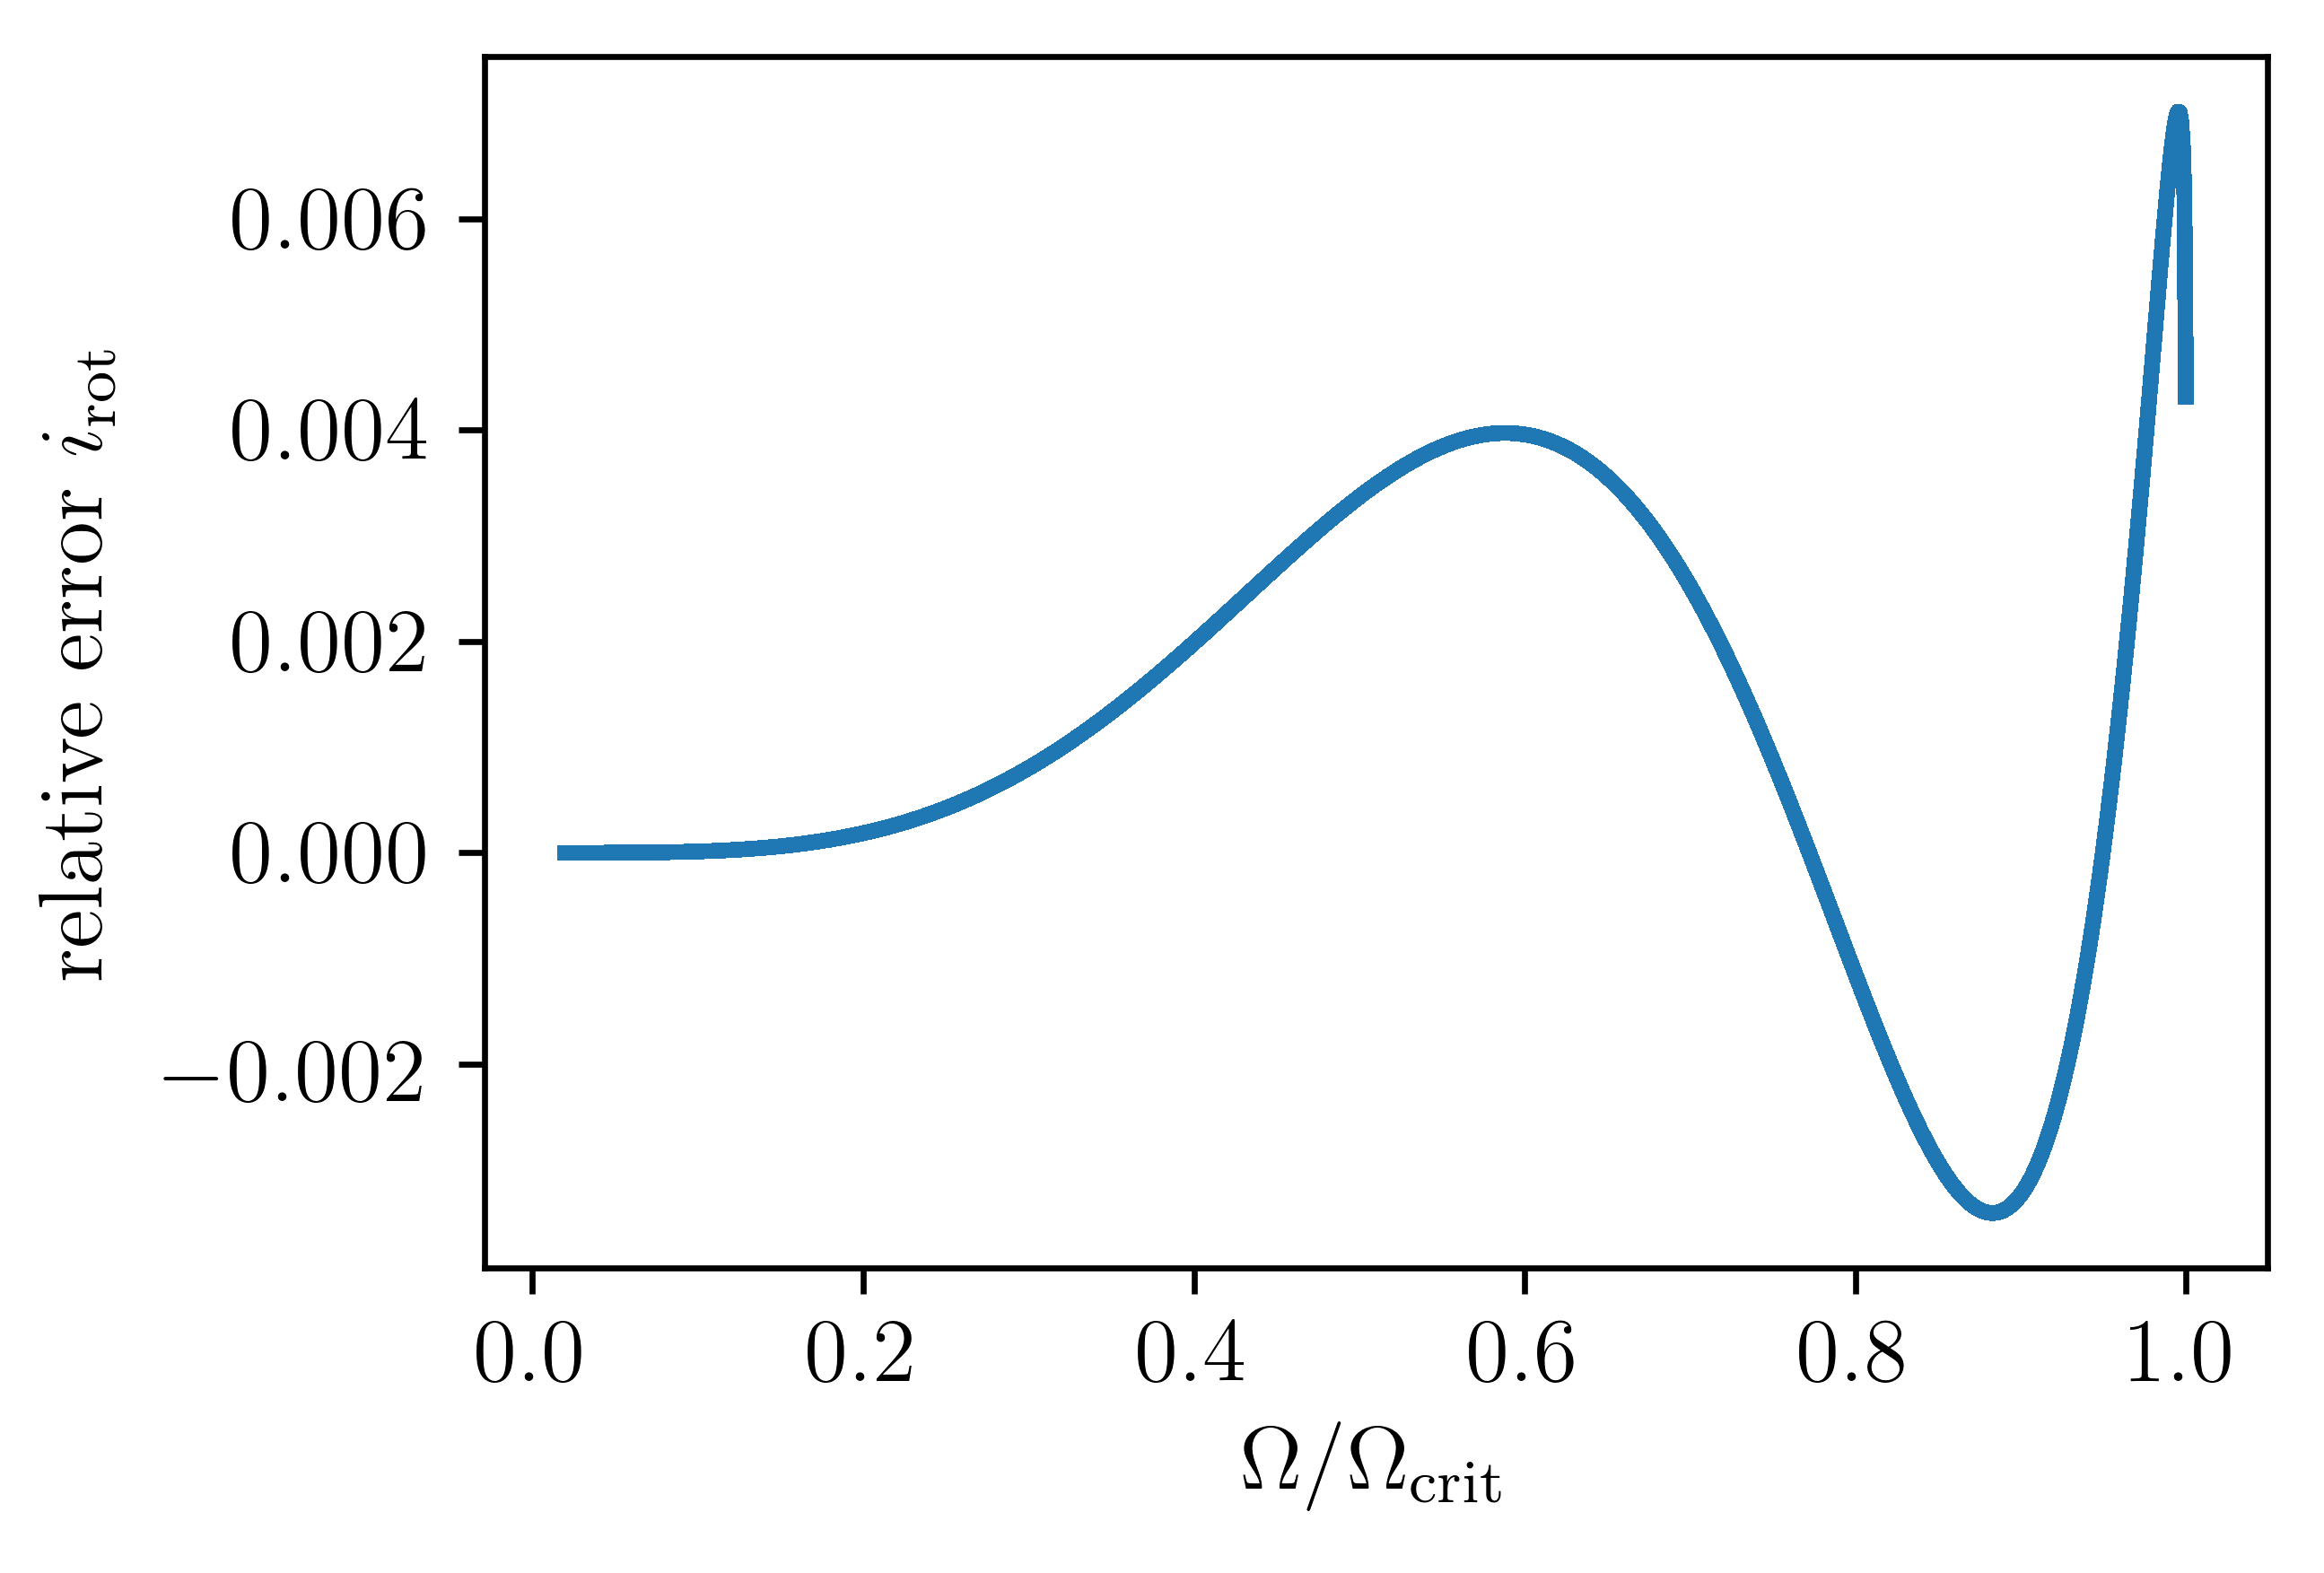

[-0.34358558 -0.40550679] 0.927706383061


In [142]:
#Fit irot(omega), gives Eq(9) in Marchant (2018)

from scipy.optimize import curve_fit
x0 = wcs
y0 = wcs*irots/res**2*sqrt(res/rphis)

def funcA(w):
    return 1-0.1076*w**4-0.2336*w**6-0.5583*np.log(1-w**4)

rphi_crit = np.power(3*sqrt(3)-4+3*np.log((3*(sqrt(3)-1))/(sqrt(3)+1)),1./3.)
crit_val = sqrt(1/rphi_crit)*3./2.

def func(x, a,b):
    return 2./3.*x*(1+17*x**2/60+a*x**4+b*x**6-crit_val*0.5583*np.log(1-x**4))/funcA(x)
popt, pcov = curve_fit(func, x0, y0)
plt.plot(x0, ((func(x0, *popt)-y0)/y0),'-', label='fit')
#Manually check fit in paper to prevent typos
#plt.plot(x0, func(x0, *popt),'-', label='fit')
#plt.plot(x0, y0, ':', label='numerical integral')
plt.gca().set_ylabel("relative error $i_{\\rm rot}$")
plt.gca().set_xlabel("$\Omega/\Omega_{\\rm crit}$")
plt.show()
print(popt,crit_val*0.5583)